# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [1]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#creating a dataframe
df = pd.read_excel('customer_retention_dataset.xlsx')
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [3]:
#lets find out the columns of the dataset
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

### Renaming column names

In [4]:
df = df.rename(columns = {'2 How old are you? ': 'Age', '3 Which city do you shop online from?': 'City', '4 What is the Pin Code of where you shop online from?':'Pincode',
                         '5 Since How Long You are Shopping Online ?': 'Started Online Shopping',
                         '6 How many times you have made an online purchase in the past 1 year?':'Online Purchase in Last Year',
                         '7 How do you access the internet while shopping on-line?': 'Mode of Internet Access',
                         '8 Which device do you use to access the online shopping?': 'Device',
                         '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'Screen Size',
                         '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS',
                         '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser',
                         '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Channel',
                         '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'Online Store after first visit',
                         '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'Time spent before purchase',
                         '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'Preferred Payment Option',
                         '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Abondon carts items',
                         '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Reason for abonding carts',
                         '18 The content on the website must be easy to read and understand':'Content readability and understanding',
                         '19 Information on similar product to the one highlighted  is important for product comparison':'Importance of similar product for comparison',
                         '20 Complete information on listed seller and product being offered is important for purchase decision.':'Seller and product information for purchase decision',
                         '21 All relevant information on listed products must be stated clearly':'Clarity of product information',
                         '27 Empathy (readiness to assist with queries) towards the customers':'Assistance with queries',
                         '28 Being able to guarantee the privacy of the customer':'Privacy of customer',
                         '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Communication channels',
                         '33 Return and replacement policy of the e-tailer is important for purchase decision':'Importance of return and replacement policy',
                         '35 Displaying quality Information on the website improves satisfaction of customers':'Customer satisfaction through quality information',
                         '36 User derive satisfaction while shopping on a good quality website or application':'User satisfaction through good quality website and apps',
                         '37 Net Benefit derived from shopping online can lead to users satisfaction':'User satisfaction through benefit',
                         '43 Shopping on the website gives you the sense of adventure':'Gives sense of adventure',
                         '44 Shopping on your preferred e-tailer enhances your social status':'Enhances social status',
                         '45 You feel gratification shopping on your favorite e-tailer':'Feel gratification',
                         '46 Shopping on the website helps you fulfill certain roles':'Fulfills certain roles',
                         'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'Shopped from online retailers',
                         'Fast loading website speed of website and application':'Loading speed of website and apps',
                         'Privacy of customers’ information':'Privacy of customers information',
                         })

In [25]:
df = df.rename(columns = {'23 Loading and processing speed':'Loading and processing speed',
       '24 User friendly Interface of the website':'User friendly Interface of the website',
       '25 Convenient Payment methods':' Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust on finishing transaction by online store at stipulated time',
       '30 Online shopping gives monetary benefit and discounts':'Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online':'Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible':'Shopping online is convenient and flexible',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'Gaining access to loyalty programs is a benefit of shopping online',
       '38 User satisfaction cannot exist without trust':'User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category':' Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information':'Provision of complete and relevant product information',
       '41 Monetary savings':'Monetary savings',
       '42 The Convenience of patronizing the online retailer':'The Convenience of patronizing the online retailer',
        '47 Getting value for money spent':'Getting value for money spent'
        })

df = df.rename(columns = {'1Gender of respondent':'Gender', '22 Ease of navigation in website':'Ease of website navigation',
                          ' Offering a wide variety of listed product in several category':'Offering a wide variety of listed product in several category'
                          })

### Verifying the changes

In [6]:
# displaying datatype of column
df.dtypes

1Gender of respondent                                                   object
Age                                                                     object
City                                                                    object
Pincode                                                                  int64
Started Online Shopping                                                 object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [7]:
#displaying columns whose dtypes are int64
for i in df.columns:
    if df[i].dtypes == 'int64':
        print(str(i) + ':\n' + str(df[i].unique()))

Pincode:
[110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]


In [8]:
for i in df.columns:
    if df[i].dtypes == 'float64':
        print(str(i))

#### Okay so we have only 'Pincode' whose datatype is int64 ans the rest of them are object

In [9]:
#we can also look at the count of various datatype and non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   1Gender of respondent                                                    269 non-null    object
 1   Age                                                                      269 non-null    object
 2   City                                                                     269 non-null    object
 3   Pincode                                                                  269 non-null    int64 
 4   Started Online Shopping                                                  269 non-null    object
 5   Online Purchase in Last Year                                             269 non-null    object
 6   Mode of Internet Access                                                  269 non-n

In [10]:
#checking any null value 
df.isnull().sum()

1Gender of respondent                                                   0
Age                                                                     0
City                                                                    0
Pincode                                                                 0
Started Online Shopping                                                 0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [11]:
df.isna().sum()

1Gender of respondent                                                   0
Age                                                                     0
City                                                                    0
Pincode                                                                 0
Started Online Shopping                                                 0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

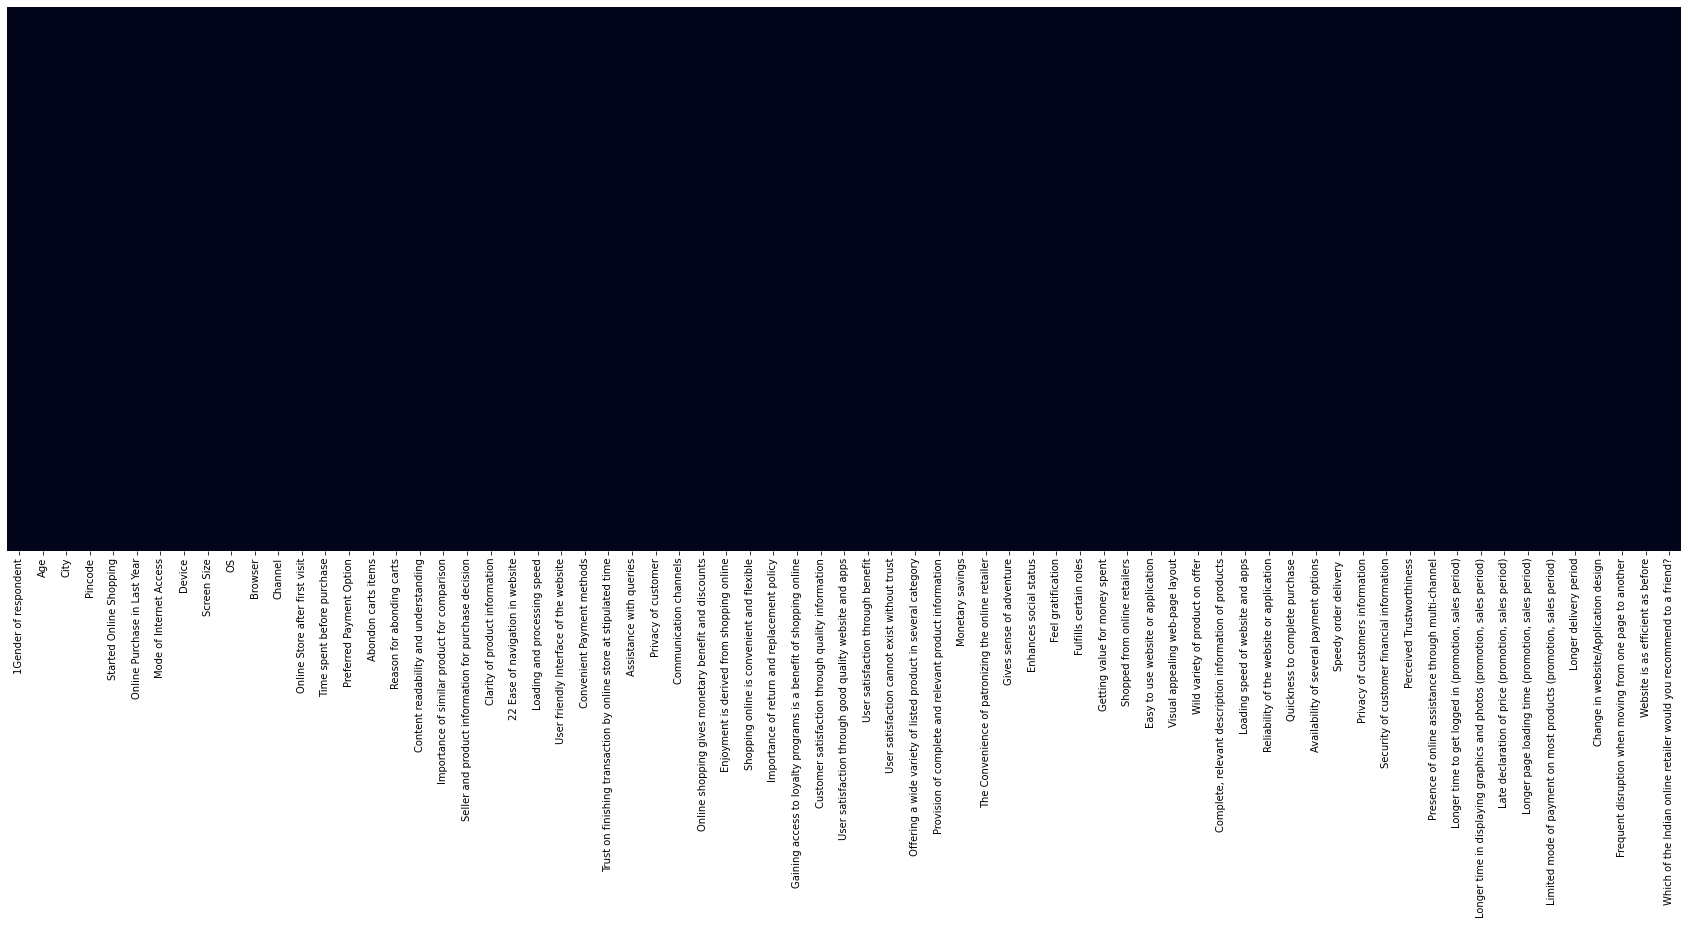

In [12]:
#verifying null values in heatmap
plt.figure(figsize=(30,10))      #size of the map
sns.heatmap(df.isnull(), cbar = False, yticklabels = False)

#### No null values visible

In [13]:
#displays the unique index value of given column
df.Age.unique()

array(['31-40 years', '21-30 years', '41-50 yaers', 'Less than 20 years',
       '51 years and above'], dtype=object)

In [14]:
#tells the count of each unique value of given column
df['Age'].value_counts()

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64

In [15]:
df['Age'].value_counts(normalize=True) #gives the percentage contribution of each unqiue index value

31-40 years           0.301115
21-30 years           0.293680
41-50 yaers           0.260223
Less than 20 years    0.074349
51 years and above    0.070632
Name: Age, dtype: float64

([<matplotlib.patches.Wedge at 0x1a9d833cd60>,
 [Text(0.9944101424311872, 1.3788214056323562, '31-40 years'),
  Text(-1.6099141597401203, 0.5460553069683177, '21-30 years'),
  Text(-0.25906823428216036, -1.6295347955738546, '41-50 yaers'),
  Text(1.2857199716384142, -1.0341296604053651, 'Less than 20 years'),
  Text(1.6095449332262723, -0.3631323559332537, '51 years and above')],
 [Text(0.5556997854762515, 0.7705178443239636, '30.11%'),
  Text(-0.8996579127959493, 0.30514855389405987, '29.37%'),
  Text(-0.14130994597208743, -0.8888371612221024, '26.02%'),
  Text(0.7013018027118622, -0.5640707238574718, '7.43%'),
  Text(0.8779335999416029, -0.19807219414541108, '7.06%')])

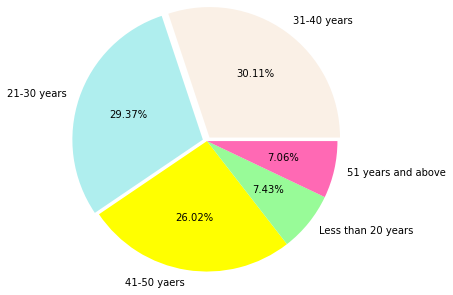

In [16]:
#pie plot of Age columns
plt.pie(df['Age'].value_counts().values,
        labels = df['Age'].value_counts().index, 
        autopct = '%.2f%%', 
        pctdistance = 0.6, 
        labeldistance = 1.1,
        radius = 1.5, 
        explode = (0.05,0.05,0,0,0),
        colors = ['Linen','PaleTurquoise','yellow','PaleGreen','Hotpink'])

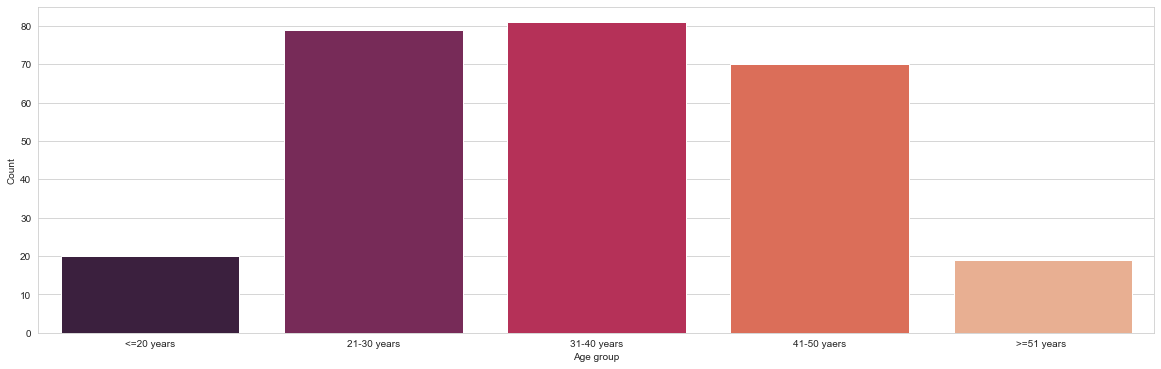

In [17]:
age_less_20 = df.Age[df['Age']== 'Less than 20 years']
age_21_30 = df.Age[df['Age']== '21-30 years']
age_31_40 = df.Age[df['Age']== '31-40 years']
age_41_50 = df.Age[df['Age']== '41-50 yaers']
age_above_51 = df.Age[df['Age']== '51 years and above']

agex = ['<=20 years','21-30 years', '31-40 years', '41-50 yaers', '>=51 years ']
agey = [len(age_less_20.values), len(age_21_30.values), len(age_31_40.values), len(age_41_50.values), len(age_above_51.values)]

plt.figure(figsize = (20,6))
sns.set_style('whitegrid')
sns.barplot(x = agex, y = agey, palette = 'rocket')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

#### Visualisation of Age category

In [18]:
#shows unique catgory of each column
df.apply(lambda x: len(x.unique()))

1Gender of respondent                                                    2
Age                                                                      5
City                                                                    11
Pincode                                                                 39
Started Online Shopping                                                  5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

In [35]:
#dispaying unqiue values of each categorical variables
for cols in df.columns:
    if df[cols].dtype == object:
        print(str(cols) + ':' + str(df[cols].unique()))
        print(pd.DataFrame(df[cols].value_counts()),'\n',pd.DataFrame(df[cols].value_counts(normalize=True)))
        print('\n')

Gender:['Male' 'Female']
        Gender
Female     181
Male        88 
           Gender
Female  0.672862
Male    0.327138


Age:['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
                    Age
31-40 years          81
21-30 years          79
41-50 yaers          70
Less than 20 years   20
51 years and above   19 
                          Age
31-40 years         0.301115
21-30 years         0.293680
41-50 yaers         0.260223
Less than 20 years  0.074349
51 years and above  0.070632


City:['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
               City
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2 
                    City
Delhi          0.215613
Greater Noida  0.159851
Noida          0.14

Assistance with queries:['Strongly agree (5)' 'Agree (4)' 'Strongly disagree (1)'
 'indifferent (3)']
                       Assistance with queries
Strongly agree (5)                         194
Agree (4)                                   42
Strongly disagree (1)                       18
indifferent (3)                             15 
                        Assistance with queries
Strongly agree (5)                    0.721190
Agree (4)                             0.156134
Strongly disagree (1)                 0.066914
indifferent (3)                       0.055762


Privacy of customer:['Agree (4)' 'Strongly agree (5)' 'indifferent (3)']
                    Privacy of customer
Strongly agree (5)                  185
Agree (4)                            58
indifferent (3)                      26 
                     Privacy of customer
Strongly agree (5)             0.687732
Agree (4)                      0.215613
indifferent (3)                0.096654


Communication channels:['Ag

Fulfills certain roles:['Agree (4)' 'Strongly agree (5)' 'indifferent (3)'
 'Strongly disagree (1)' 'Dis-agree (2)']
                       Fulfills certain roles
indifferent (3)                            88
Agree (4)                                  88
Strongly agree (5)                         38
Strongly disagree (1)                      33
Dis-agree (2)                              22 
                        Fulfills certain roles
indifferent (3)                      0.327138
Agree (4)                            0.327138
Strongly agree (5)                   0.141264
Strongly disagree (1)                0.122677
Dis-agree (2)                        0.081784


Getting value for money spent:['Strongly agree (5)' 'Agree (4)' 'indifferent (3)']
                    Getting value for money spent
Agree (4)                                     149
Strongly agree (5)                             82
indifferent (3)                                38 
                     Getting value for mone

                                                    Which of the Indian online retailer would you recommend to a friend?
Amazon.in                                                                                   0.293680                   
Amazon.in, Flipkart.com                                                                     0.230483                   
Flipkart.com                                                                                0.144981                   
Amazon.in, Myntra.com                                                                       0.111524                   
Amazon.in, Paytm.com, Myntra.com                                                            0.074349                   
Amazon.in, Flipkart.com, Myntra.com                                                         0.055762                   
Amazon.in, Paytm.com                                                                        0.048327                   
Flipkart.com, Paytm.com, Myntra.com, sn

In [619]:
ax=df.groupby('Privacy of customer')    #groupby function apply to observe values corresponding to given columns
y=ax.get_group('Strongly agree (5)')    #get_group uses the index value of that particular column

y['Gender'].value_counts(normalize=True)   #gives the percentage count of Gender within groupby function

y[y['Gender']=='Female'][['Shopped from online retailers']].value_counts(normalize=True) #Gives Female count adhered to Shopped from online retailers.

Female    0.708108
Male      0.291892
Name: Gender, dtype: float64

#### Observations:
    1. Female customers has been screened higher than male counterparts (67.28%)
    2. People of age group 31-40(30%), 21-30(29.36%), 41-50(26%) has been registered more in online shooping
    3. Delhi has seen highest customers in online shopping with 21%, Greater Noida with ~16%, Noida with 14.87%
    4. Majority of the people started online shopping 4yrs ago with 36.43%, people who started 2-3yrs ago contribute 24.16%
    5. The frequency of online purchase in last year has remained less than 10times, where as only few of them did shopping more than 42times
    6. Mobile internet has been the most commonly used mode among the customers gaining more than 52.78% + 17.47%
    7. Majority(52%) of the people are using Smartphone for online shopping. Laptop is being used by ~32%
    8. People uses Windows/windows mobile(45%). 31.60% people uses Android & 23% uses IOS
    9. Over 80% of shopping/visitng the web or apps is done on Google Chrome(80.30%)
    10. For arriving at website, 85% people prefer search engine. While only 7% each uses marketing and adverts to search for website.
    11. After their visit, most people uses search engine to arrive at website. ~32%  people uses apps after first attempt and 26% people arrive directly through URL.
    12. More than 45% customer invest more than 15mins before making purchases. There are about 26% of customer which spent around 6-10mins and 17% spent 11-15mins.
    13. 55% of people prefer credit/debit card as their payment method. 28% uses CoD and 16% uses E-wallet.
    14. People discarding cart items sometimes contribute around 63% while only 17% os cutomers never discard their cart items.
    15. ~49% customers discard cart due to alterative offer, 20% out of the total people discard because promo code is not applicable. There are 5% people whose preferred mode of payment is not available
    16. More than 60% agree on content understanding and readability
    17. More than 60% agree that seller and product info is available for purchase decision
    18. Majority of customer believe that clear product information is stated.
    19. More than 90% are satisfied with the ease in website navigation
    20. >83% customer are satisfied with loading and processing speed
    21. >86% are satisfied with website UI/UX
    22. Only 11.15% are disagreeing with convenience in payment method
    23. >83% trust on transaction being done by online store within time. There are 11% who disagree on this matter
    24. >87% of customers agrees on getting assistance with query
    25. >89% customers believe that their privacy is secured
    26. >70% customer believe that online shoppig gives monetary benefit. 18% have indifferent stand to this subject
    27. >52% people enjoy shopping online, 27.88% people have unbiased opinion and >18% people diasgree
    28. >82% people agree on shopping online is convenient and flexible.
    29. >78% customers believe that they gain satisfaction through qualitative info.
    30. >96% customers are satisfied with quality of website and apps
    31. >82% customers believes that there are monetary savings in online shopping
    32. Majority of the customers have indefferent opinion that online shopping enhances social status
    33. >85% customers agrees on getting value for money spent
    34. >30% customers shopped from 5 different retailers, only 5% shopped from Amazon alone. Majority of the people shopped from amazon along with other retailers
    35. >48% people believes that amazon & flipkart offer wide range of offer on product.
    36. Amazon has the speediest process to complete purchase, then after comes flipkart, Myntra, Paytm and Snapdeal
    37. >69% believes that amazon and flipkart offers speedy delivery
    38. Amazon and flipkart alone has been selected most in terms of financial security. Along with this other retailes are prominent in terms of financial security.
    39. Amazon along with flipkart, myntra & snapdeal has presence of online assistance via multiple channel
    40. When it comes to mode of payments, Snapdeal and Amazon are top markers in providing limited platform for payment mode.
    41. Paytm and Snapdeal is been voted highest in terms of delivery period. Next comes the flipkart,amazon,myntra. 
    42. For web/apps design, amazon got the highest rating (35%)
    43. 35% people believe that amazon is efficient as before, 17% people state that efficinecy of flipkart is intact. Whereas only 4% and 5% support myntra & snapdeal regarding the same
    44. ~29% people would recommend amazon to a friend, 23% would recommend both amazon & flipkart. 14.5% would recommend flipkart alone. 

In [20]:
#we can combine Mobile Internet values corresponding to Mode of Internet Acces into one 
df['Mode of Internet Access'] = df['Mode of Internet Access'].replace({'Mobile Internet': 'Mobile internet'})
df['Mode of Internet Access'].value_counts()

Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: Mode of Internet Access, dtype: int64

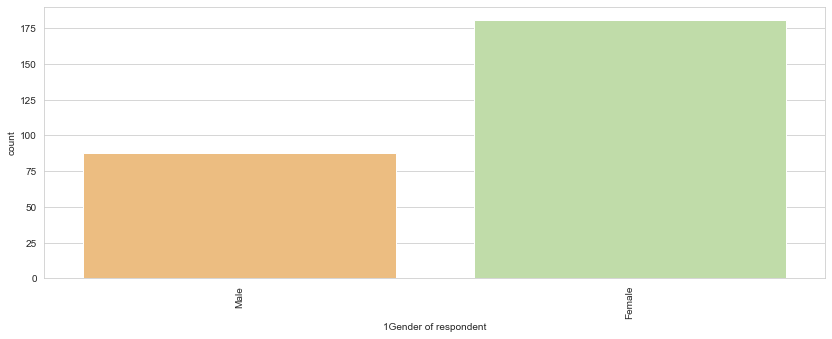

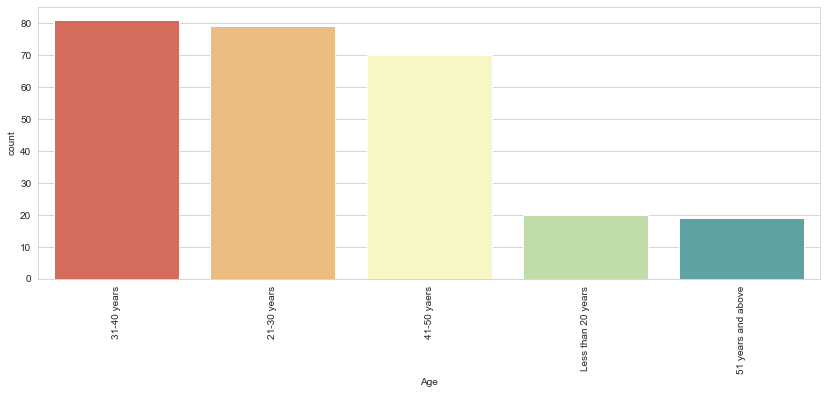

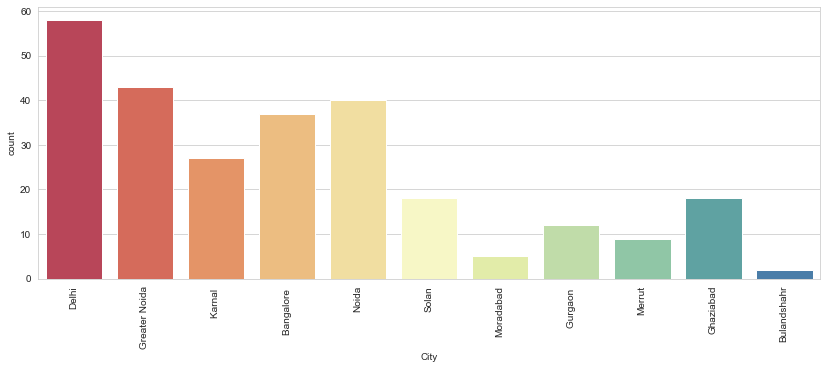

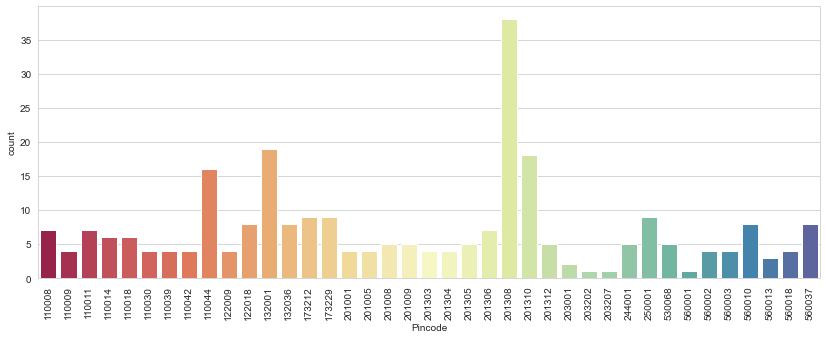

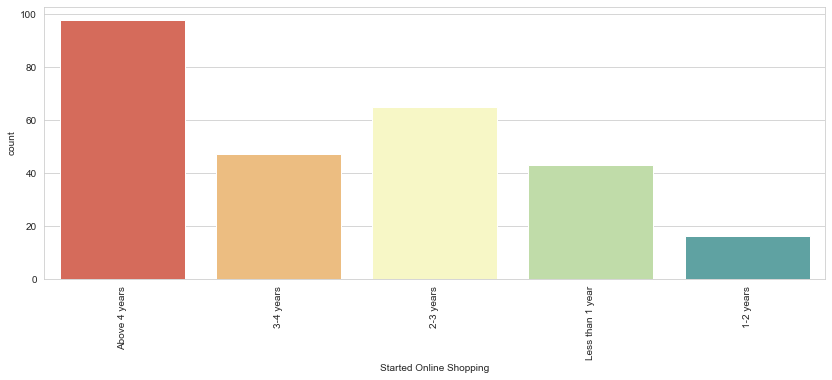

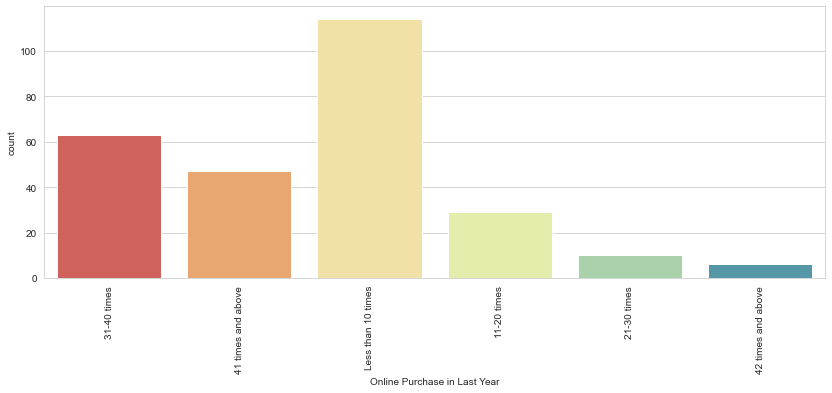

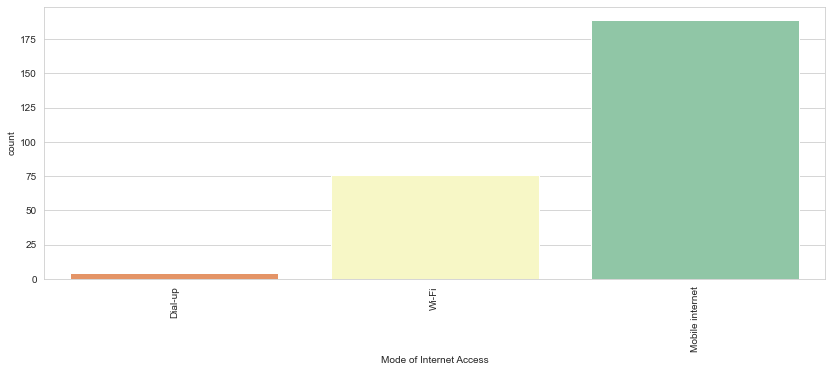

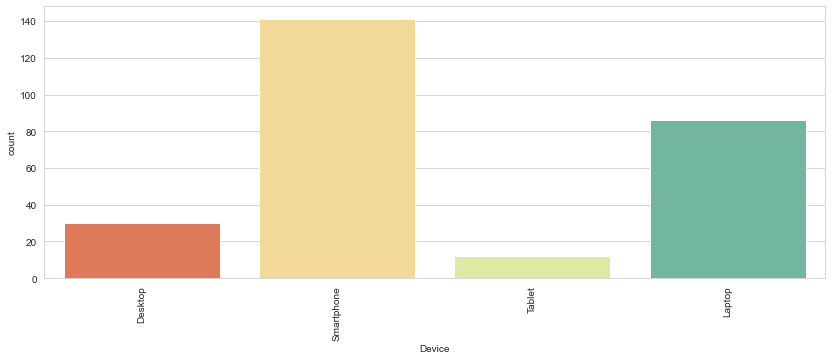

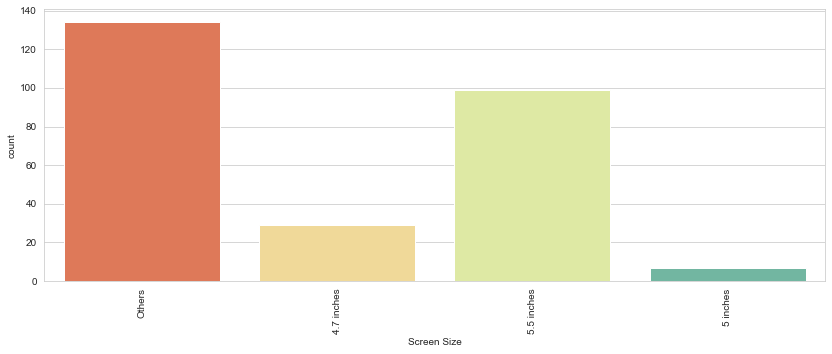

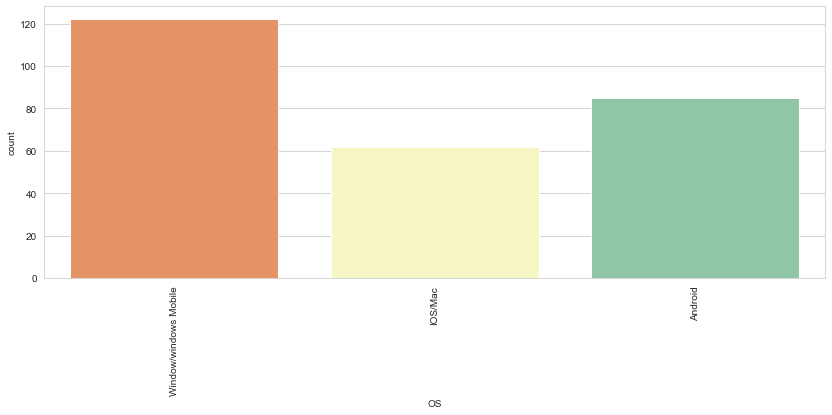

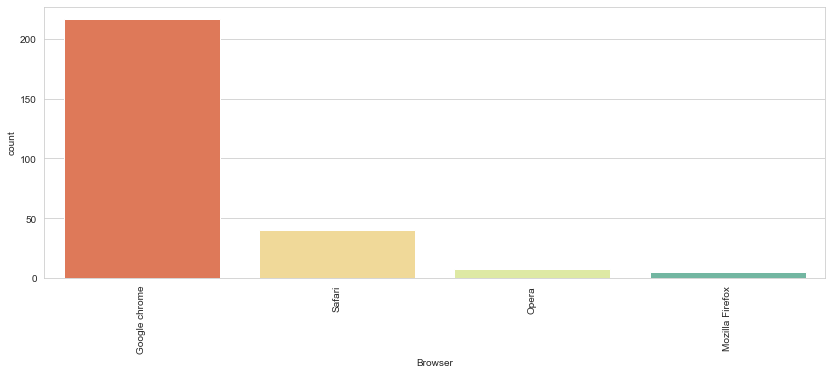

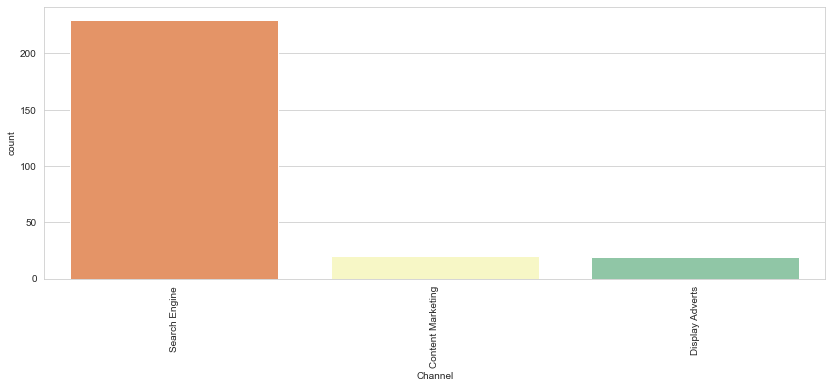

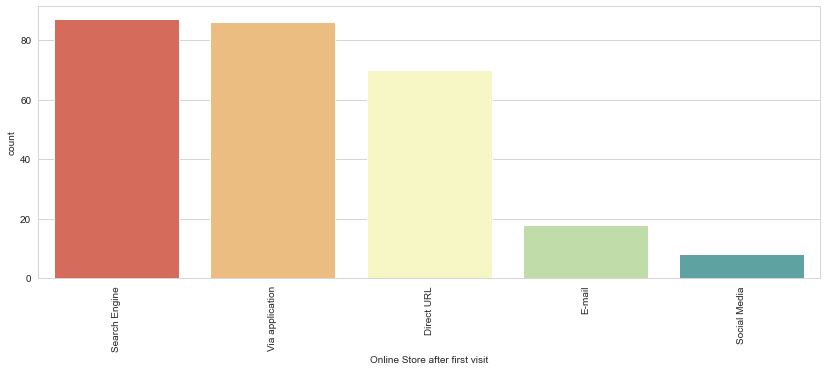

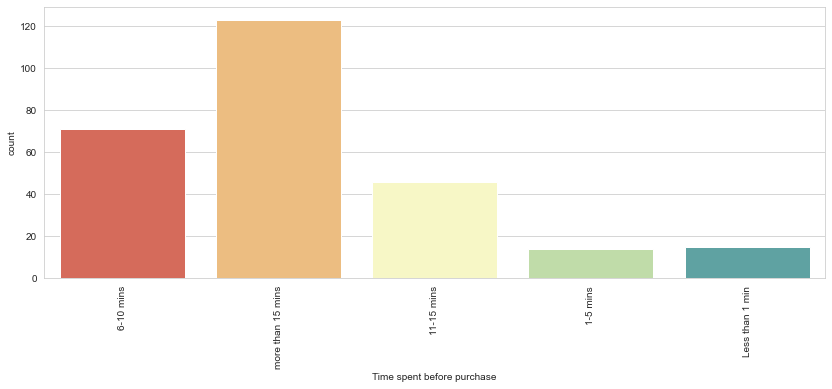

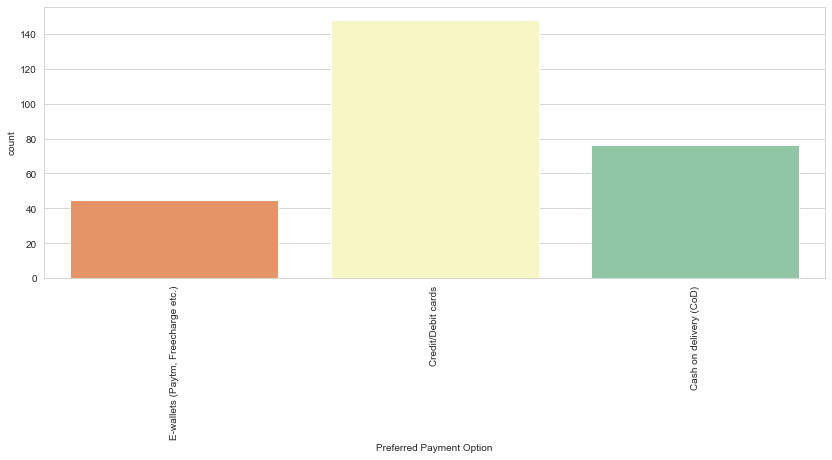

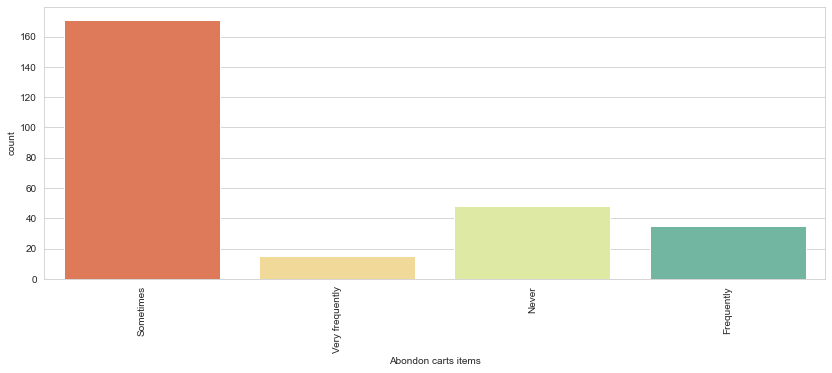

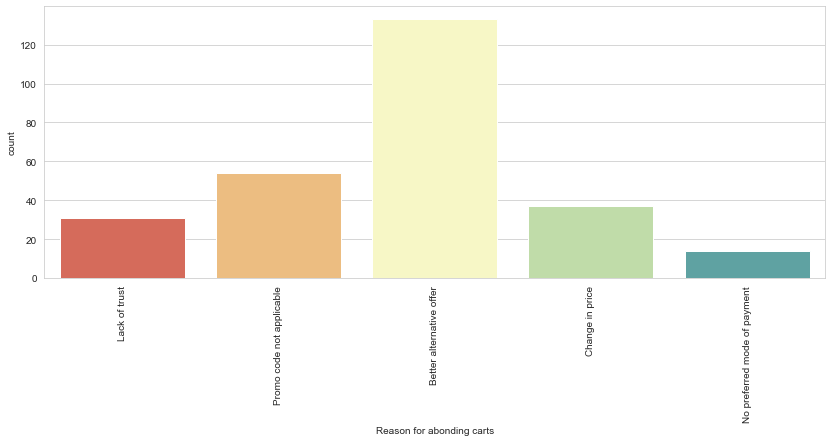

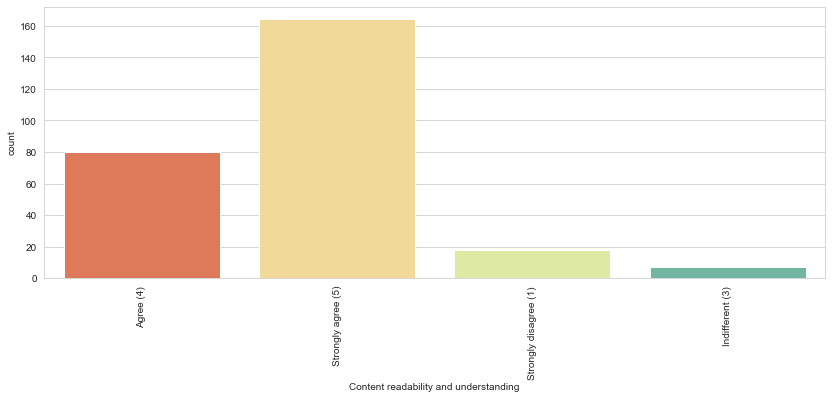

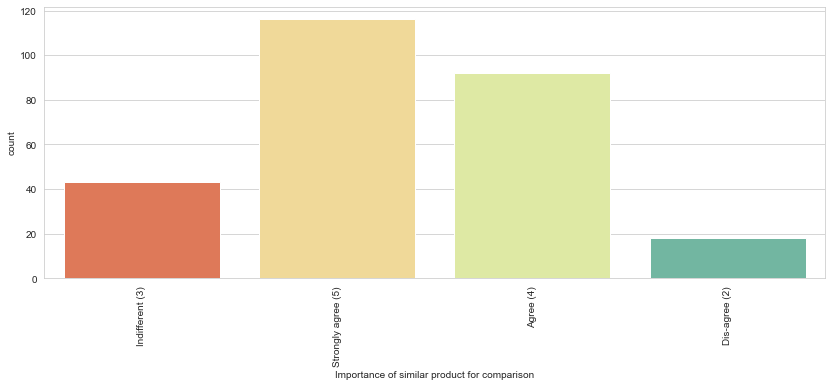

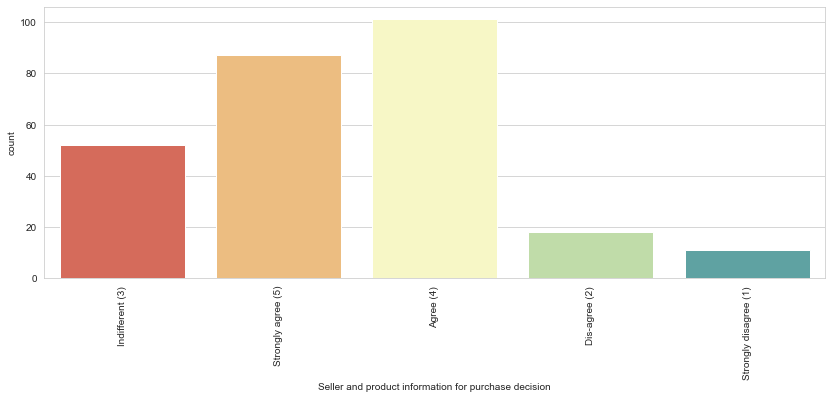

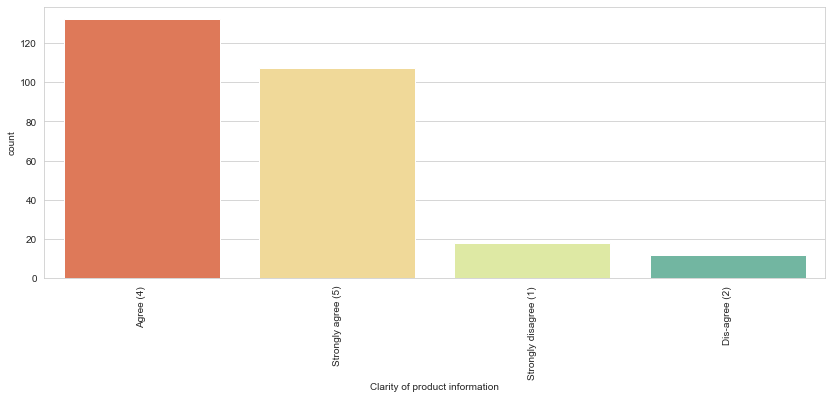

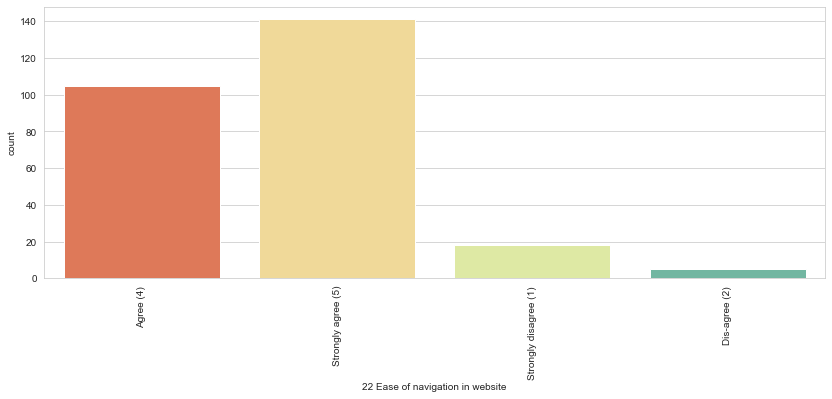

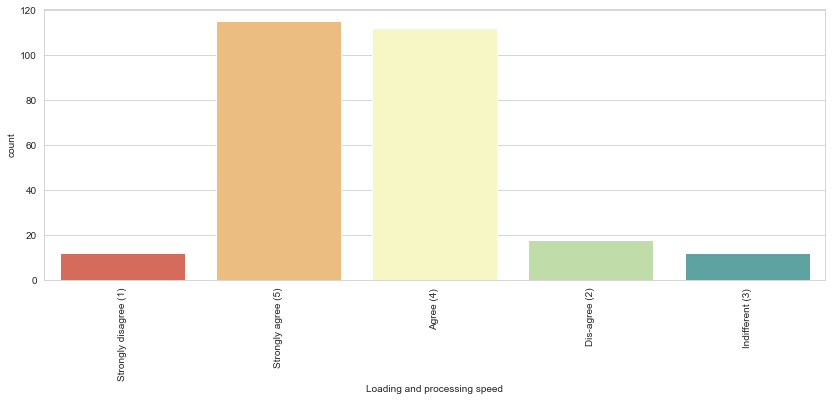

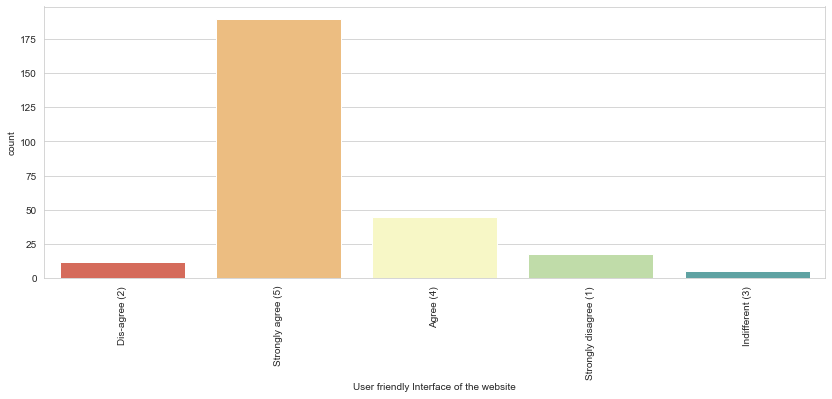

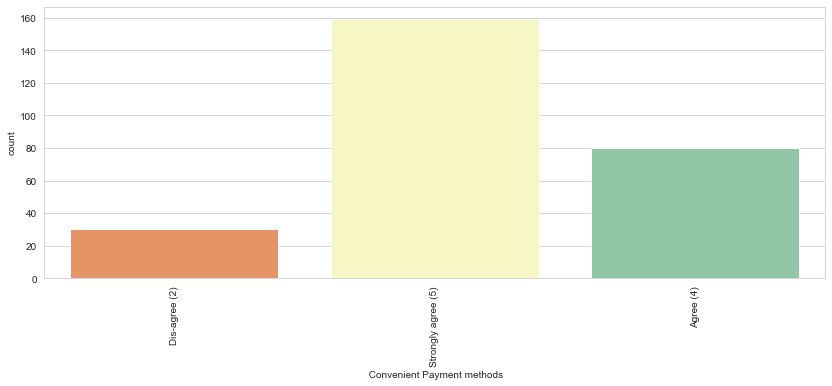

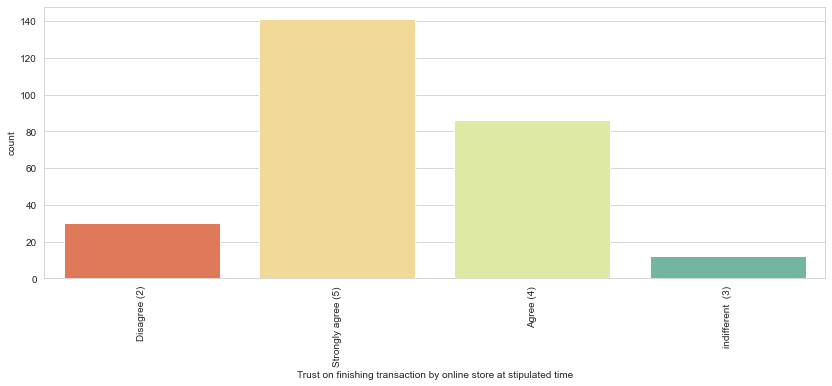

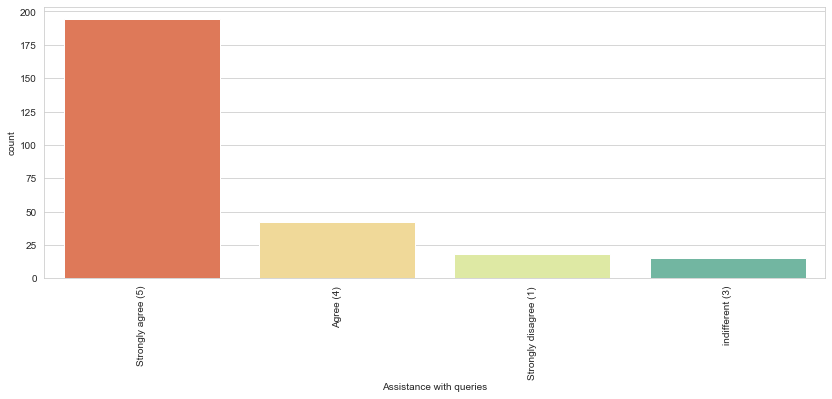

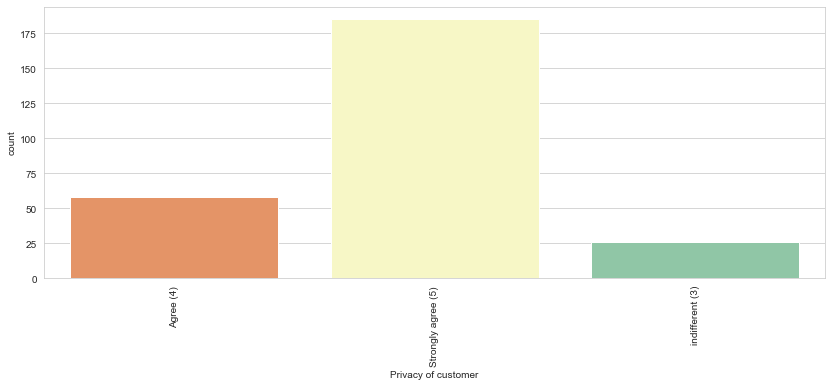

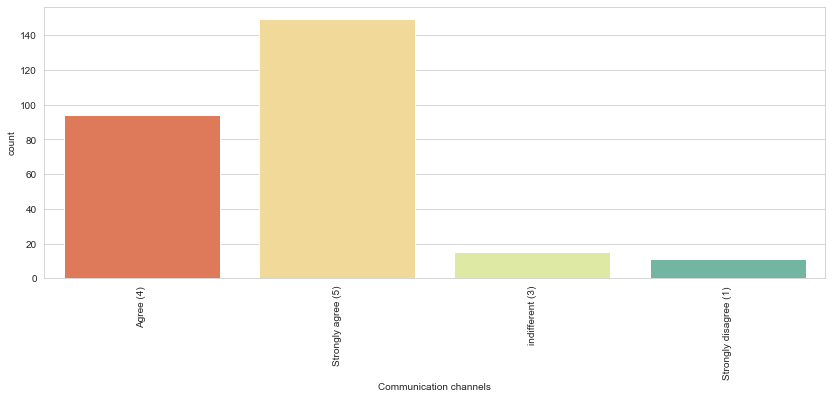

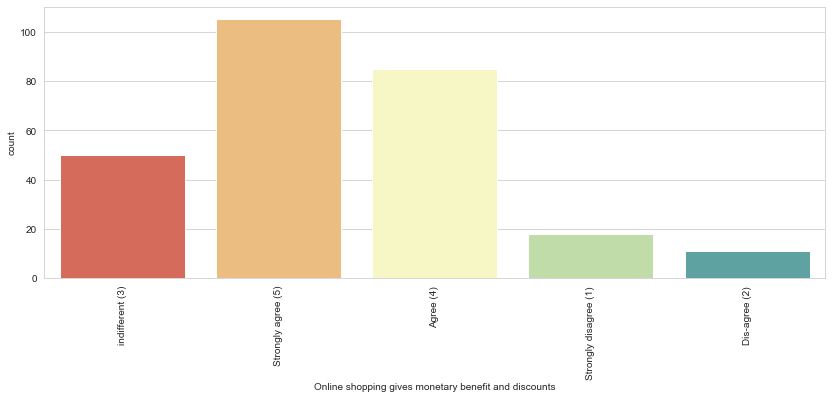

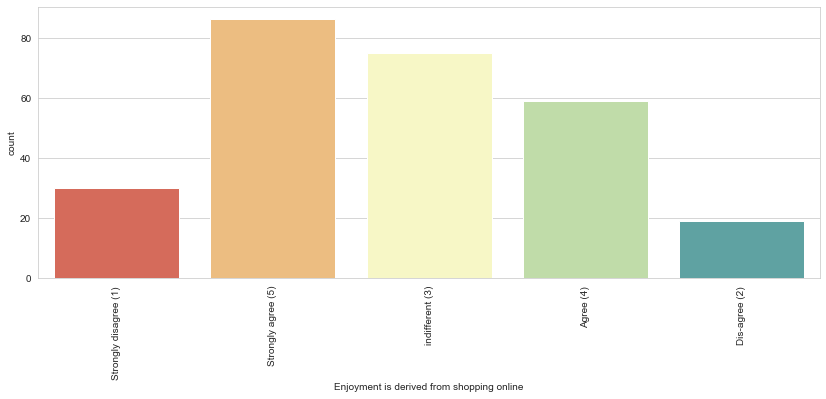

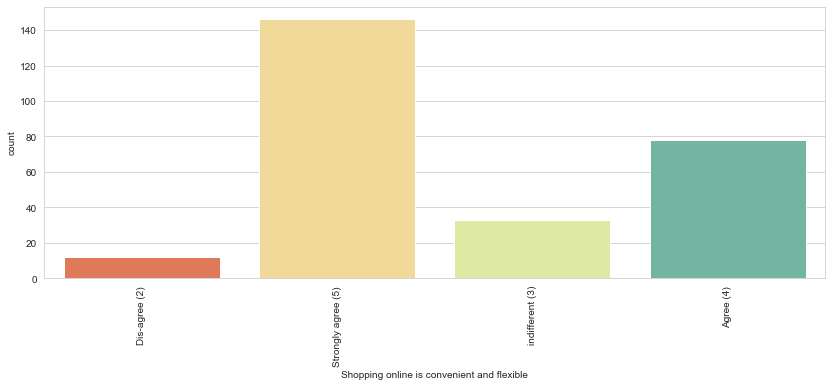

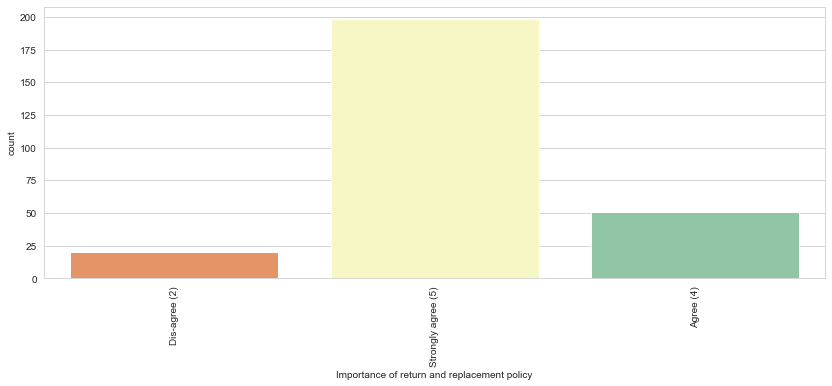

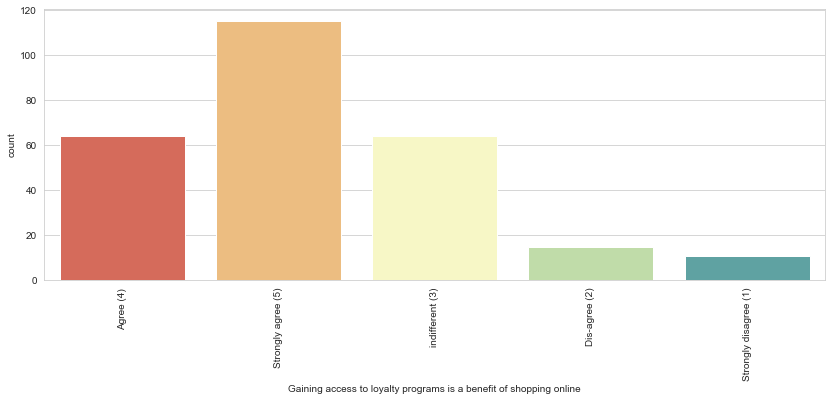

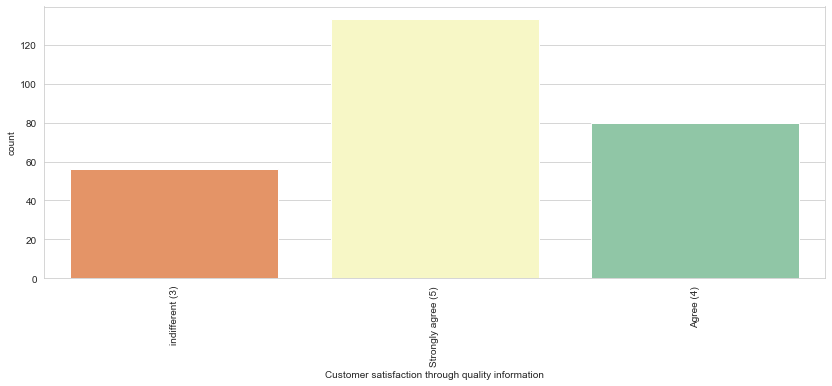

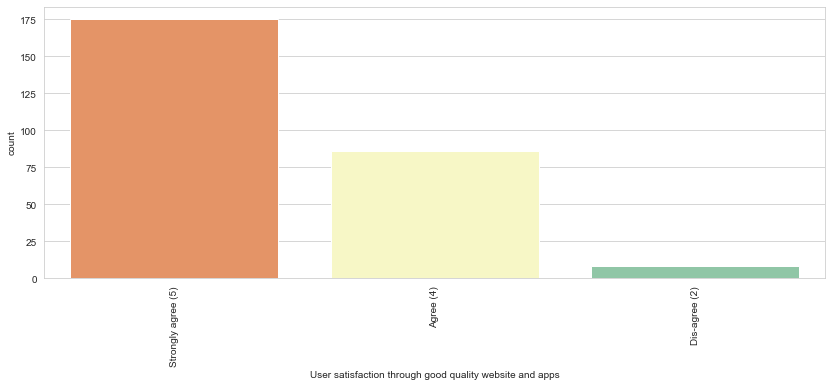

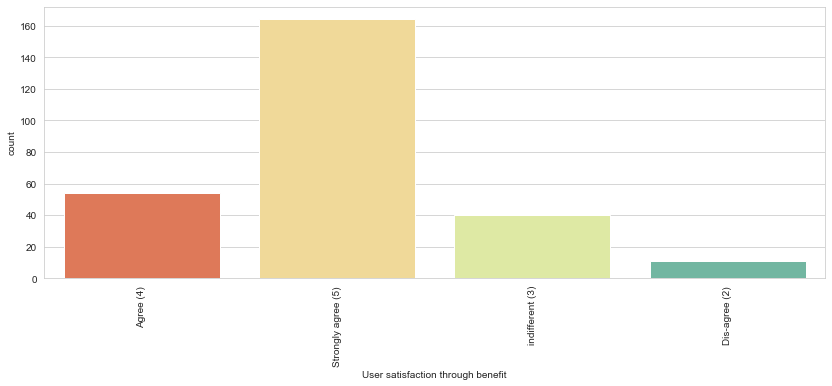

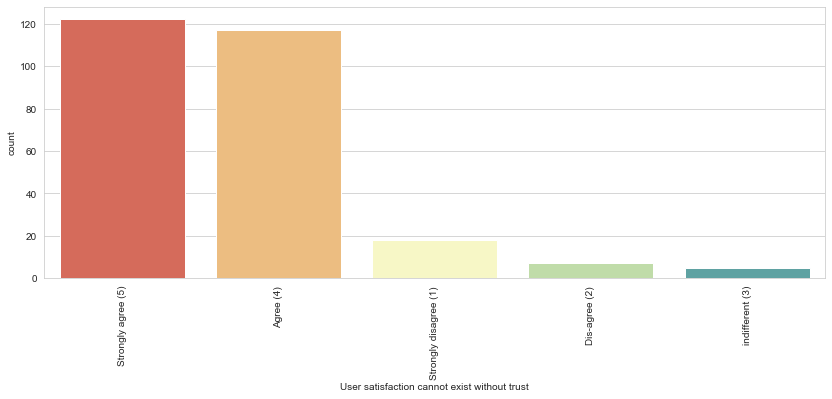

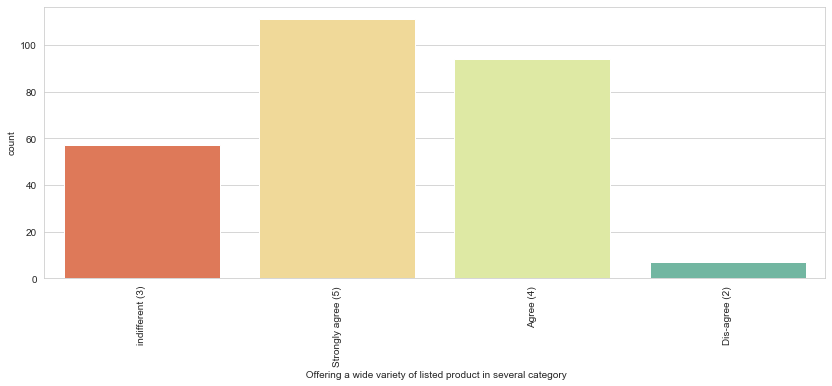

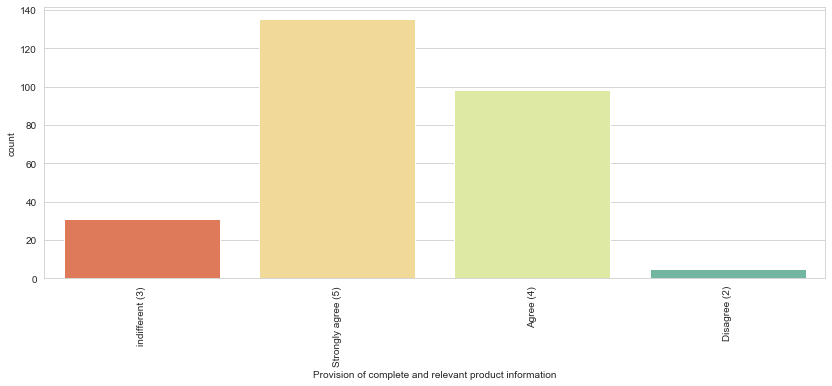

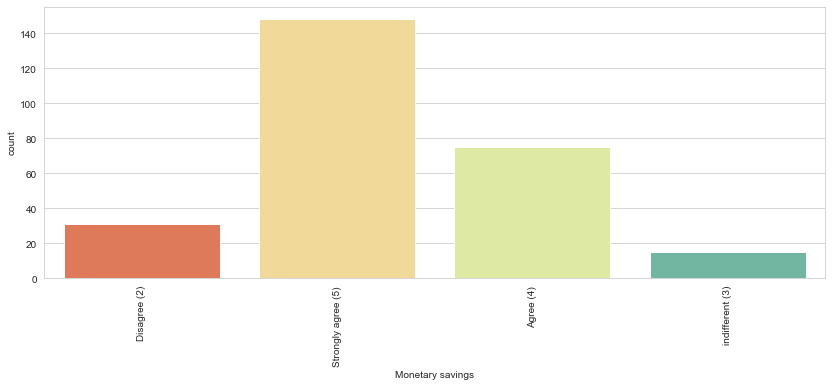

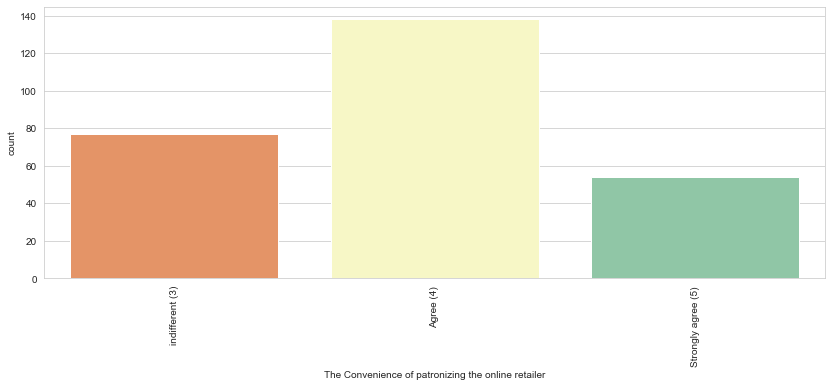

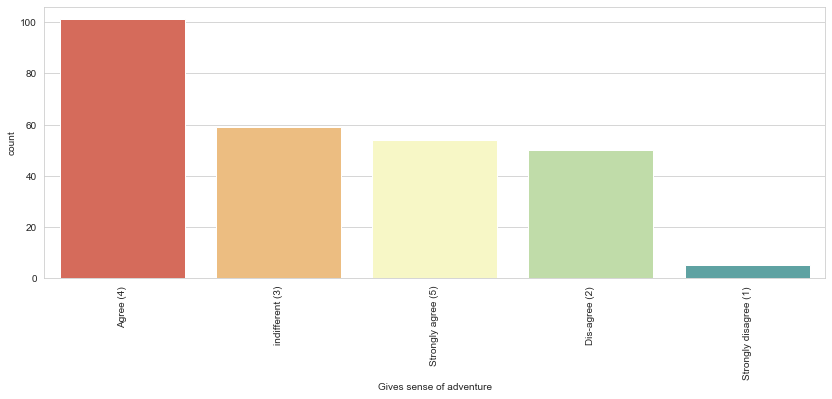

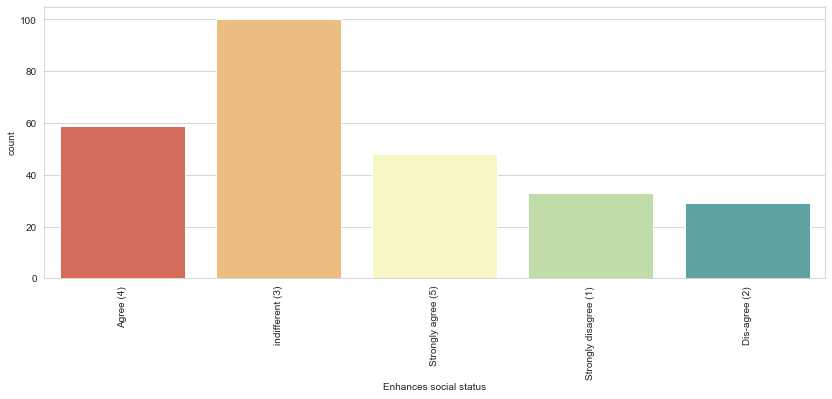

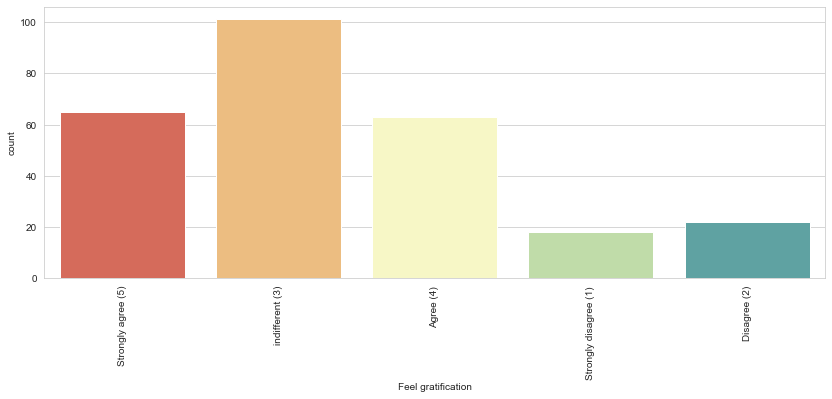

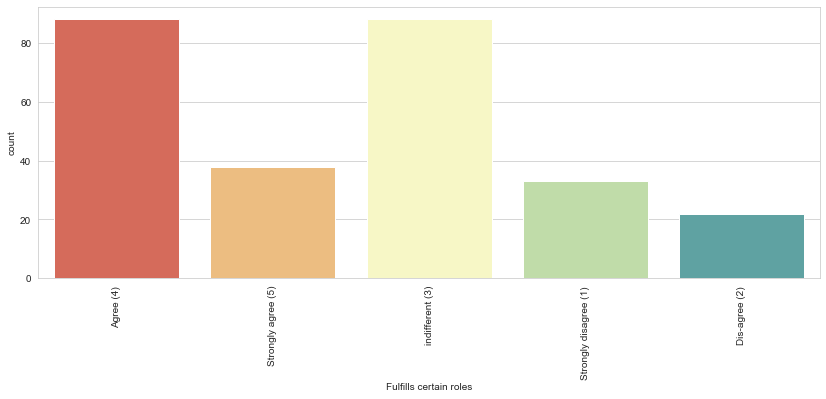

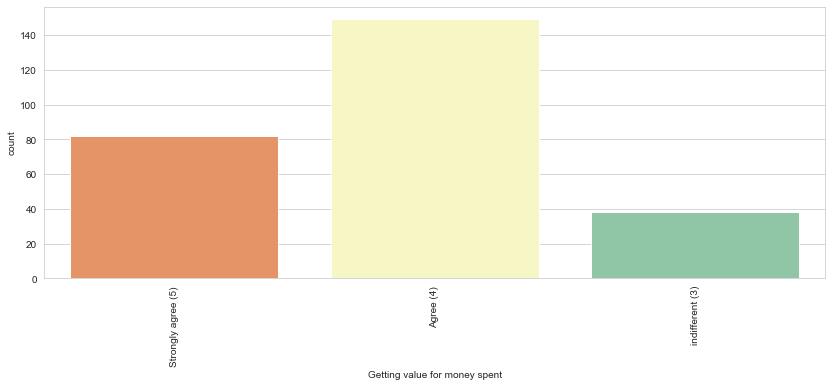

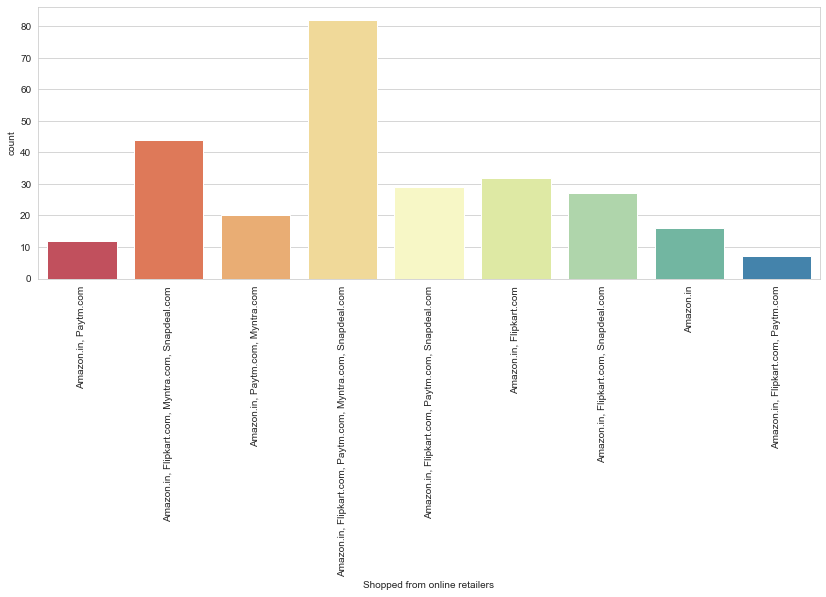

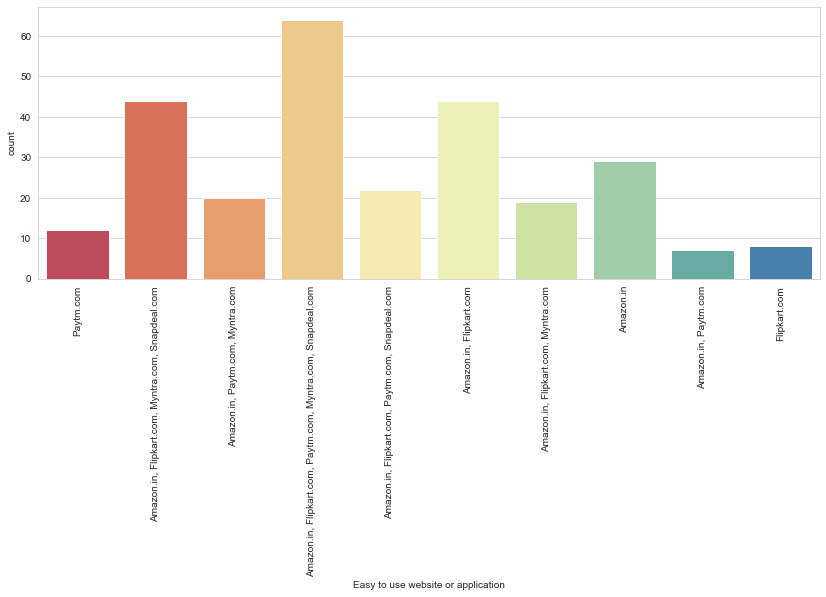

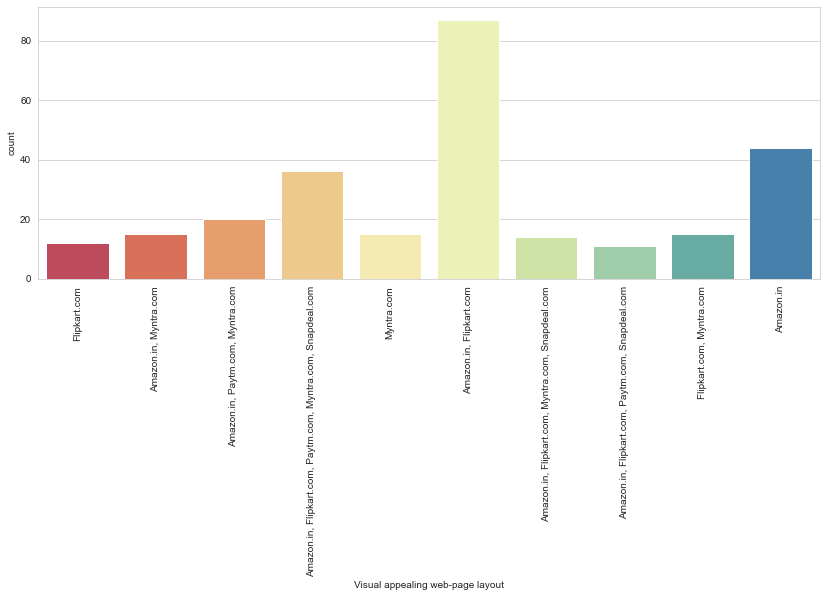

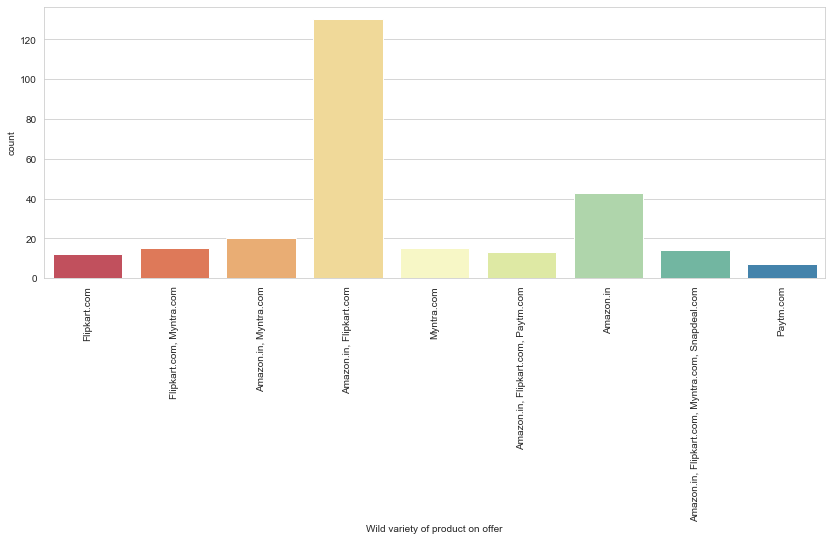

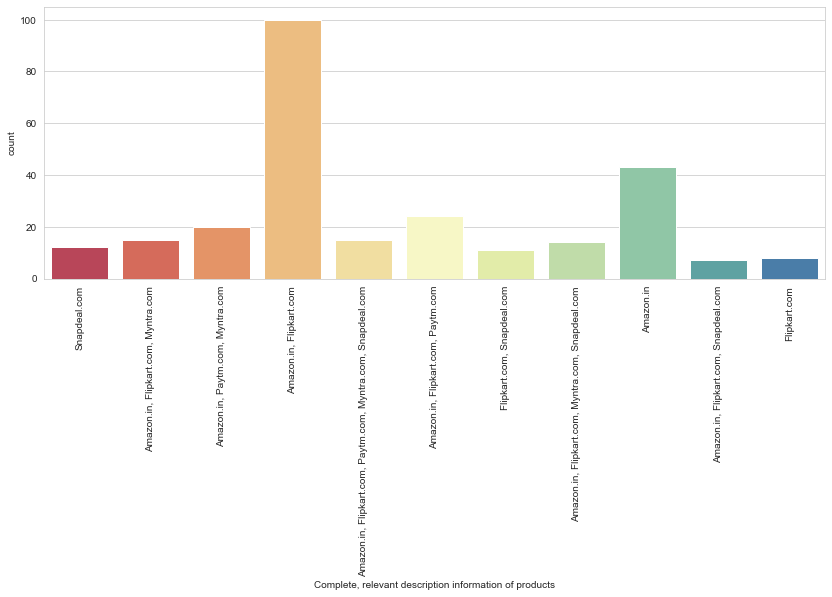

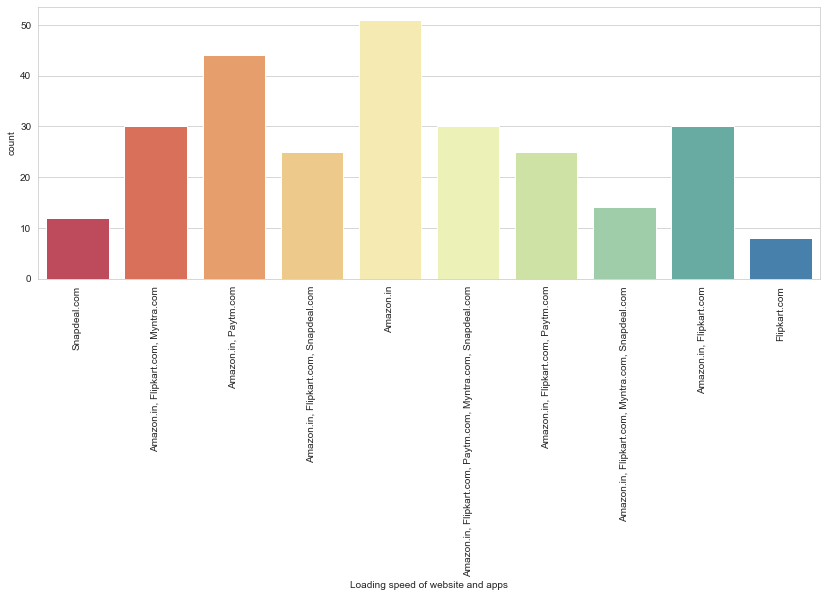

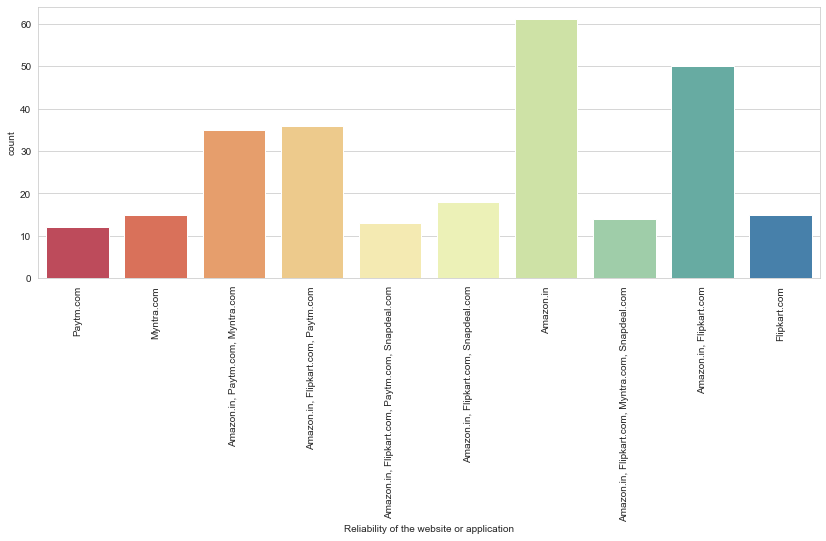

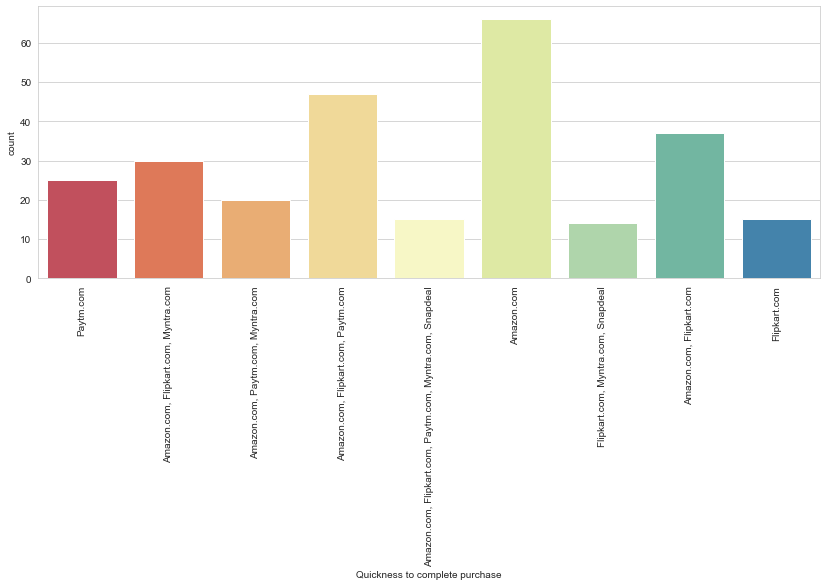

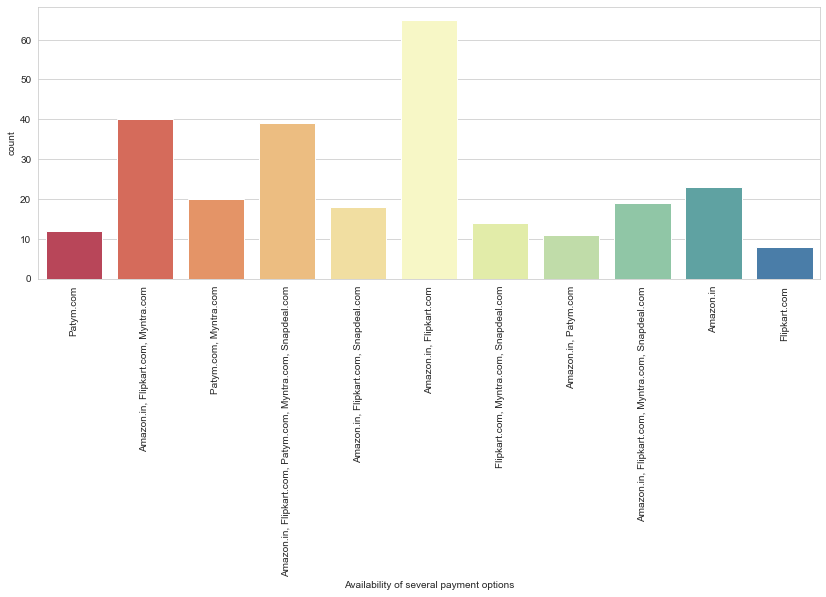

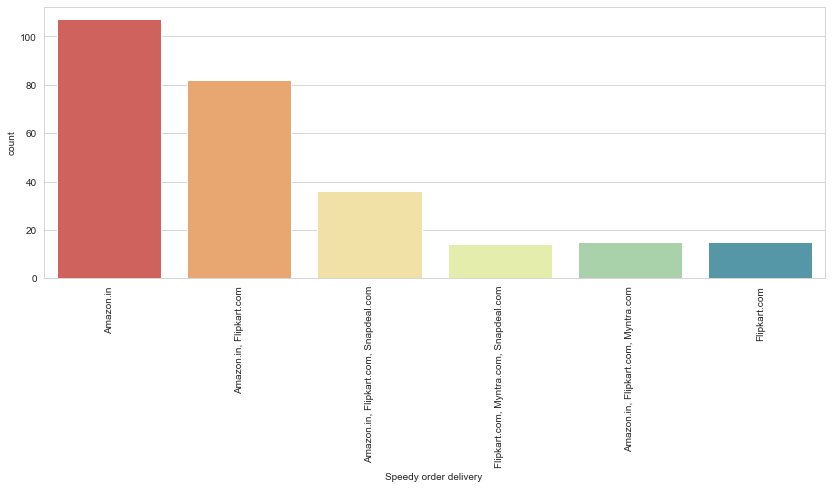

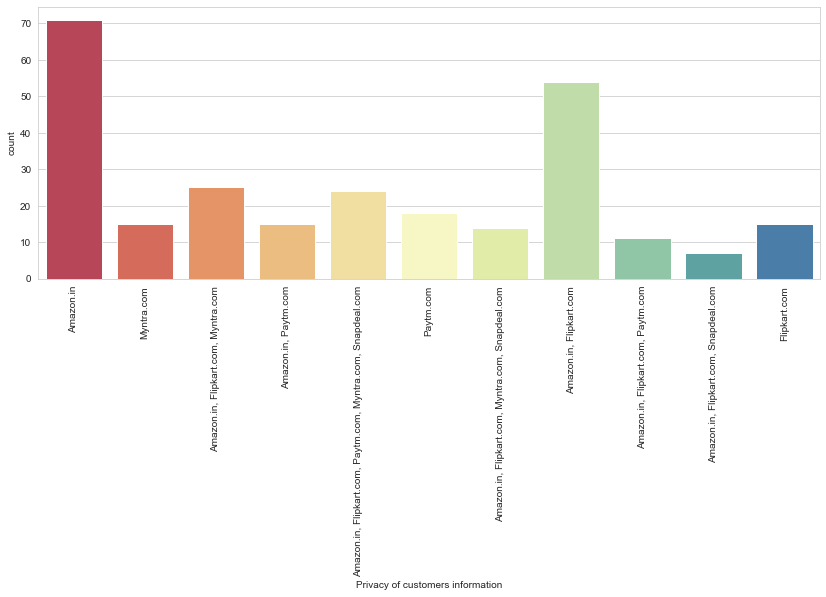

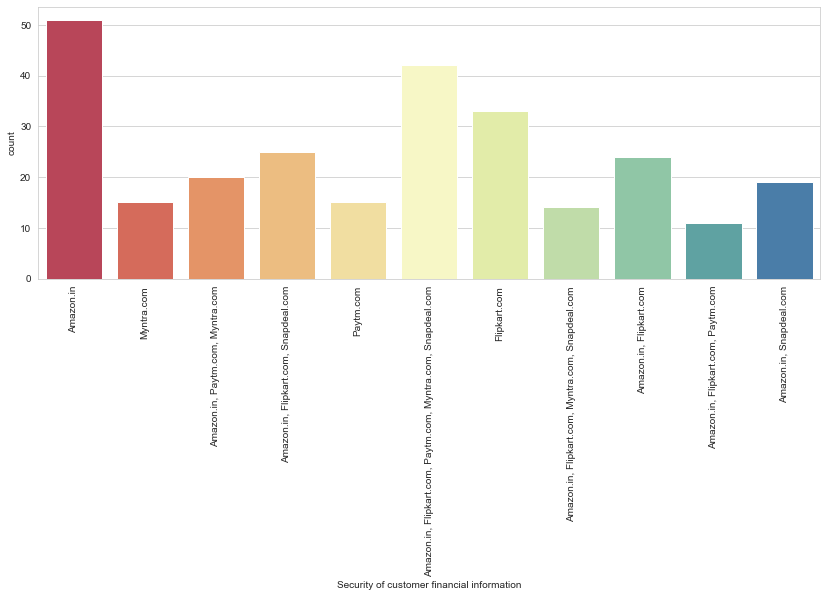

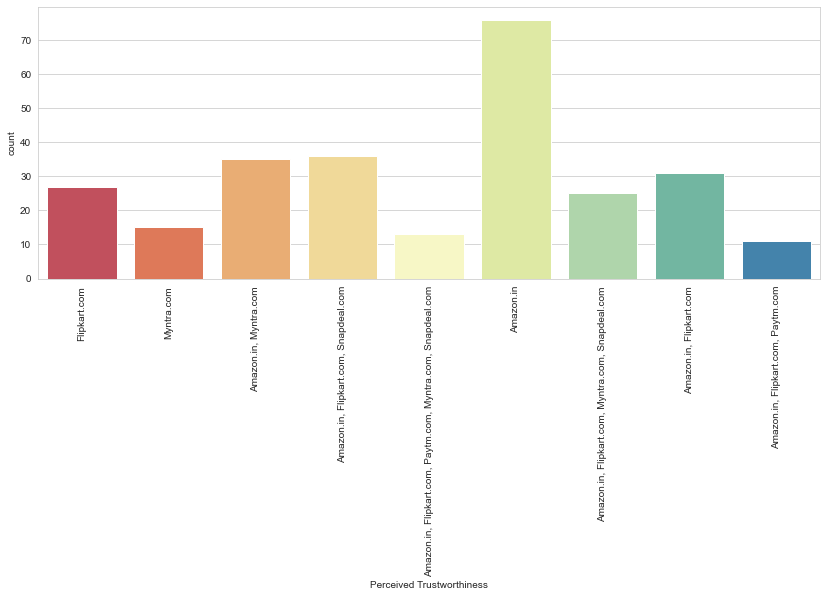

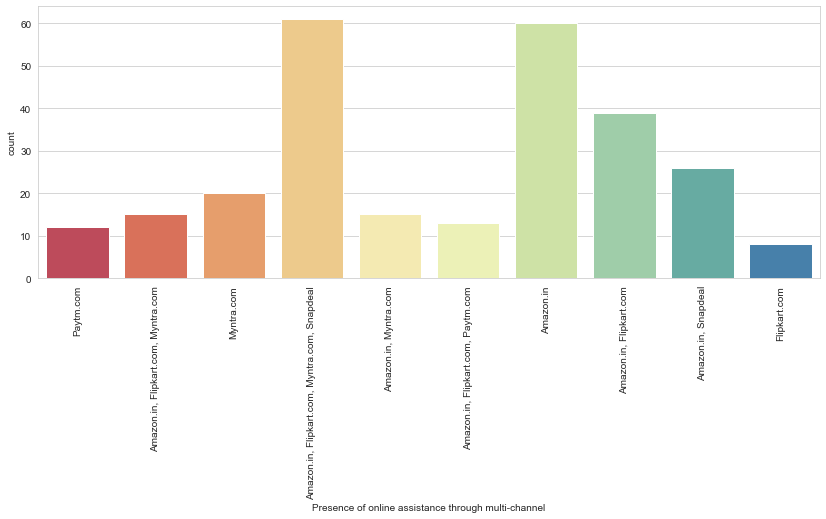

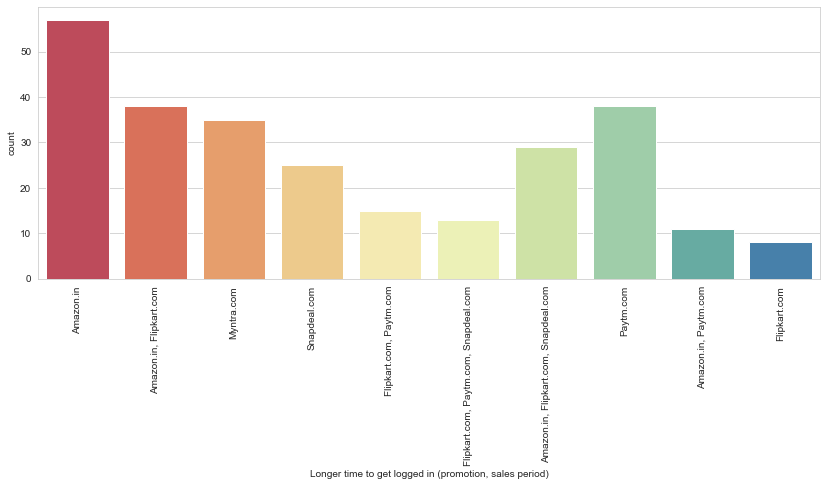

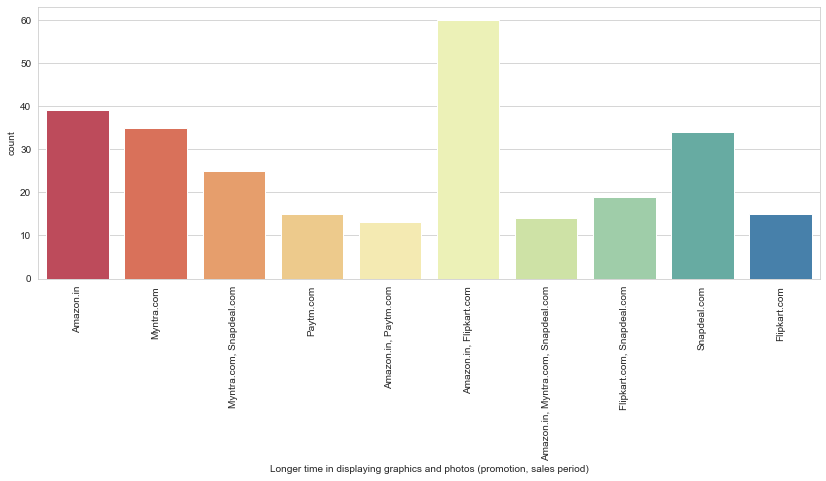

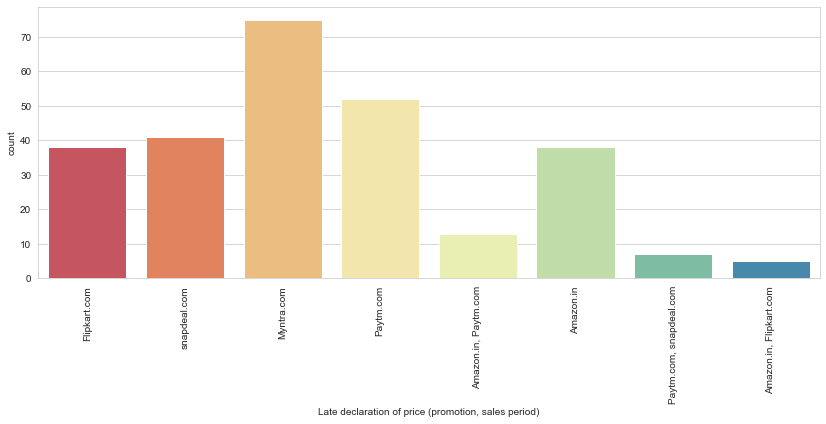

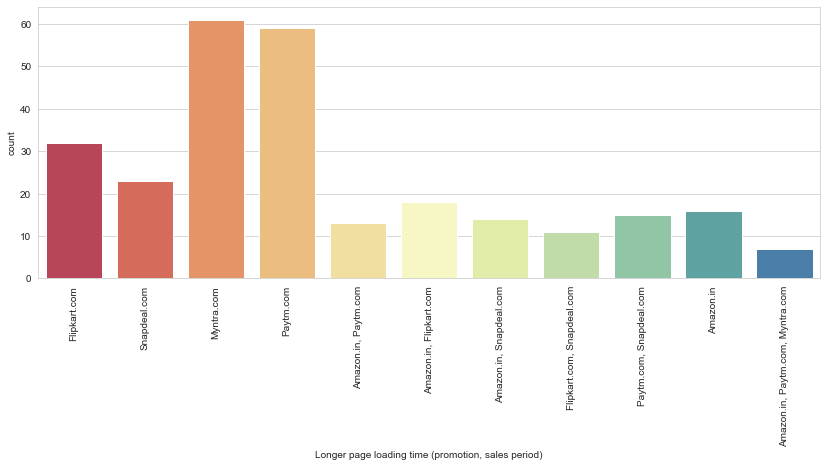

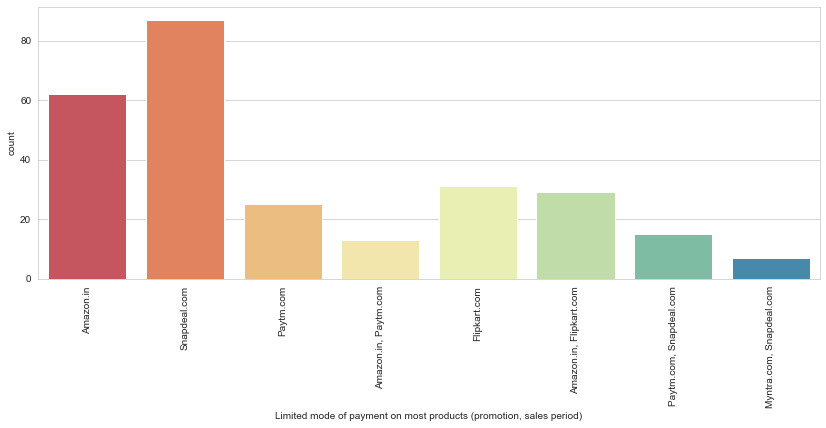

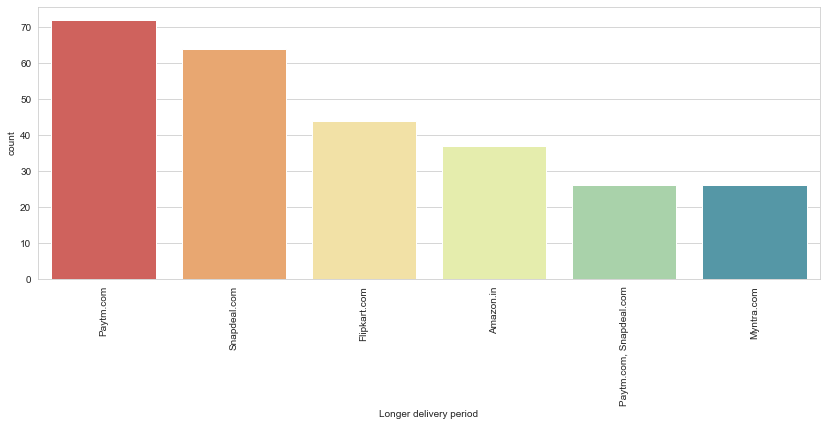

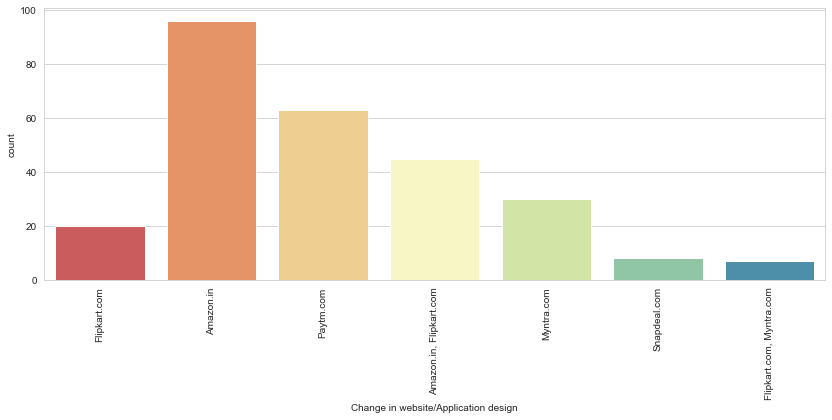

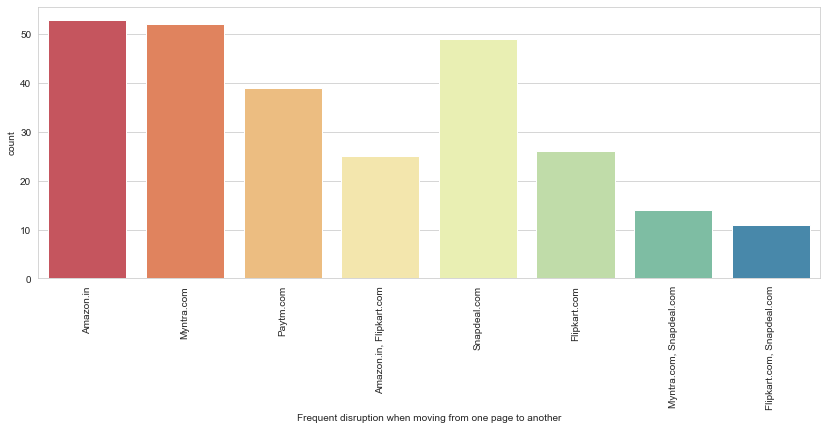

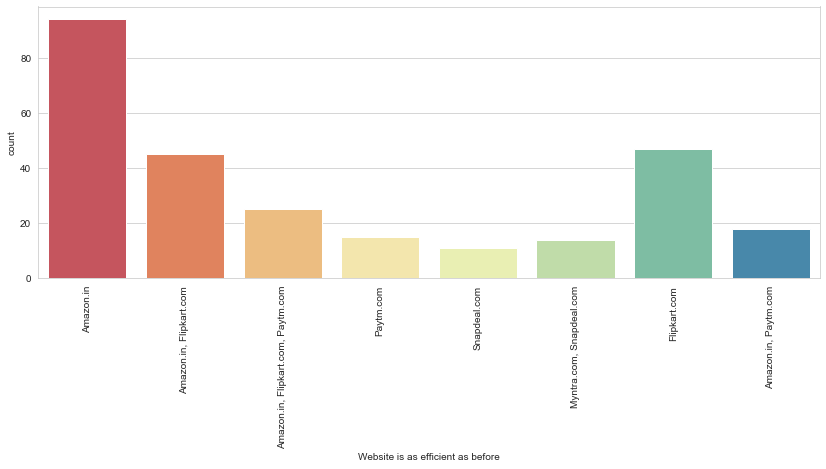

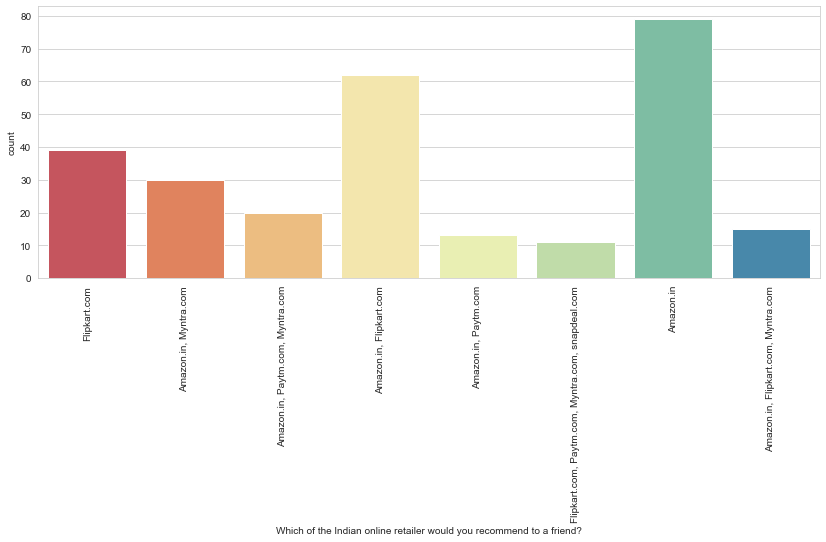

In [21]:
#Countplot of columns
for i in df.columns:
    plt.figure(figsize=(14,5))
    sns.countplot(x=i, data = df, palette = 'Spectral')
    plt.xticks(rotation = 90)

### Quantitative Plot of Features

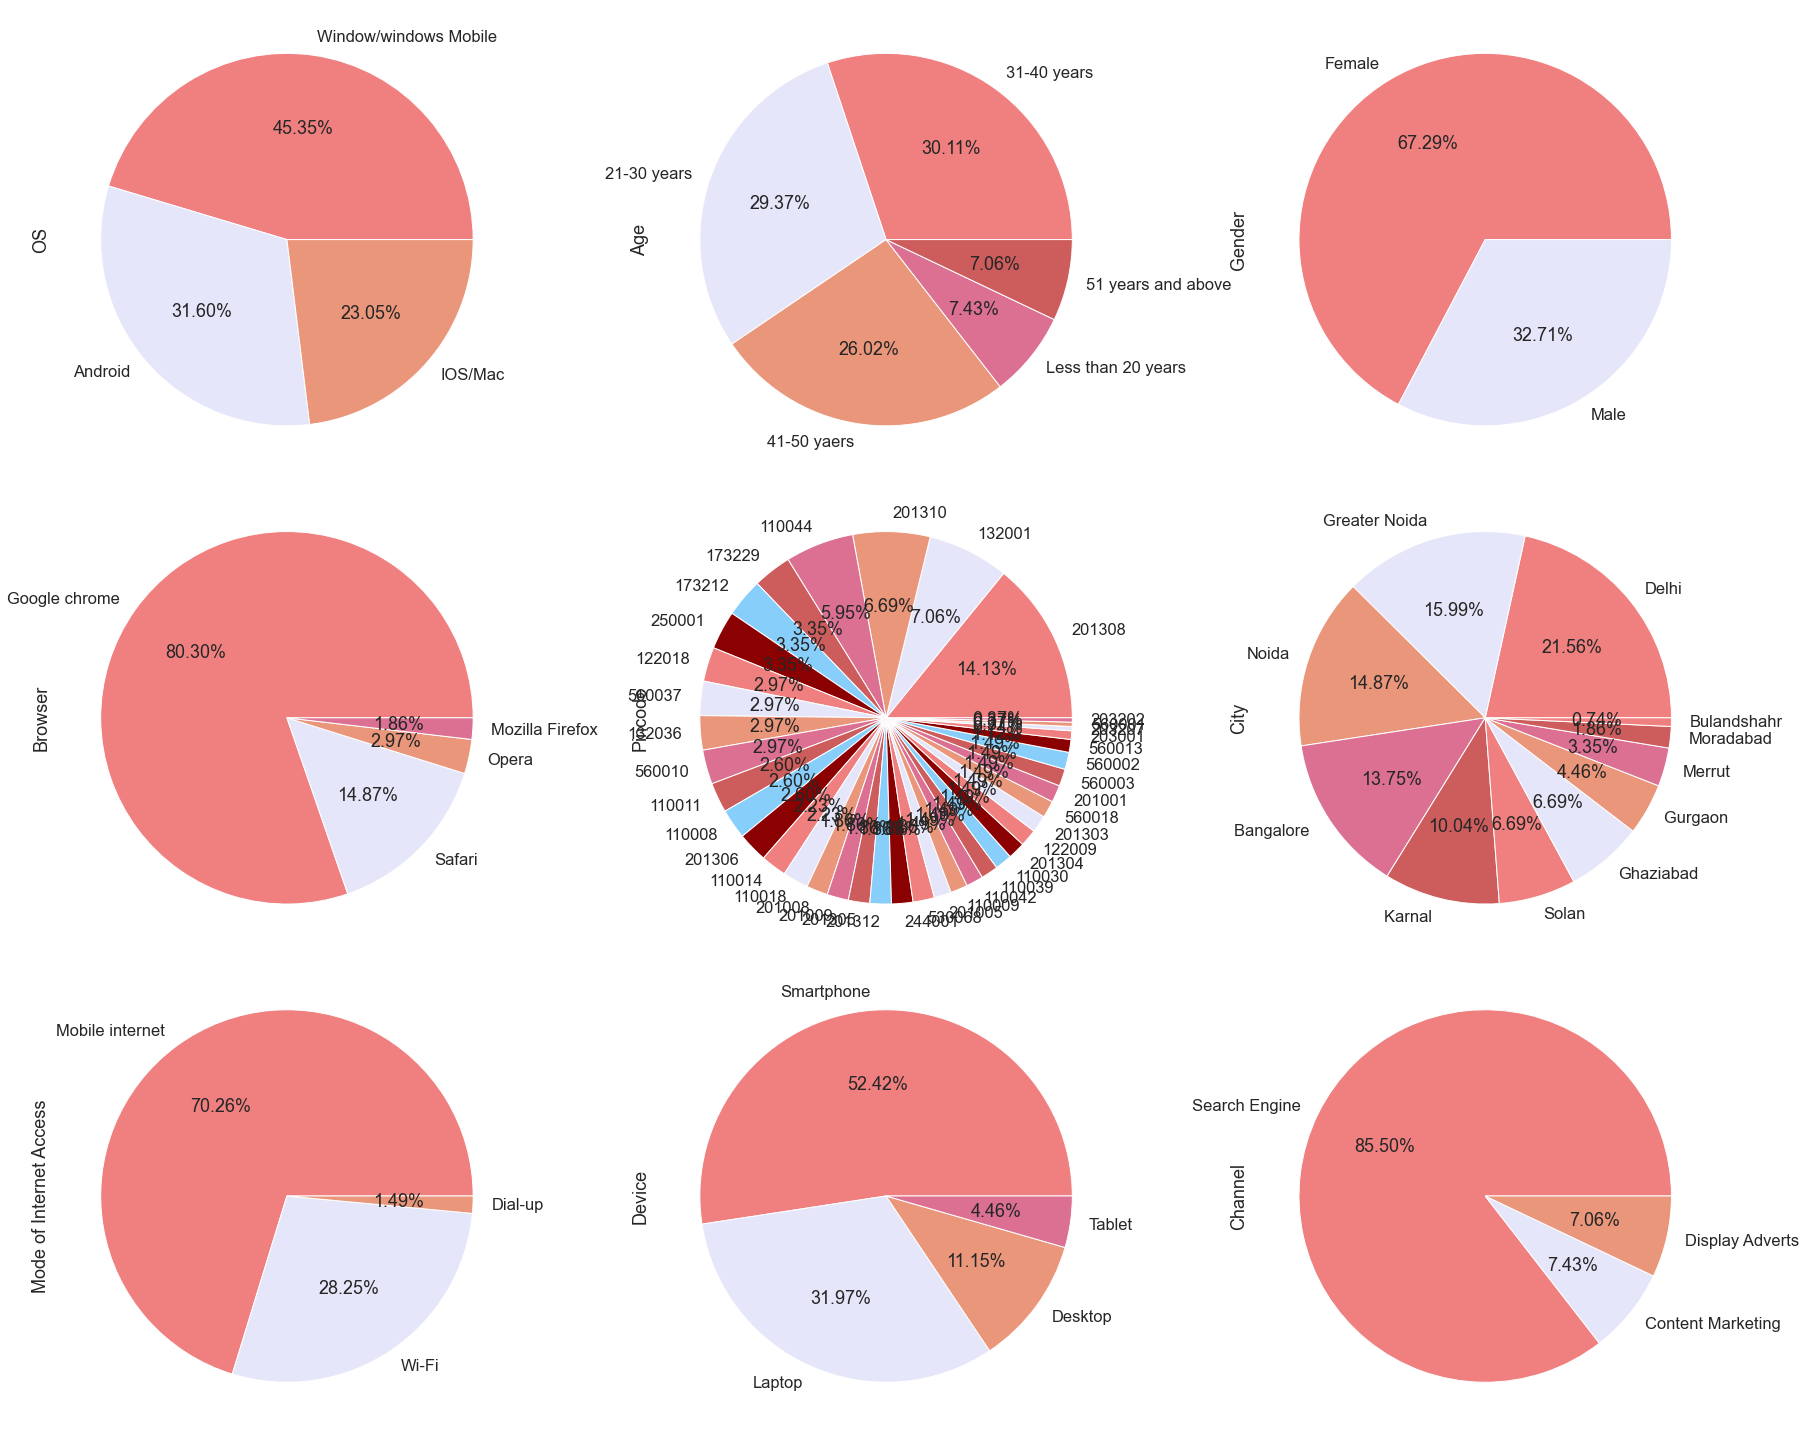

In [109]:
sns.set(style = 'whitegrid', font_scale=1.5)
plt.figure(figsize=(25,20))
plt.subplot(331)
df['OS'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)
plt.subplot(332)
df['Age'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.6,w_pad=0.5)
plt.subplot(333)
df['Gender'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)
plt.subplot(334)
df['Browser'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)
plt.subplot(335)
df['Pincode'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed','LightSkyBlue','#8B0000'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)
plt.subplot(336)
df['City'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)
plt.subplot(337)
df['Mode of Internet Access'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)
plt.subplot(338)
df['Device'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)
plt.subplot(339)
df['Channel'].value_counts().plot(kind = 'pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct = '%1.2f%%')
plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=0.5)

#### Leads:
    1. Google Chrome Browser is used haevily
    2. To access the retail website, people tend to use search engine more often
    3. Most of the observant uses mobile internet to access internet
    4. Smartphones are used more than any other form of device

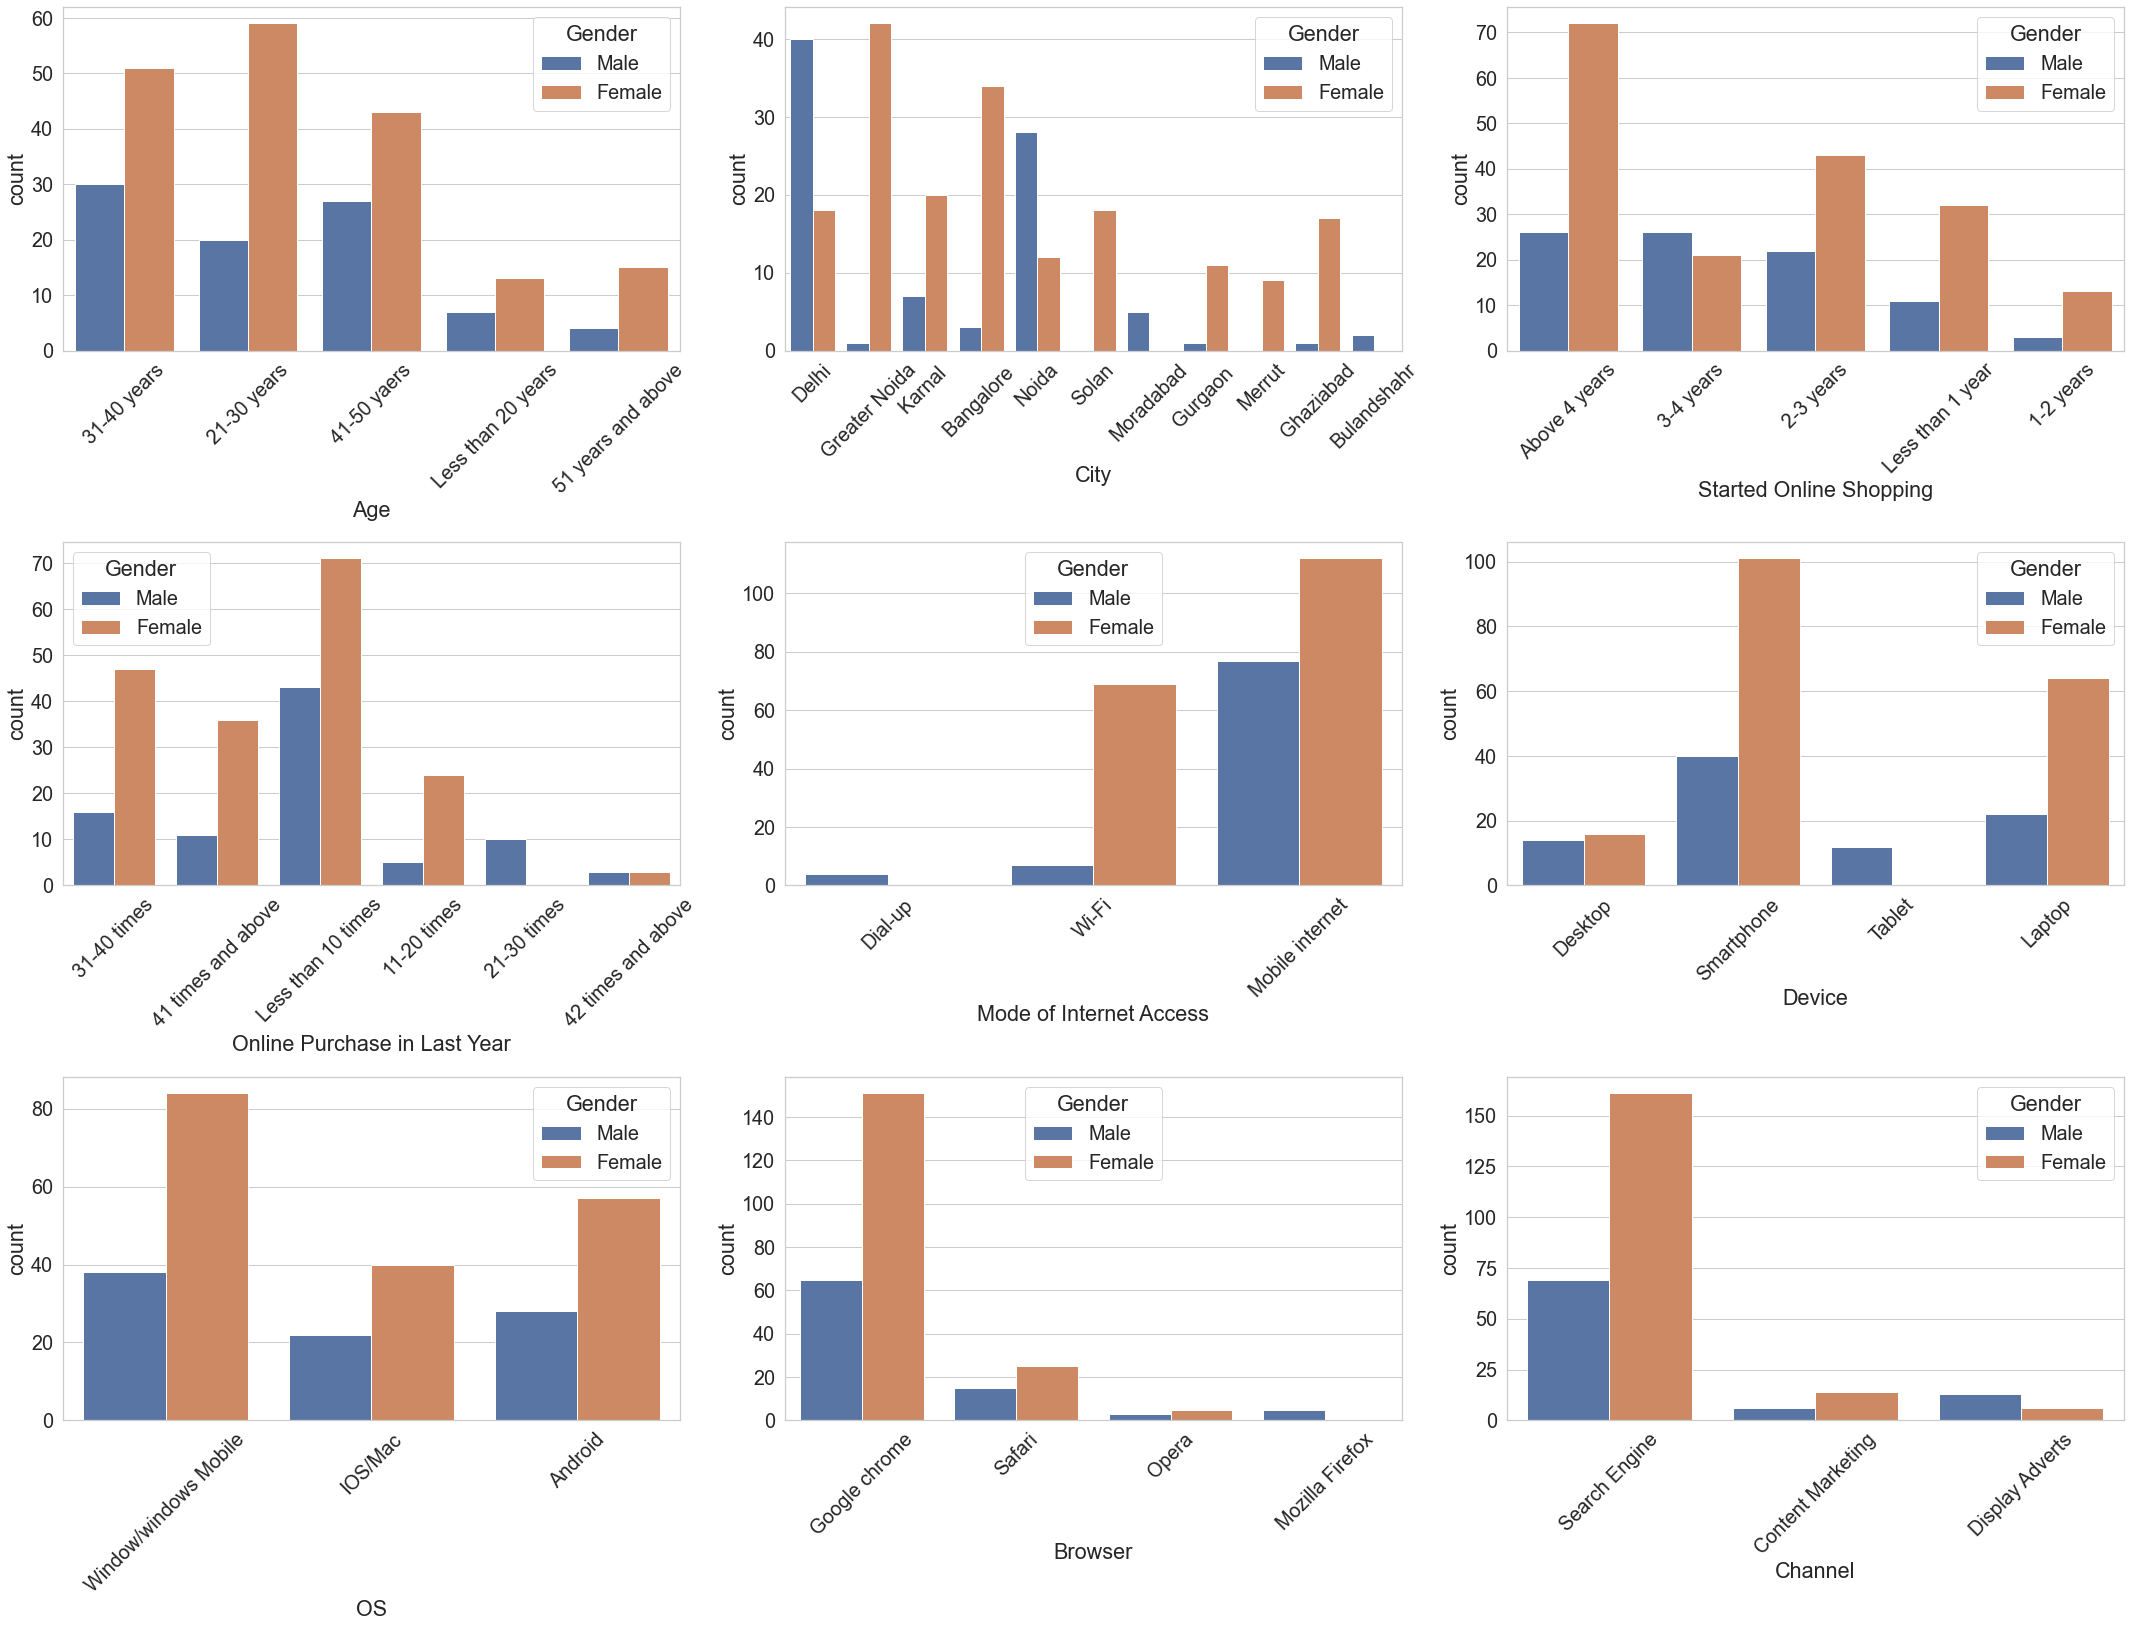

In [134]:
sns.set(style = 'whitegrid', font_scale=1.8, rc={'figure.figsize':(30,23)})

plt.subplot(331)
sns.countplot(x='Age', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)
plt.subplot(332)
sns.countplot(x='City', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)
plt.subplot(333)
sns.countplot(x='Started Online Shopping', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)
plt.subplot(334)
sns.countplot(x='Online Purchase in Last Year', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1.)
plt.subplot(335)
sns.countplot(x='Mode of Internet Access', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)
plt.subplot(336)
sns.countplot(x='Device', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)
plt.subplot(337)
sns.countplot(x='OS', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)
plt.subplot(338)
sns.countplot(x='Browser', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)
plt.subplot(339)
sns.countplot(x='Channel', hue = 'Gender', data =df)
plt.xticks(rotation = 45)
plt.tight_layout(pad=1)

#### Insights:
    1. Generally femal of age ranging in 21-50yrs are observed more
    2. Delhi records more male and Greater Noida records highest female proportion. Meerut has no male observant
    3. Majorityof the females startes online shopping 3-4yrs back
    4. No female uses dial-up method for shopping nor tablet. 
    5. Most female tends to prefer Chrome for online shopping
    

### Method 1: To plot barplot of categorical & ordinal features

In [174]:
def barplot(cols):
    dt = pd.DataFrame(df[cols].value_counts())
    plt.figure(figsize=(12,6))
    sns.barplot(y=dt[cols],
    x = df[cols].value_counts().index,
    palette = 'cool_r')
    plt.xticks(rotation = 90)

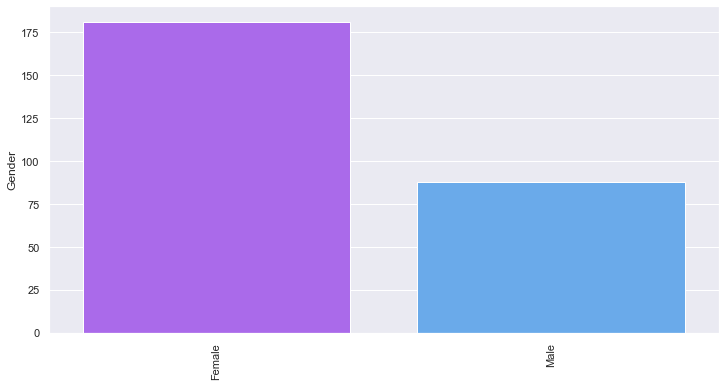

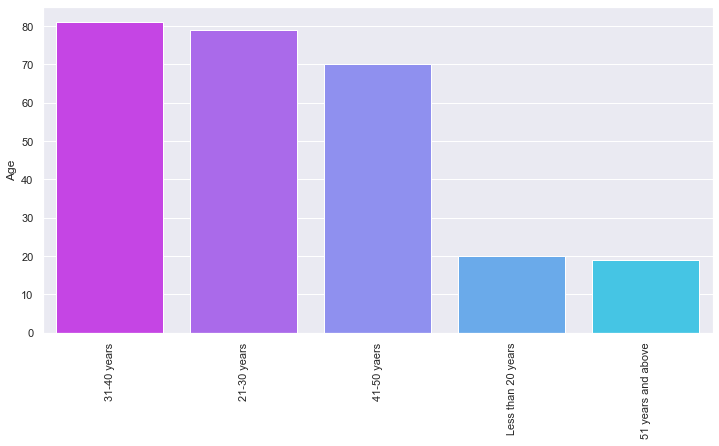

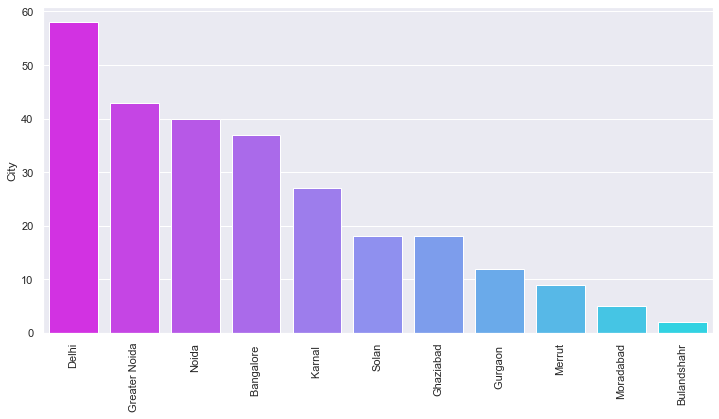

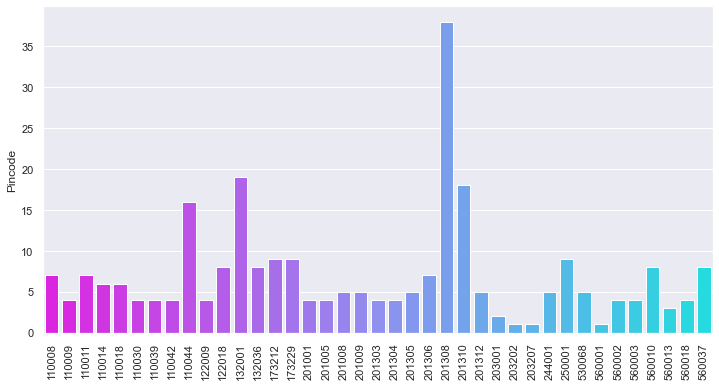

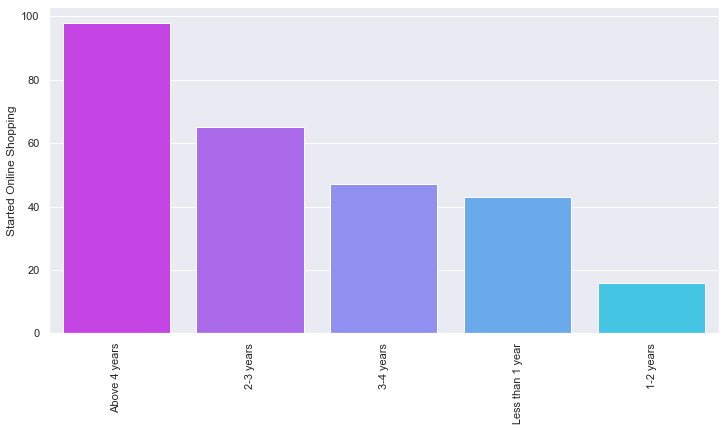

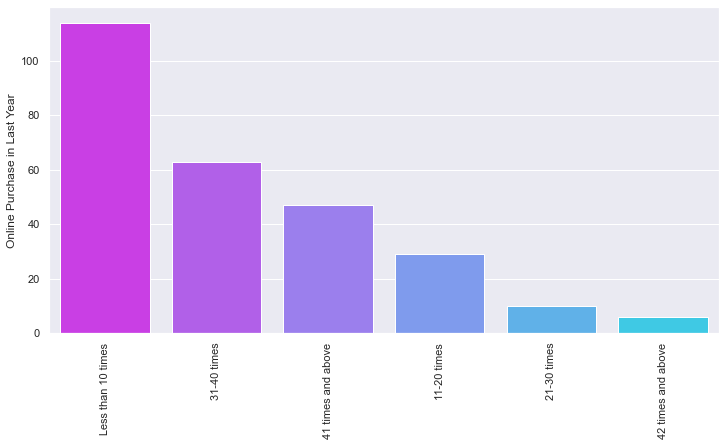

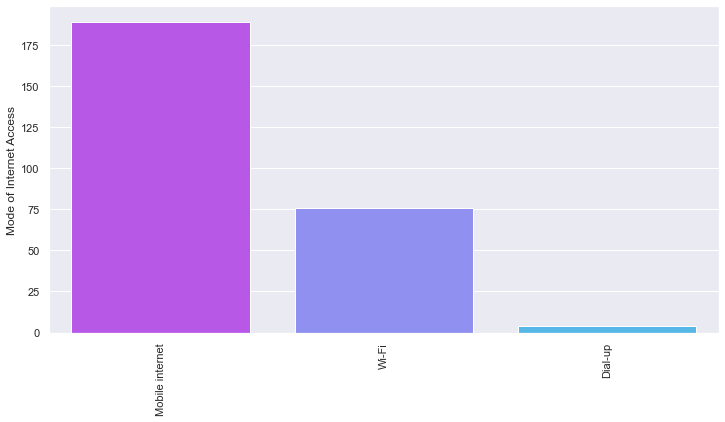

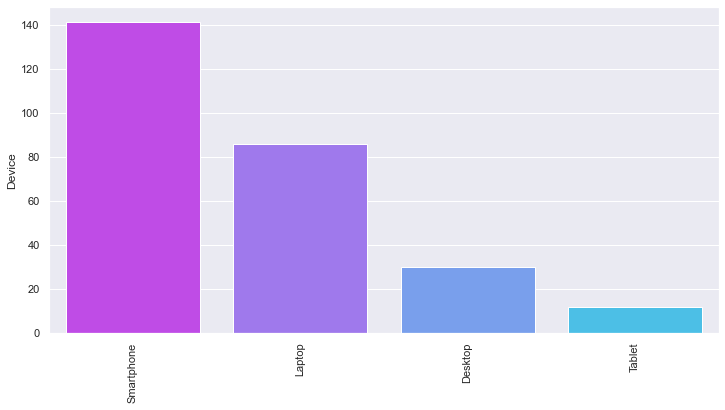

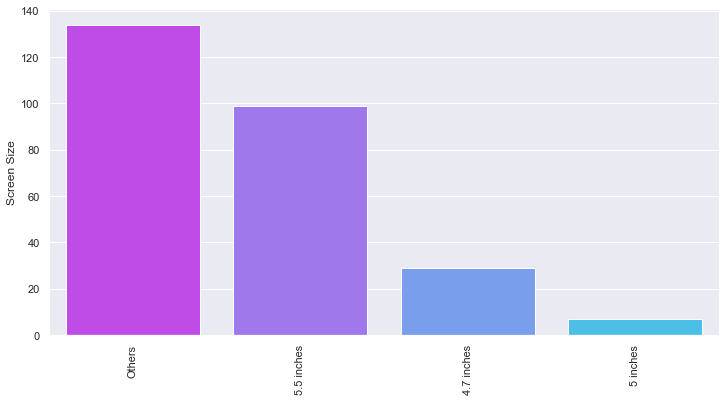

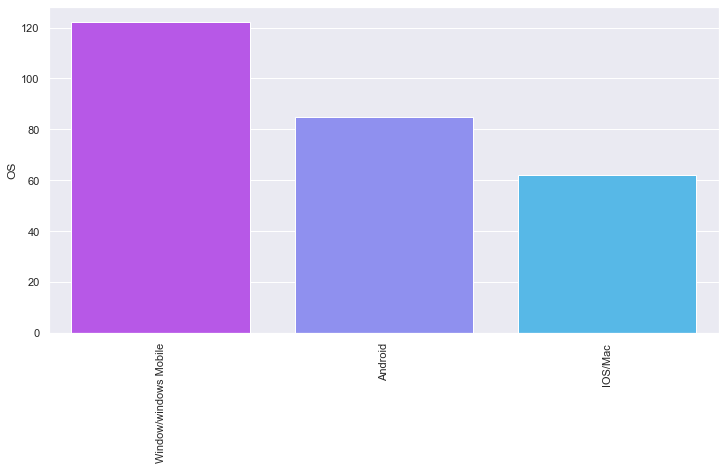

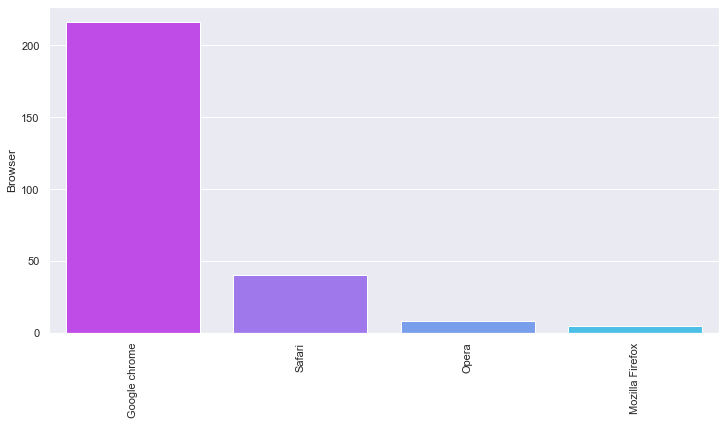

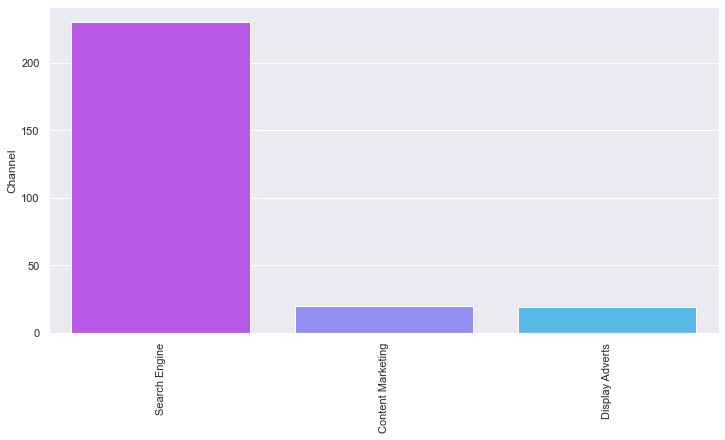

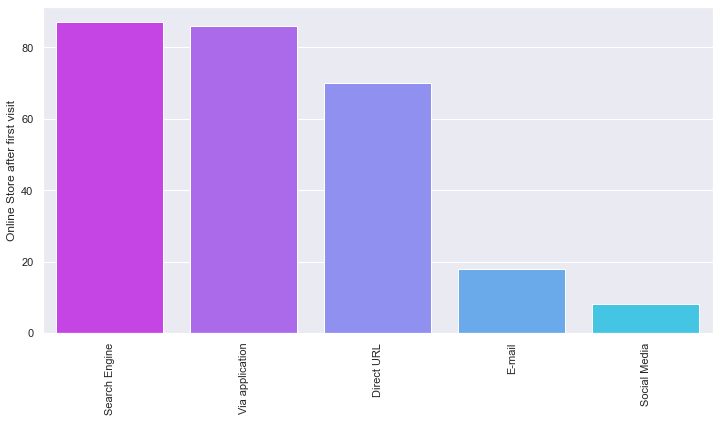

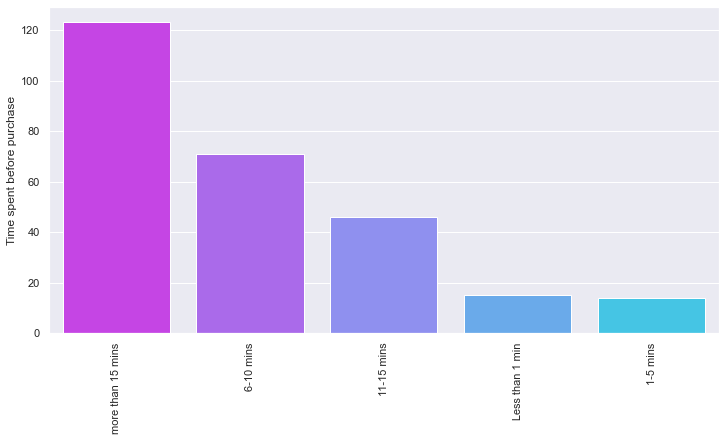

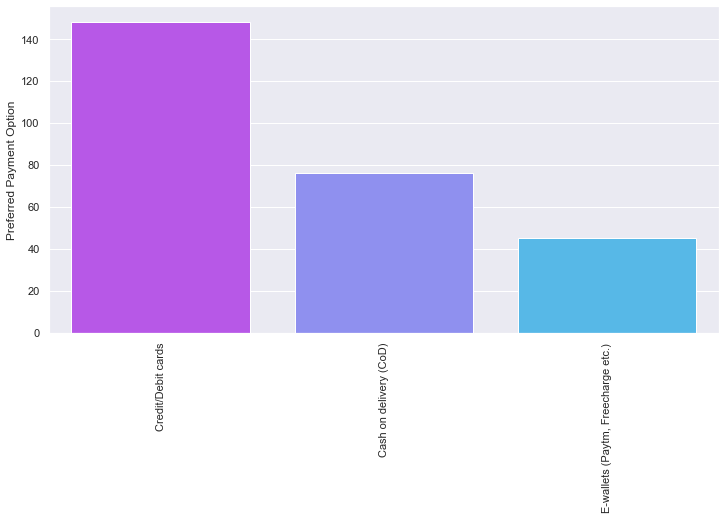

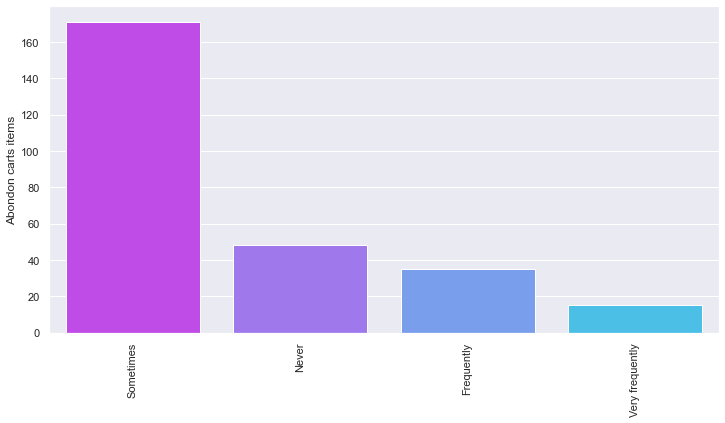

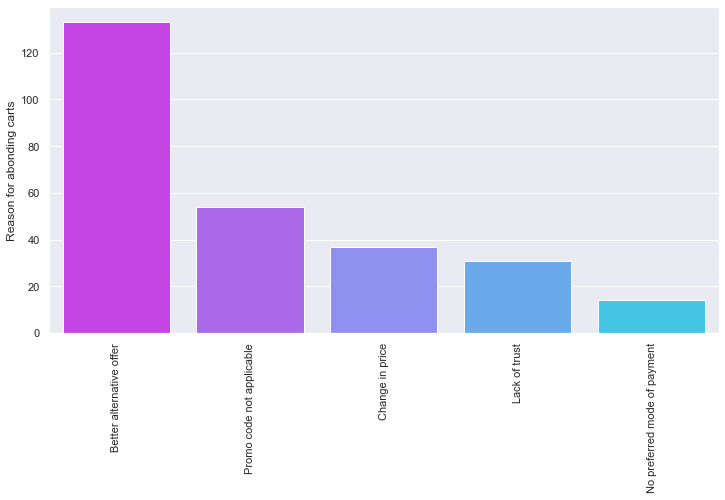

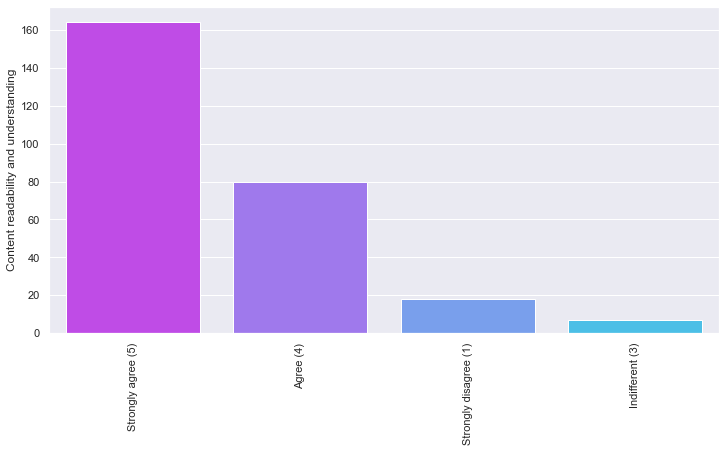

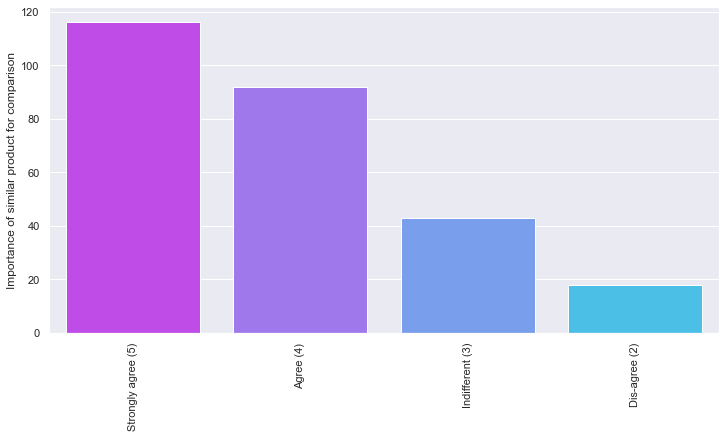

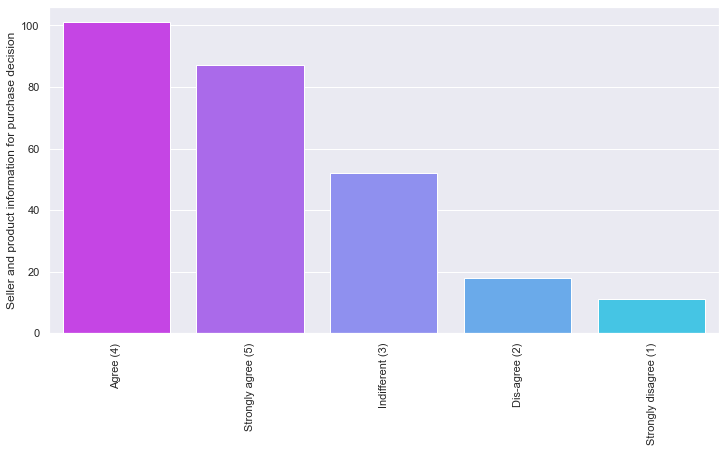

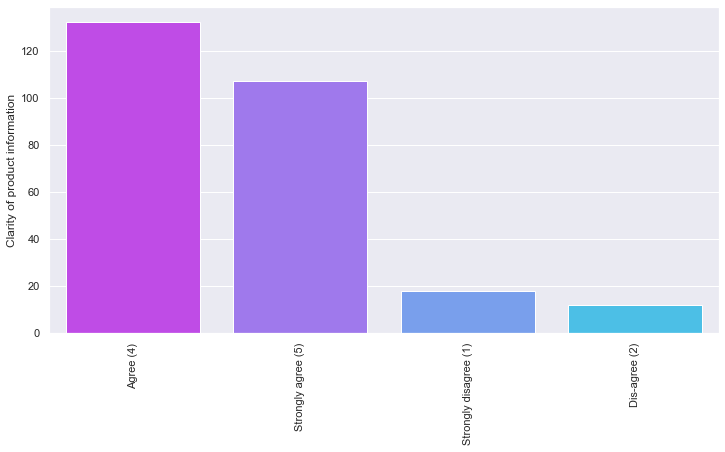

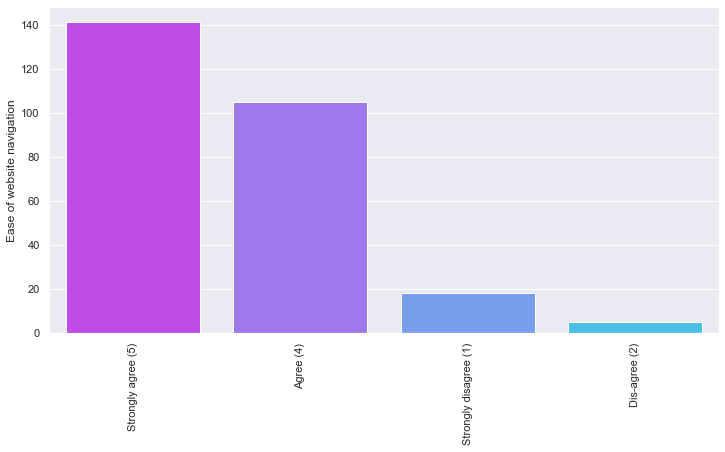

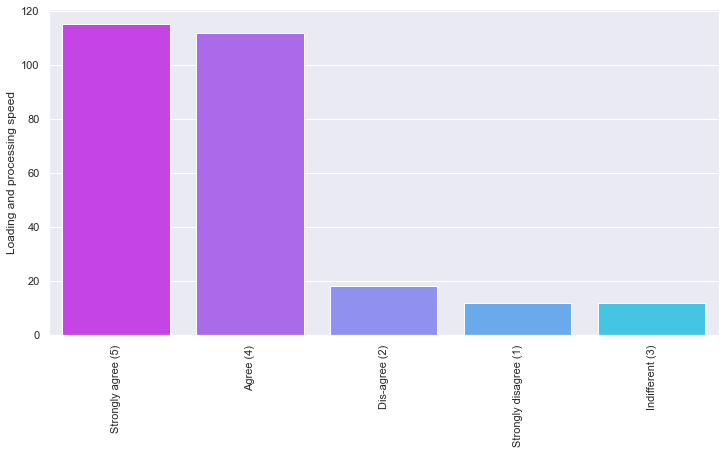

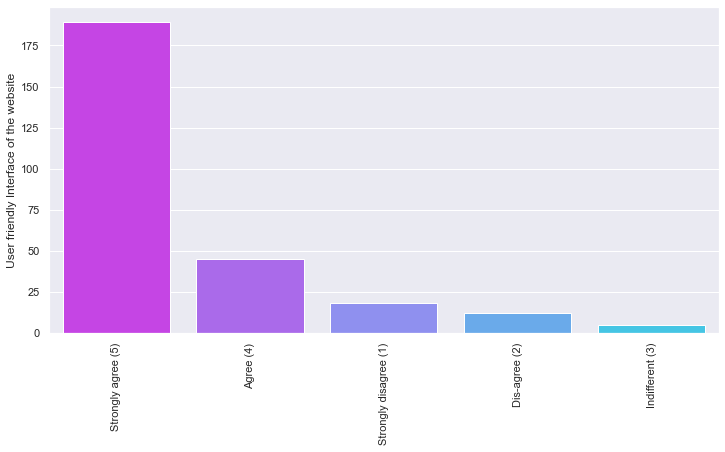

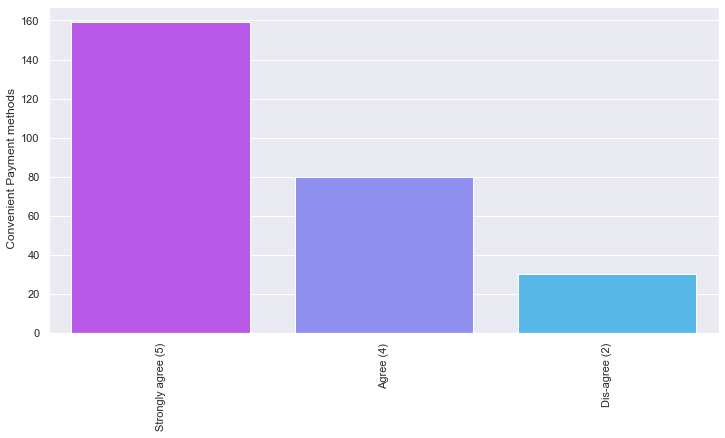

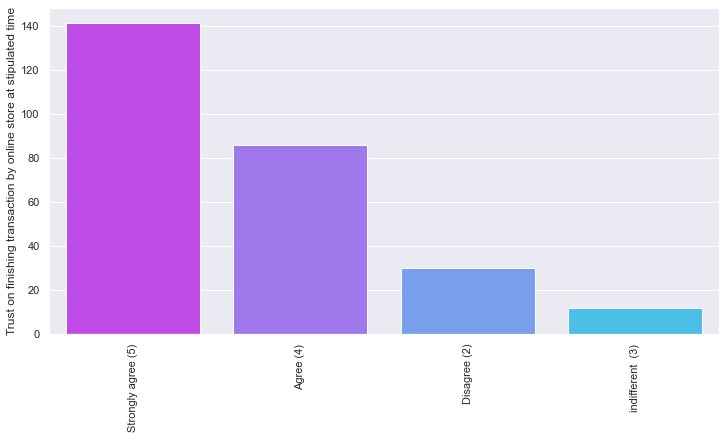

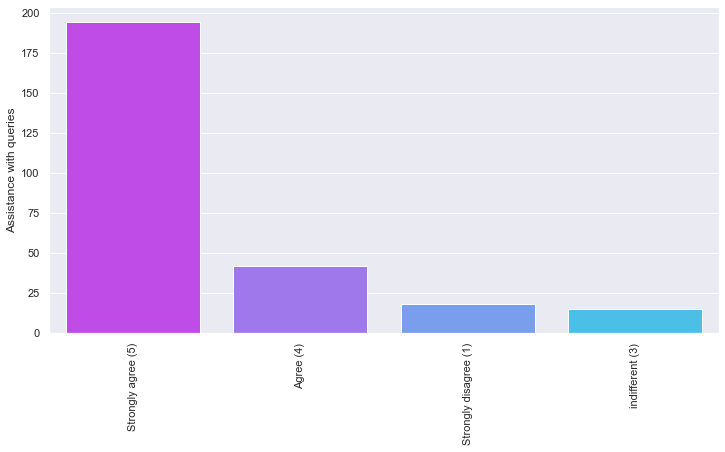

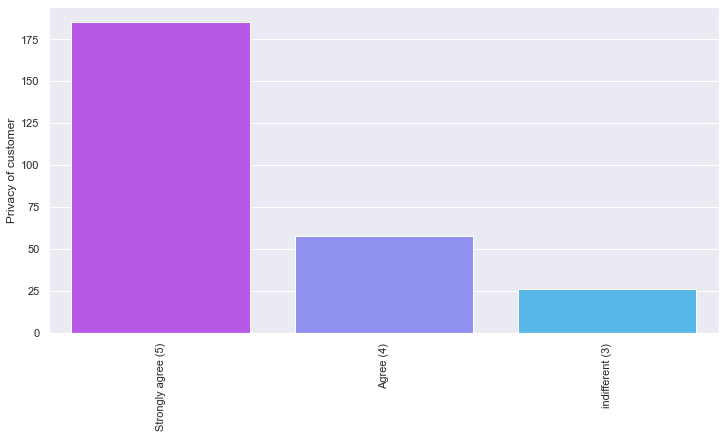

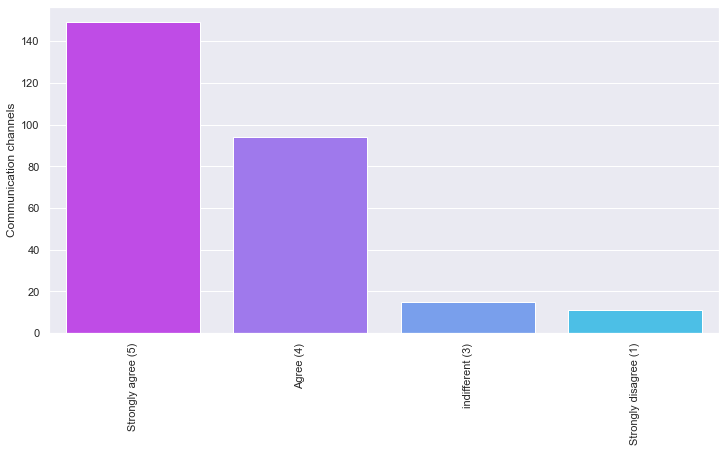

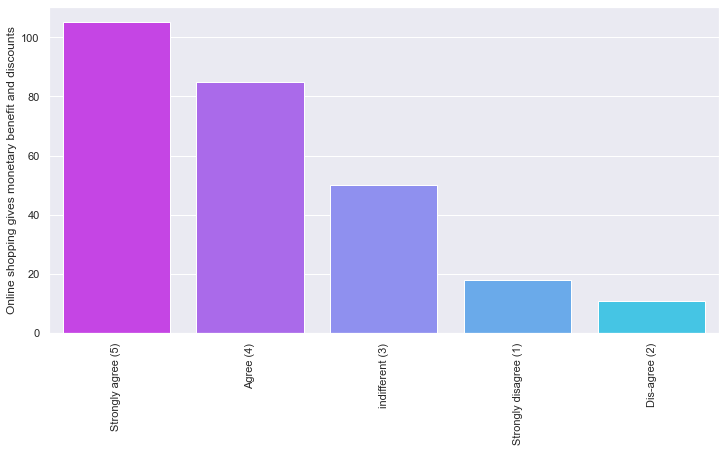

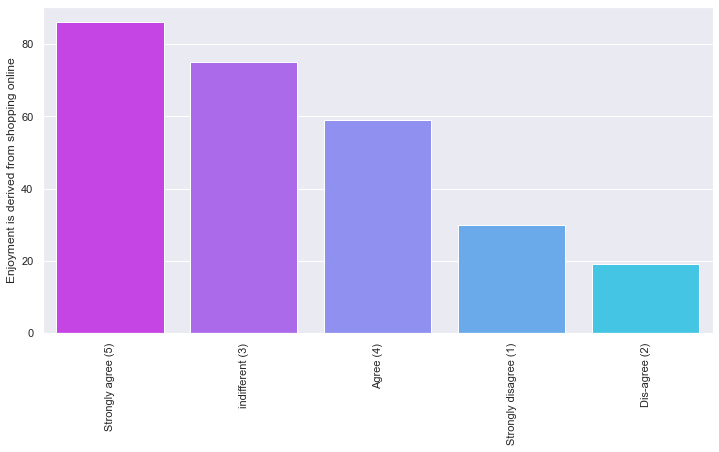

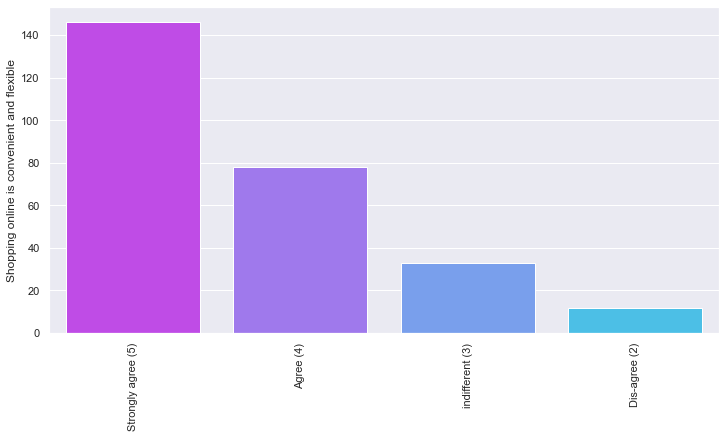

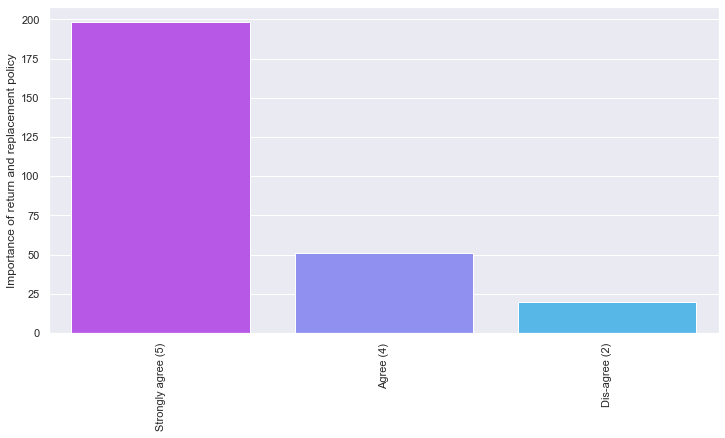

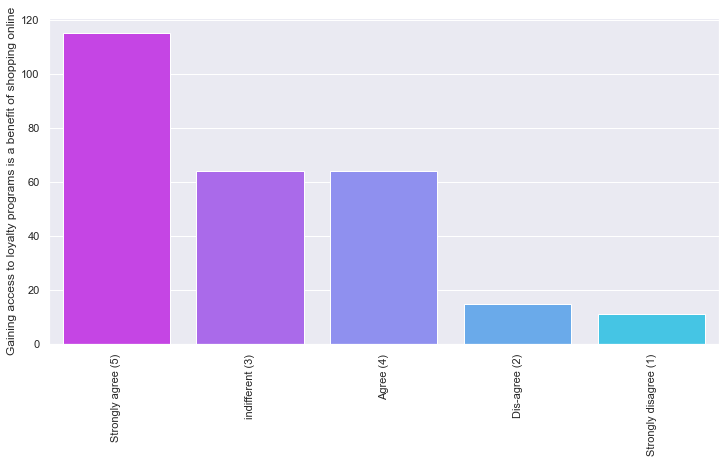

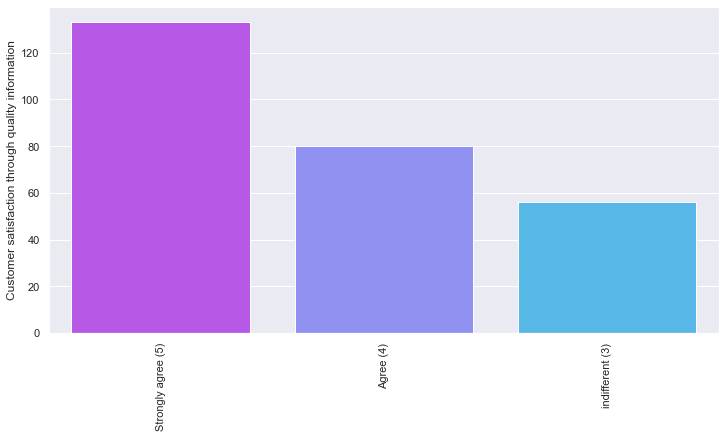

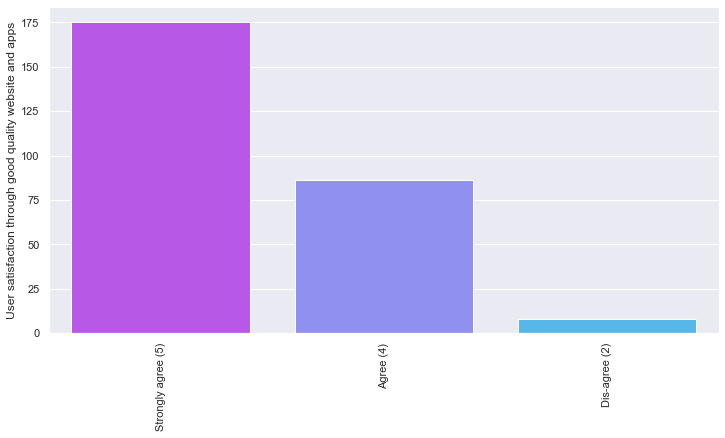

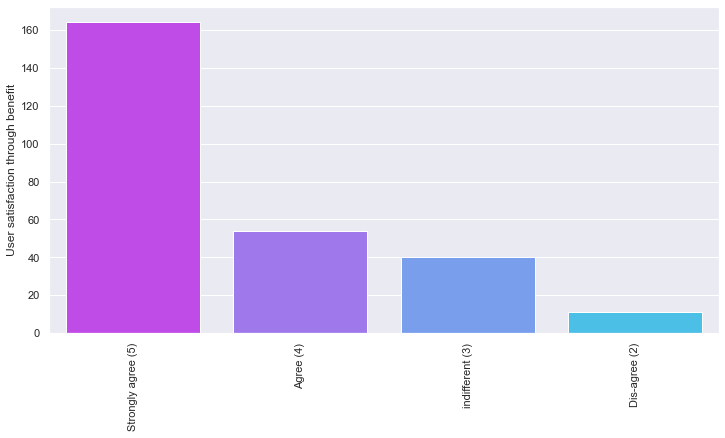

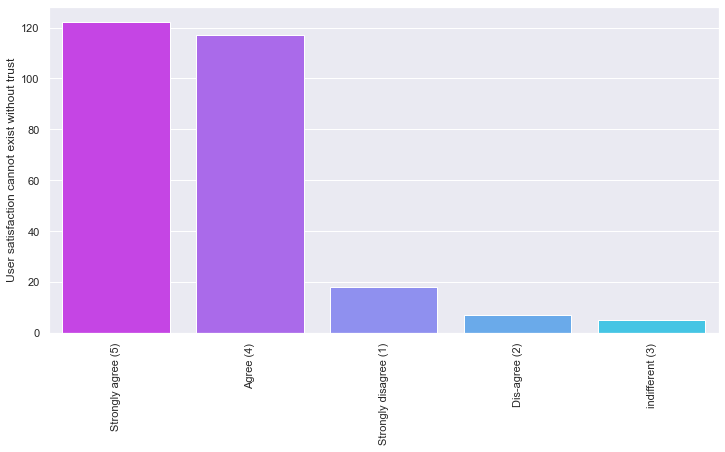

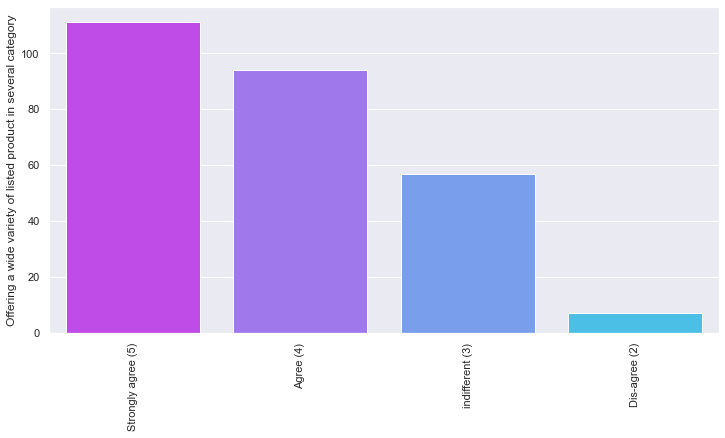

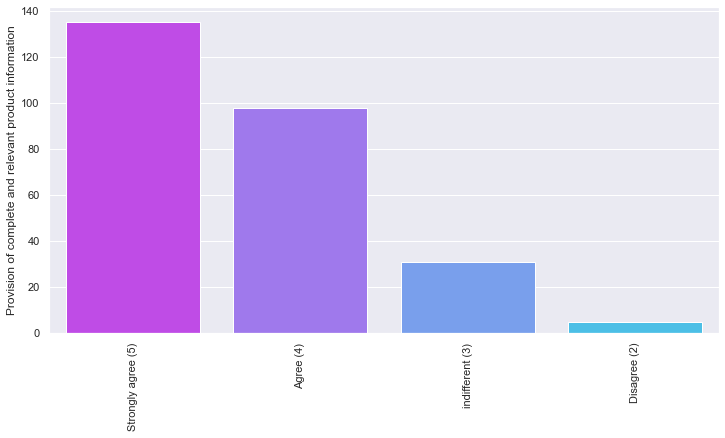

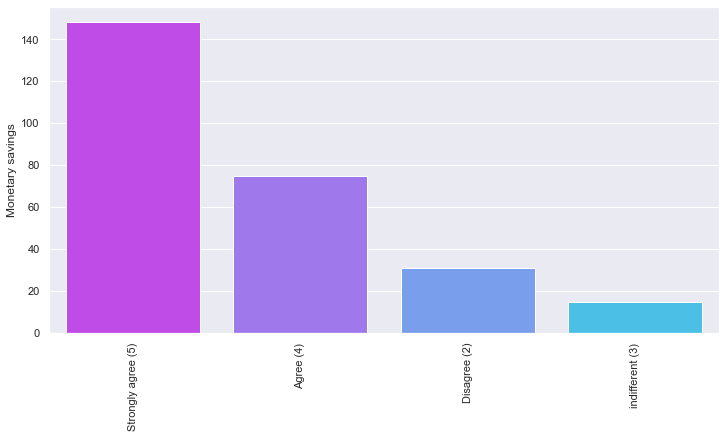

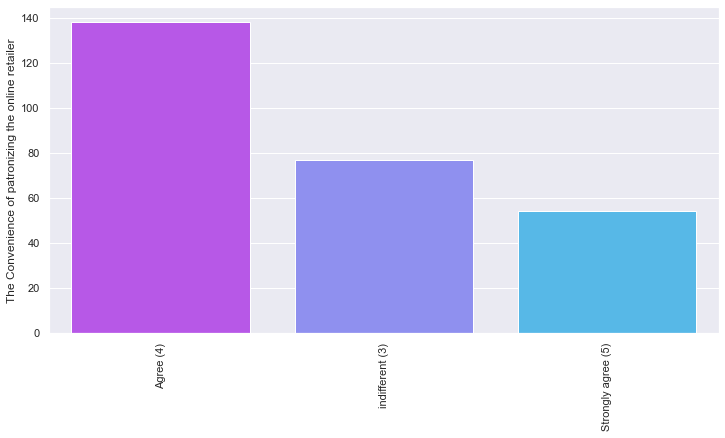

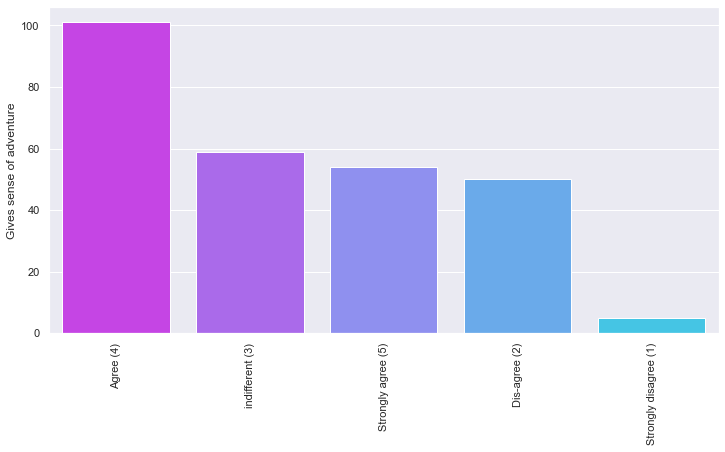

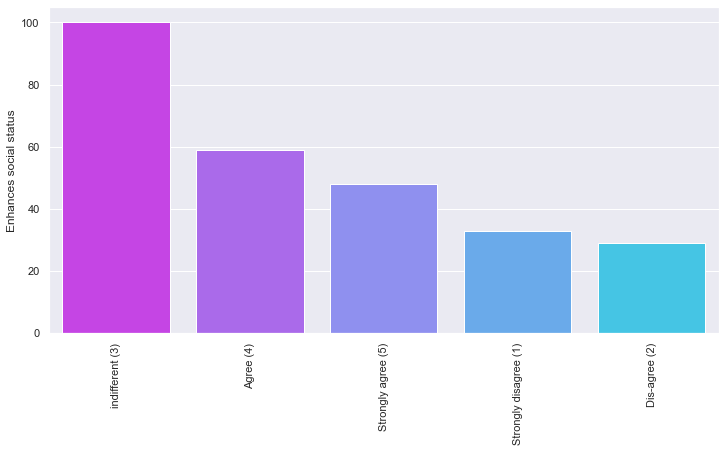

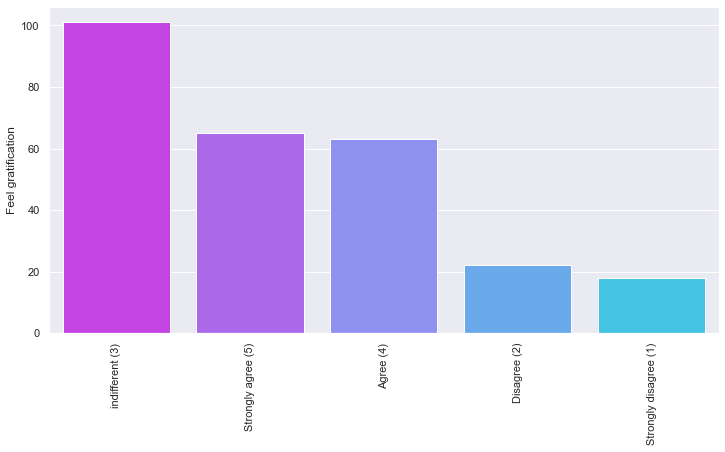

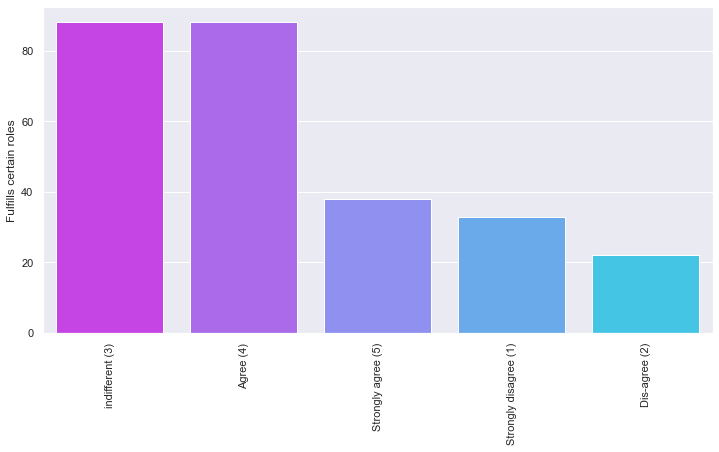

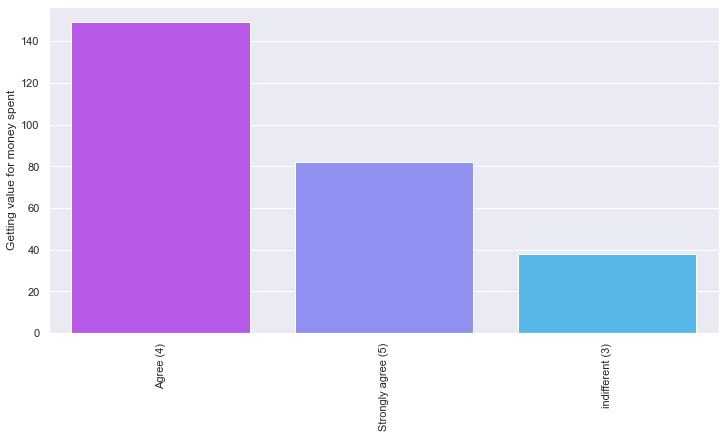

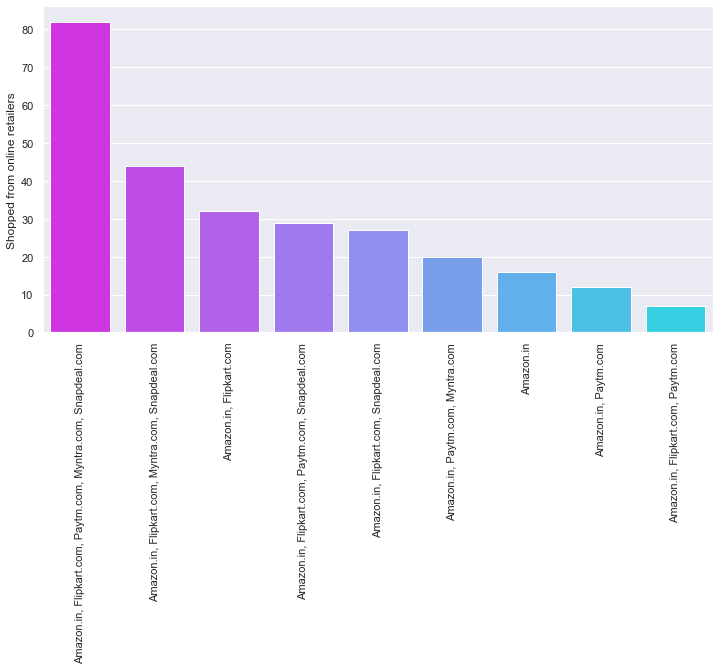

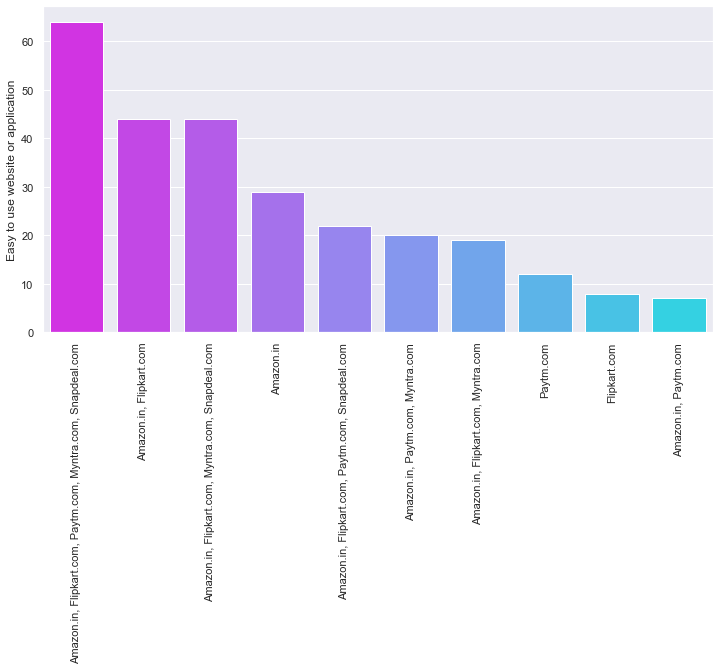

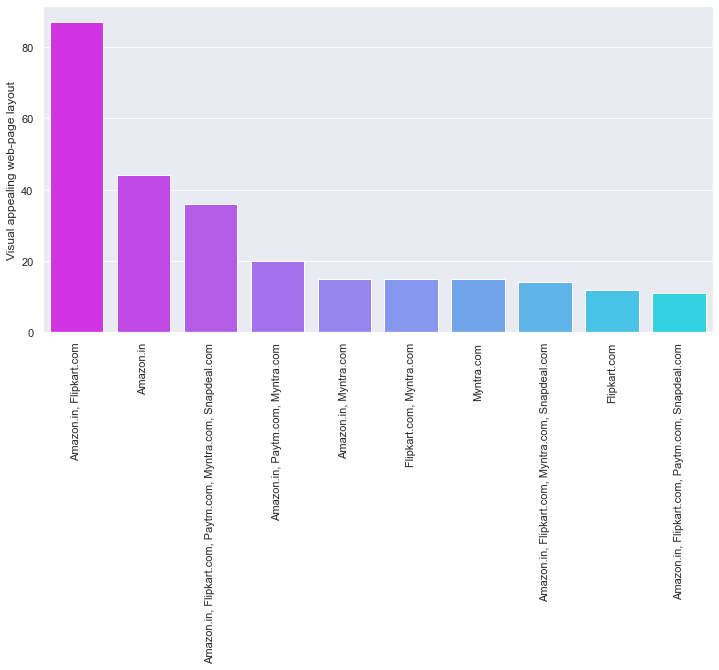

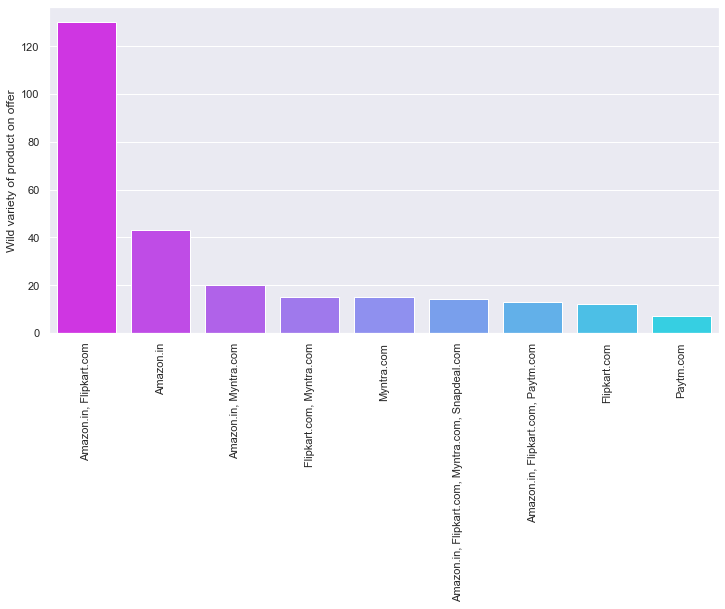

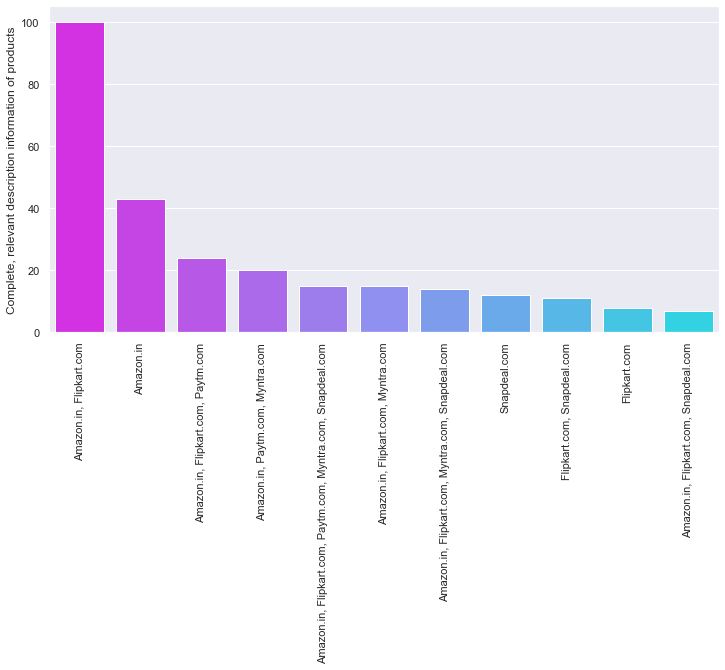

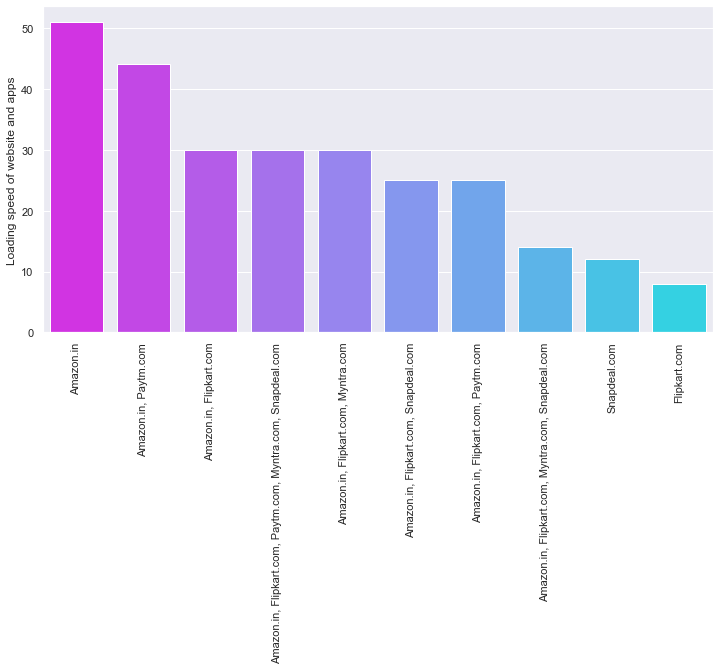

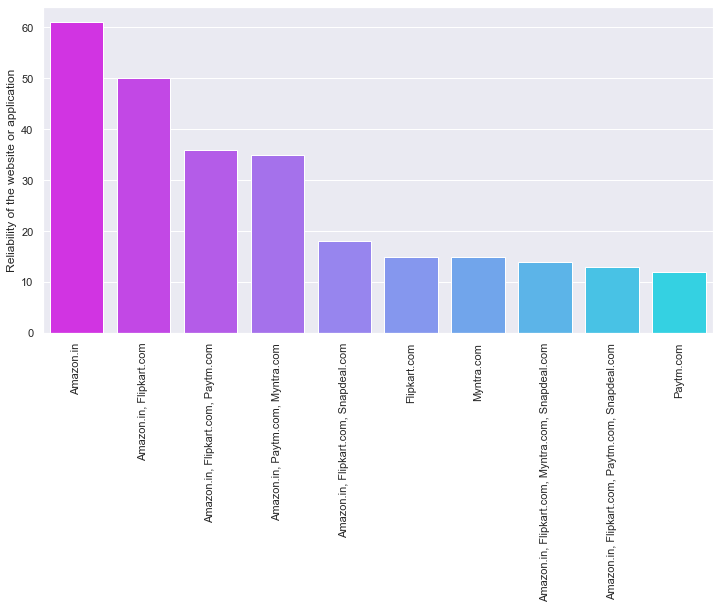

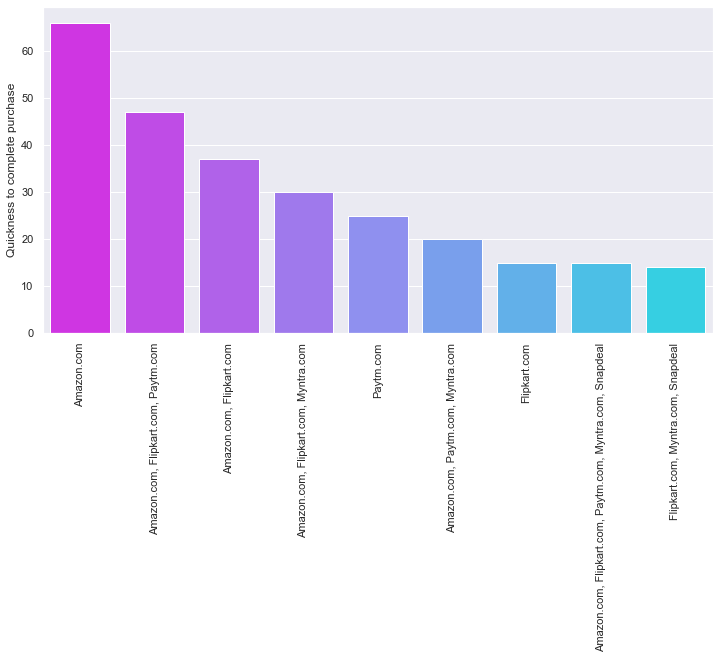

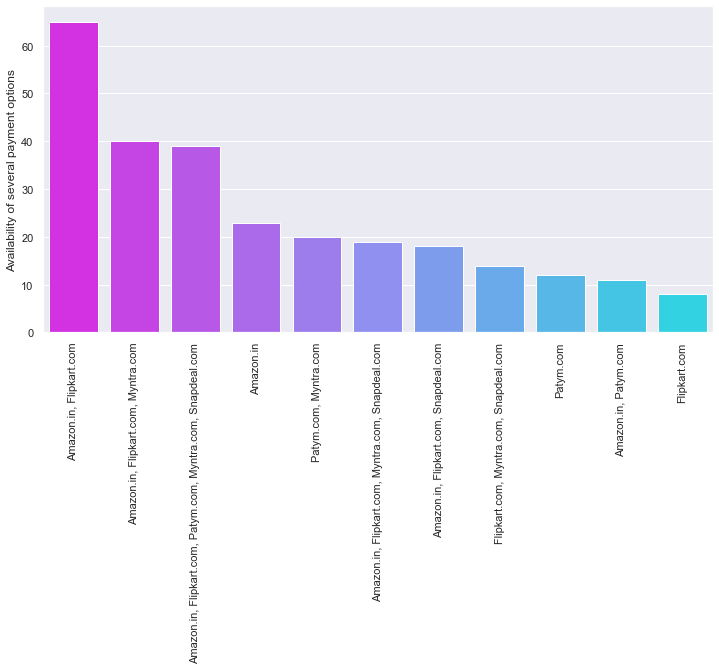

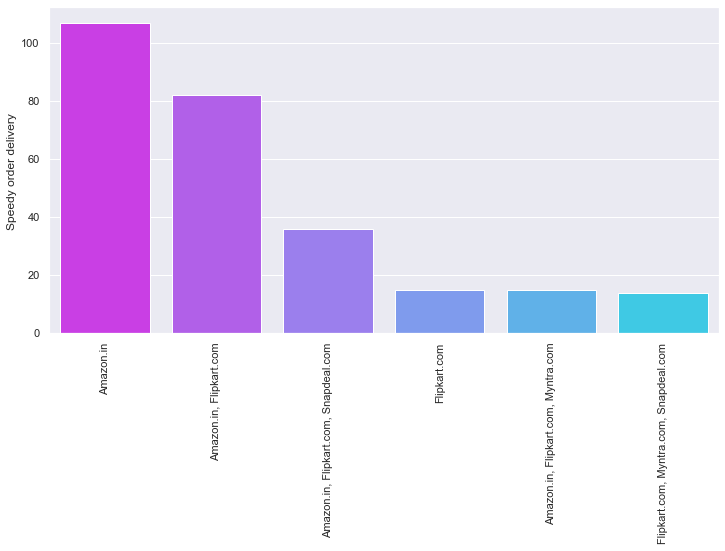

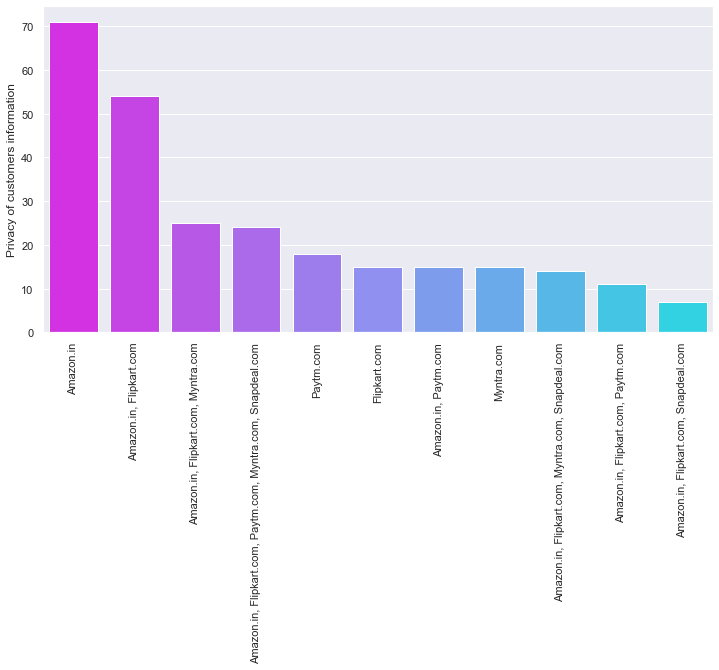

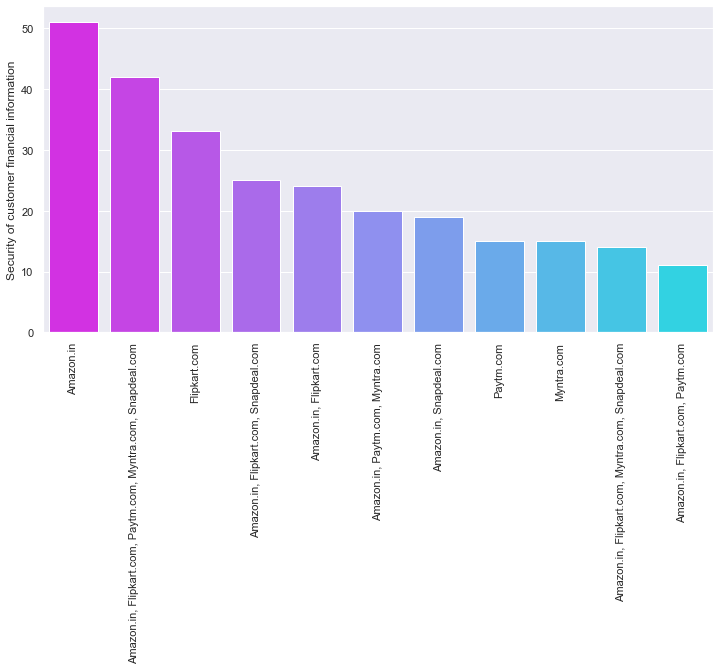

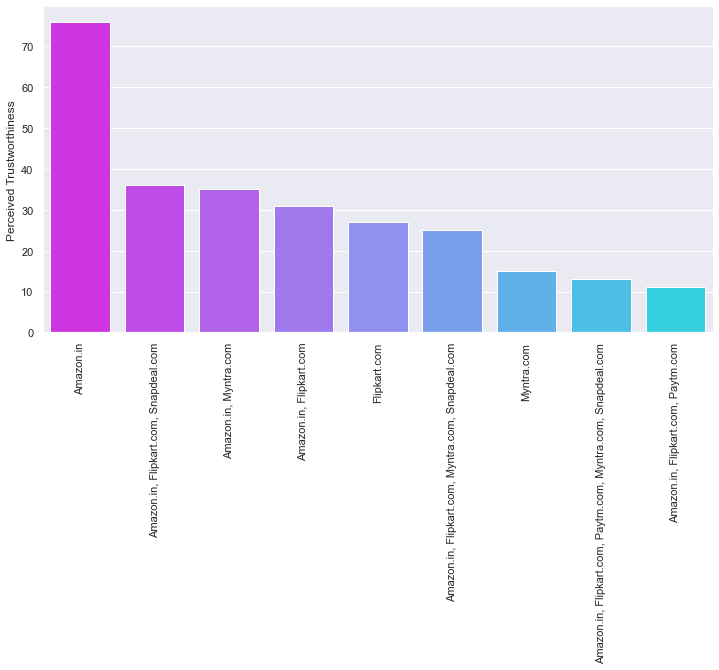

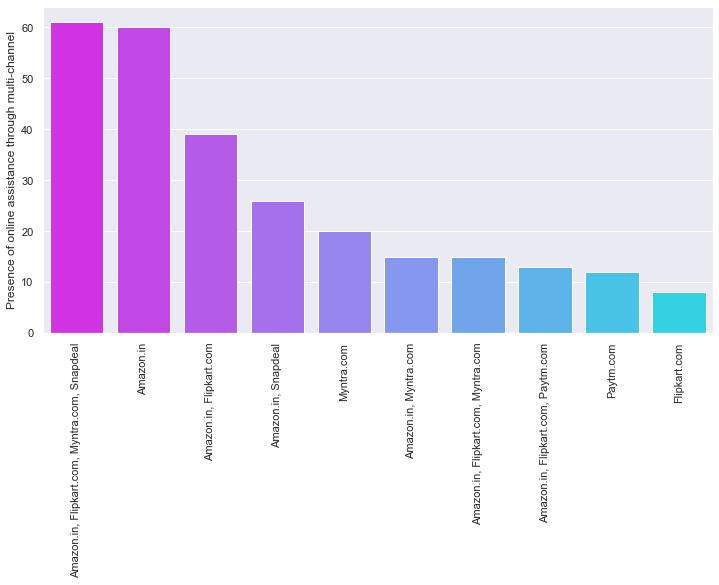

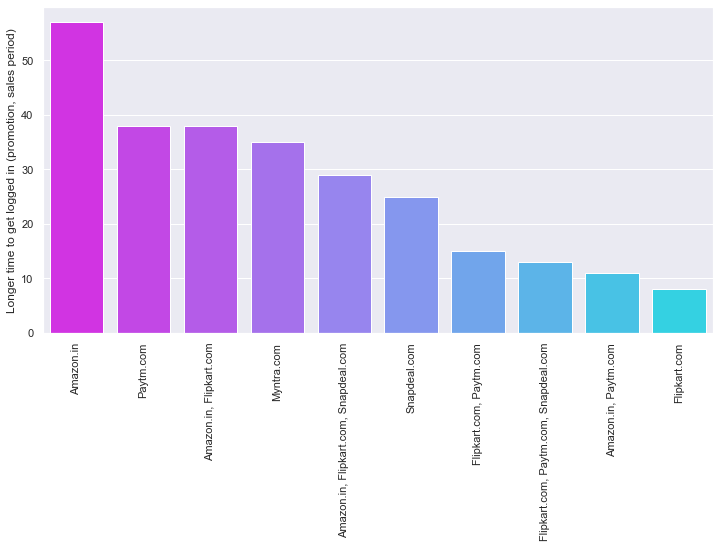

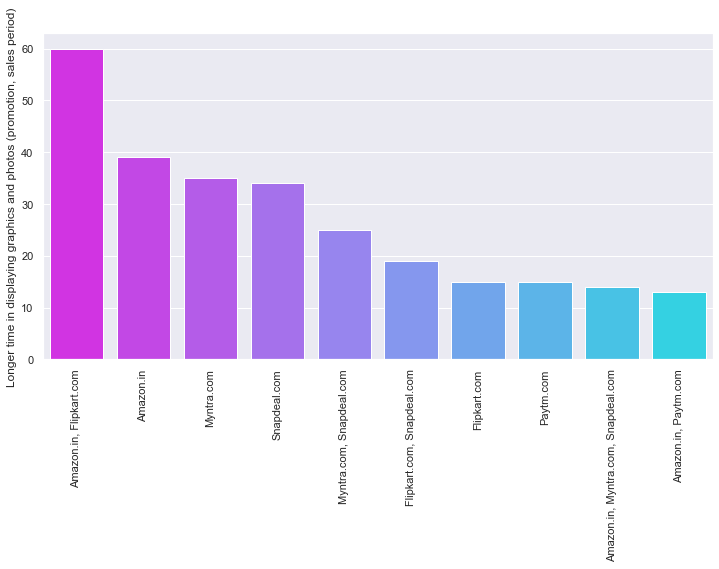

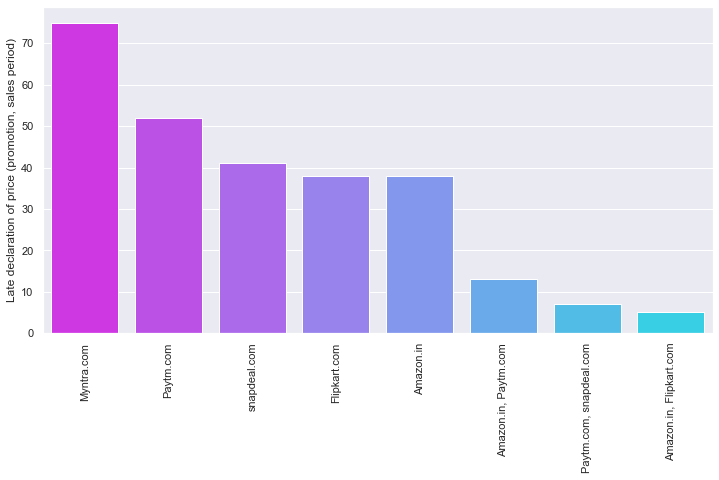

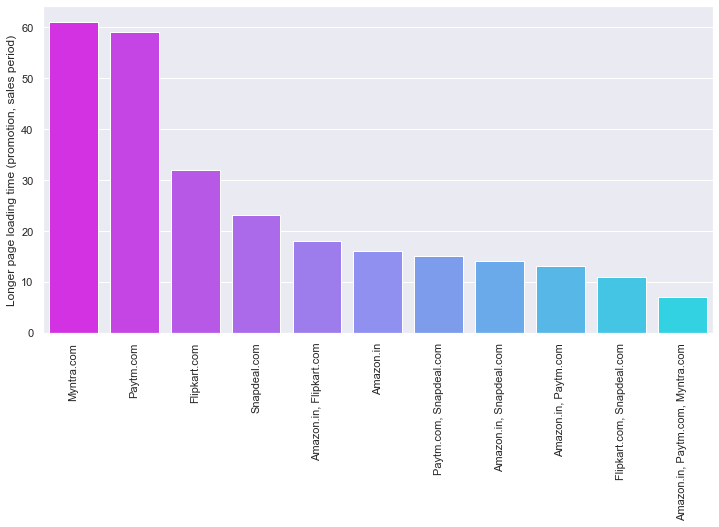

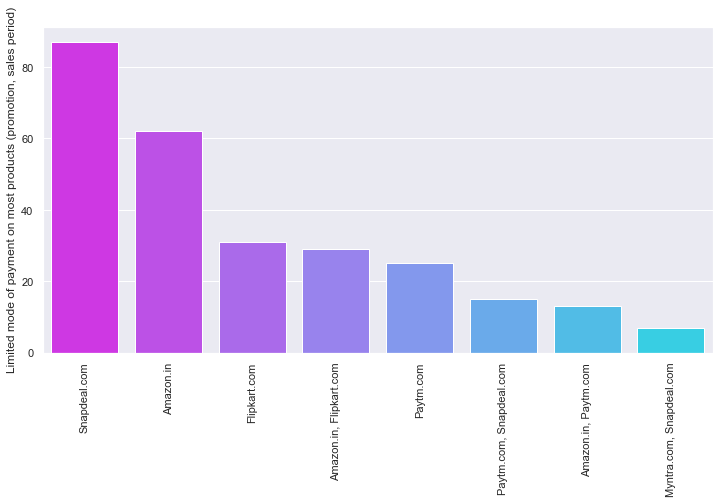

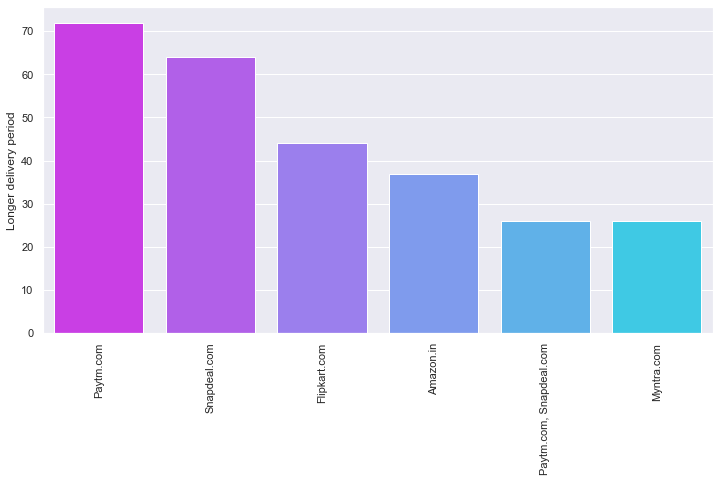

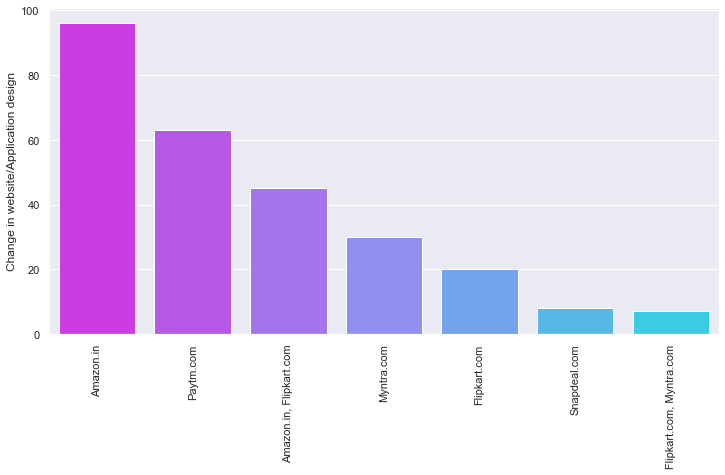

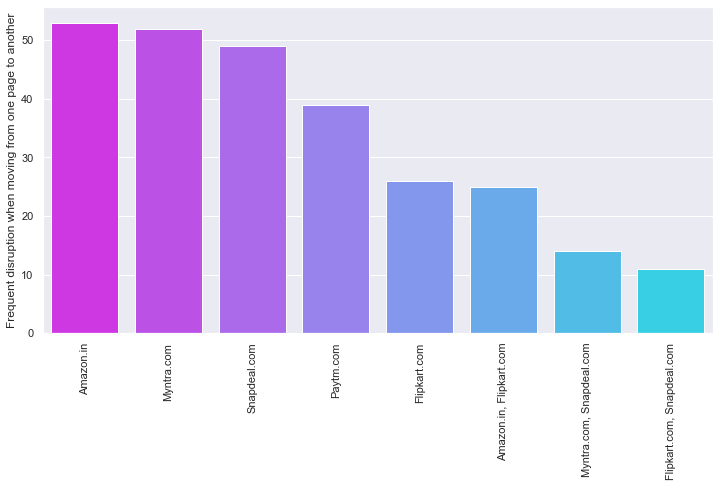

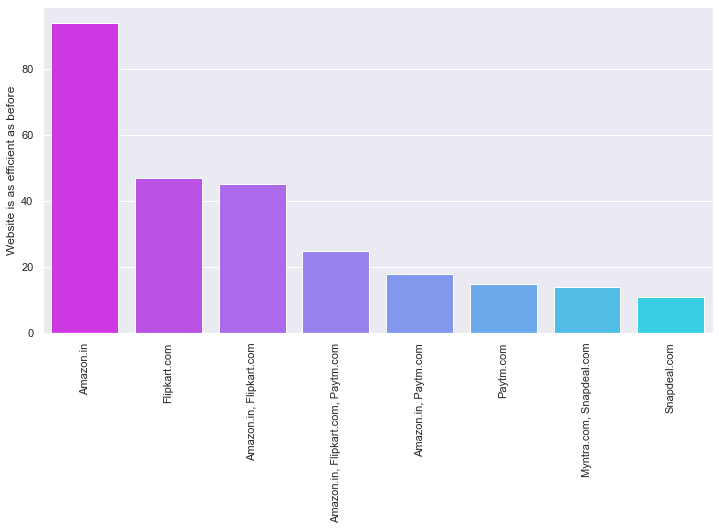

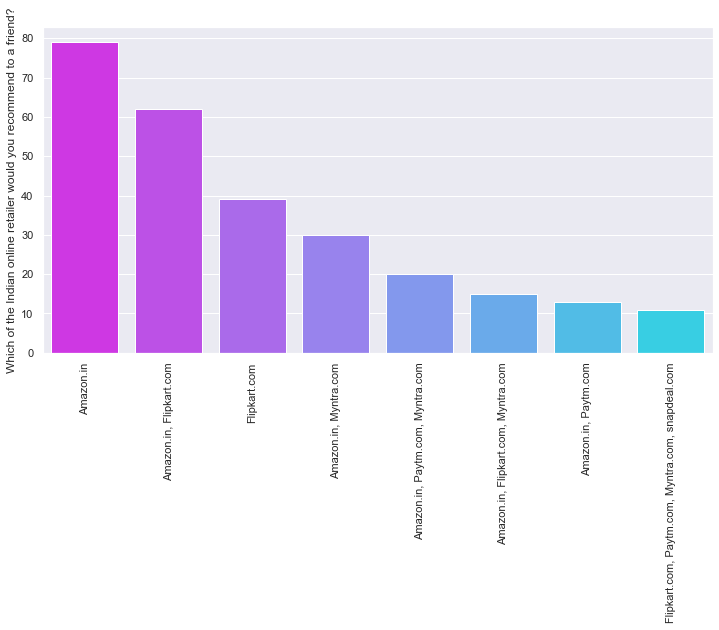

In [175]:
for i in df.columns:
    barplot(i)

## Method 2: To plot barplot of categorical & ordinal features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Bangalore '),
  Text(1, 0, 'Delhi'),
  Text(2, 0, 'Greater Noida'),
  Text(3, 0, 'Karnal '),
  Text(4, 0, 'Merrut'),
  Text(5, 0, 'Noida'),
  Text(6, 0, 'Solan'),
  Text(7, 0, 'Ghaziabad'),
  Text(8, 0, 'Gurgaon '),
  Text(9, 0, 'Bulandshahr'),
  Text(10, 0, 'Moradabad')])

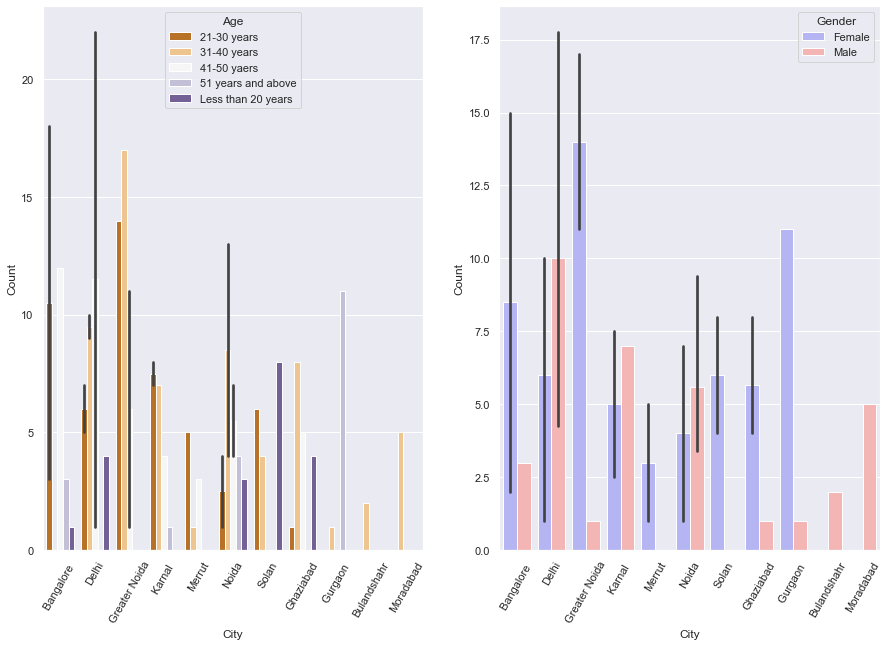

In [339]:
#created a groupby method to incure required feature and plot barpgraph of your choice
grouping1 = df.groupby(['Gender','Age','City']).size().reset_index().rename(columns={0:'Count'})

plt.subplot(121)
sns.barplot(x='City',y='Count',hue='Age',data=grouping1,palette='PuOr')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='City',y='Count',hue='Gender',data=grouping1,palette='bwr')
plt.xticks(rotation=60)

#### Insight:
    1. Noida have the distribution range of age of all group but male proportions are higher than female
    2. Bulandshahr & Mordabad consist of only females of age group 31-40yrs

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1-2 years'),
  Text(1, 0, '2-3 years'),
  Text(2, 0, '3-4 years'),
  Text(3, 0, 'Above 4 years'),
  Text(4, 0, 'Less than 1 year')])

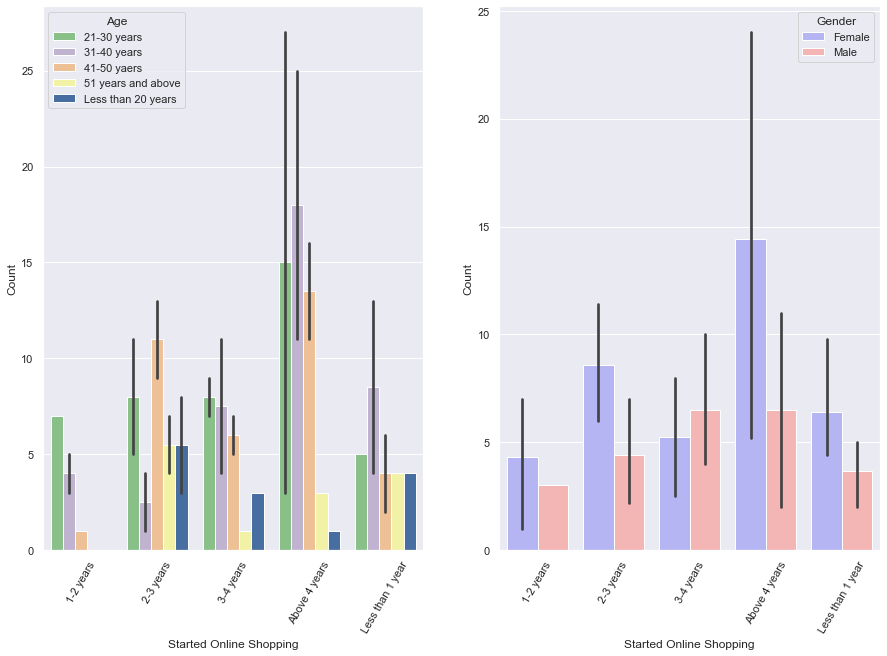

In [340]:
grouping2 = df.groupby(['Gender','Age','Started Online Shopping']).size().reset_index().rename(columns={0:'Count'})

plt.subplot(121)
sns.barplot(x='Started Online Shopping',y='Count',hue='Age',data=grouping2,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='Started Online Shopping',y='Count',hue='Gender',data=grouping2,palette='bwr')
plt.xticks(rotation=60)

(array([0, 1, 2]),
 [Text(0, 0, 'Mobile internet'), Text(1, 0, 'Wi-Fi'), Text(2, 0, 'Dial-up')])

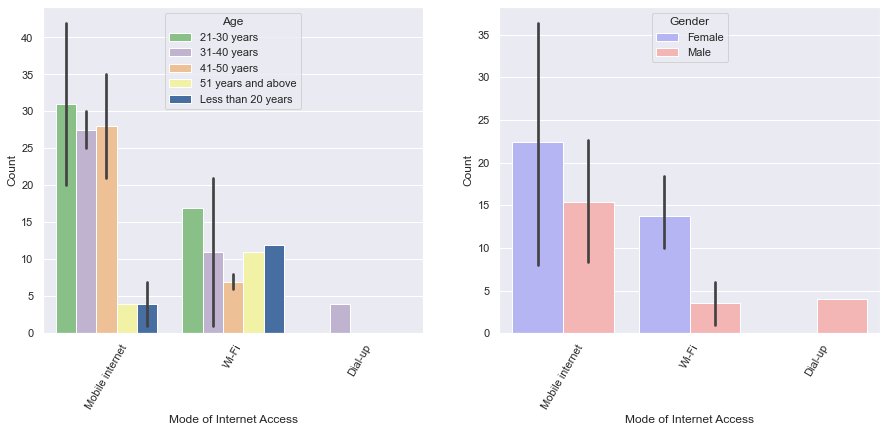

In [378]:
grouping3 = df.groupby(['Gender','Age','Mode of Internet Access']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(15,6)})

plt.subplot(121)
sns.barplot(x='Mode of Internet Access',y='Count',hue='Age',data=grouping3,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='Mode of Internet Access',y='Count',hue='Gender',data=grouping3,palette='bwr')
plt.xticks(rotation=60)

#### Insight:
    1. Mobile Internet is majorly used in the age group 21-50yrs
    2. Less than 5males in their 30's used Dial-up

(array([0, 1, 2]),
 [Text(0, 0, 'Android'),
  Text(1, 0, 'IOS/Mac'),
  Text(2, 0, 'Window/windows Mobile')])

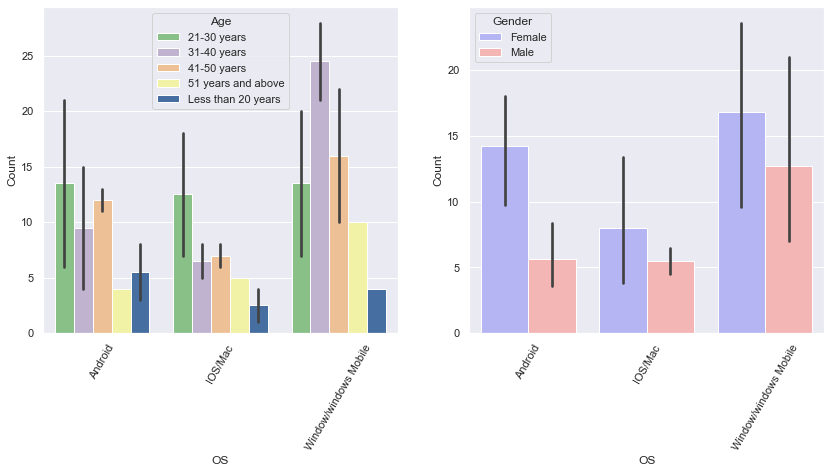

In [265]:
grouping4 = df.groupby(['Gender','Age','OS']).size().reset_index().rename(columns={0:'Count'})
plt.subplot(121)
sns.barplot(x='OS',y='Count',hue='Age',data=grouping4,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='OS',y='Count',hue='Gender',data=grouping4,palette='bwr')
plt.xticks(rotation=60)

#### Insights:
    1. 31-40yrs age correspondant are the highest user of windows/mobile OS in terms of shopping online
    2. 21-30, 41-50yrs groupers comes next which uses windows/mobile for online shopping.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Google chrome'),
  Text(1, 0, 'Opera'),
  Text(2, 0, 'Safari'),
  Text(3, 0, 'Mozilla Firefox')])

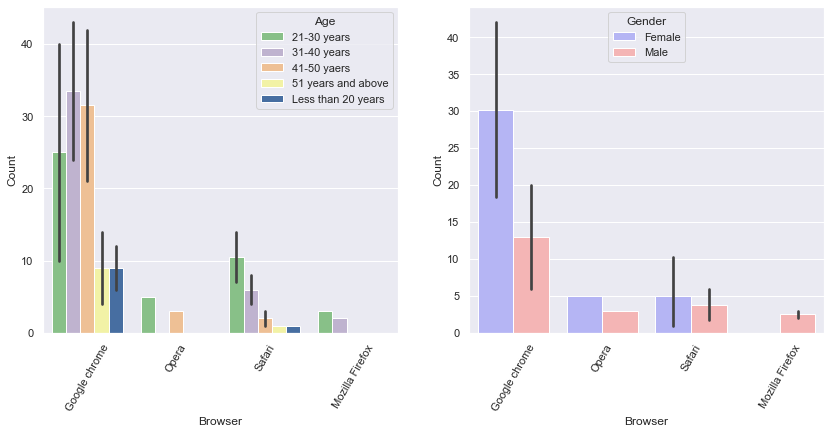

In [266]:
grouping5 = df.groupby(['Gender','Age','Browser']).size().reset_index().rename(columns={0:'Count'})
plt.subplot(121)
sns.barplot(x='Browser',y='Count',hue='Age',data=grouping5,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='Browser',y='Count',hue='Gender',data=grouping5,palette='bwr')
plt.xticks(rotation=60)

#### Insight:
    1. Females of age groupers 21-50yrs are observed more as using Google chrome for online shopping 

(array([0, 1, 2]),
 [Text(0, 0, 'Content Marketing'),
  Text(1, 0, 'Display Adverts'),
  Text(2, 0, 'Search Engine')])

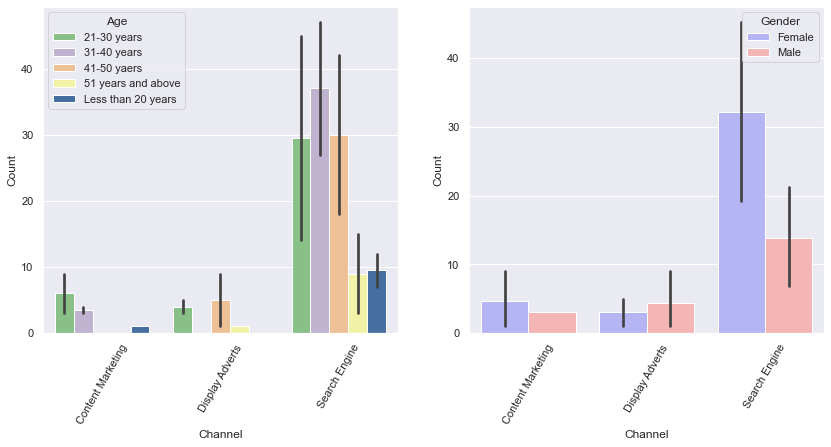

In [268]:
grouping6 = df.groupby(['Gender','Age','Channel']).size().reset_index().rename(columns={0:'Count'})
plt.subplot(121)
sns.barplot(x='Channel',y='Count',hue='Age',data=grouping6,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='Channel',y='Count',hue='Gender',data=grouping6,palette='bwr')
plt.xticks(rotation=60)

#### Customers are more are preferred to use Search engines for online shopping rather than content marketing and advert.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1-5 mins'),
  Text(1, 0, '11-15 mins'),
  Text(2, 0, '6-10 mins'),
  Text(3, 0, 'Less than 1 min'),
  Text(4, 0, 'more than 15 mins')])

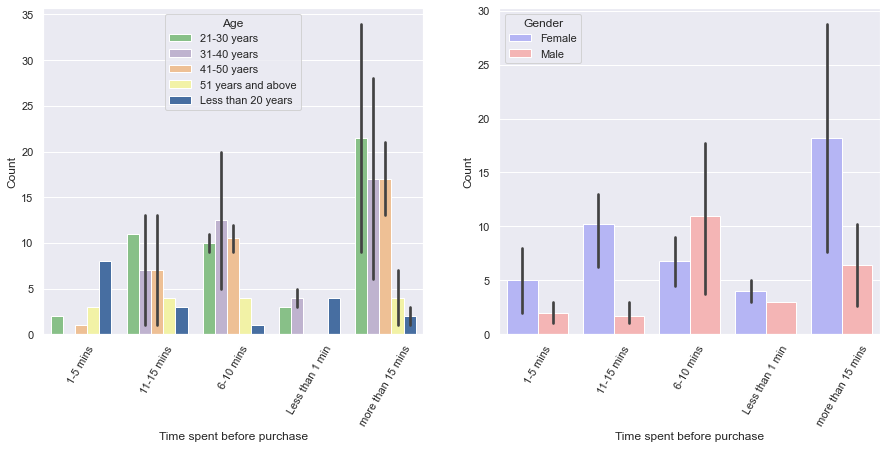

In [355]:
grouping7 = df.groupby(['Gender','Age','Time spent before purchase']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(15,6)})
plt.subplot(121)
sns.barplot(x='Time spent before purchase',y='Count',hue='Age',data=grouping7,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='Time spent before purchase',y='Count',hue='Gender',data=grouping7,palette='bwr')
plt.xticks(rotation=60)

#### Insight:
    1. More Females spent more than 15mins before purchasing while large proportion of males spend around 6-10mins
    2. There are also several customers who spend less than one minute before purchasing producct.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Bangalore '),
  Text(1, 0, 'Karnal '),
  Text(2, 0, 'Merrut'),
  Text(3, 0, 'Solan'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Greater Noida'),
  Text(6, 0, 'Noida'),
  Text(7, 0, 'Ghaziabad'),
  Text(8, 0, 'Gurgaon '),
  Text(9, 0, 'Bulandshahr'),
  Text(10, 0, 'Moradabad')])

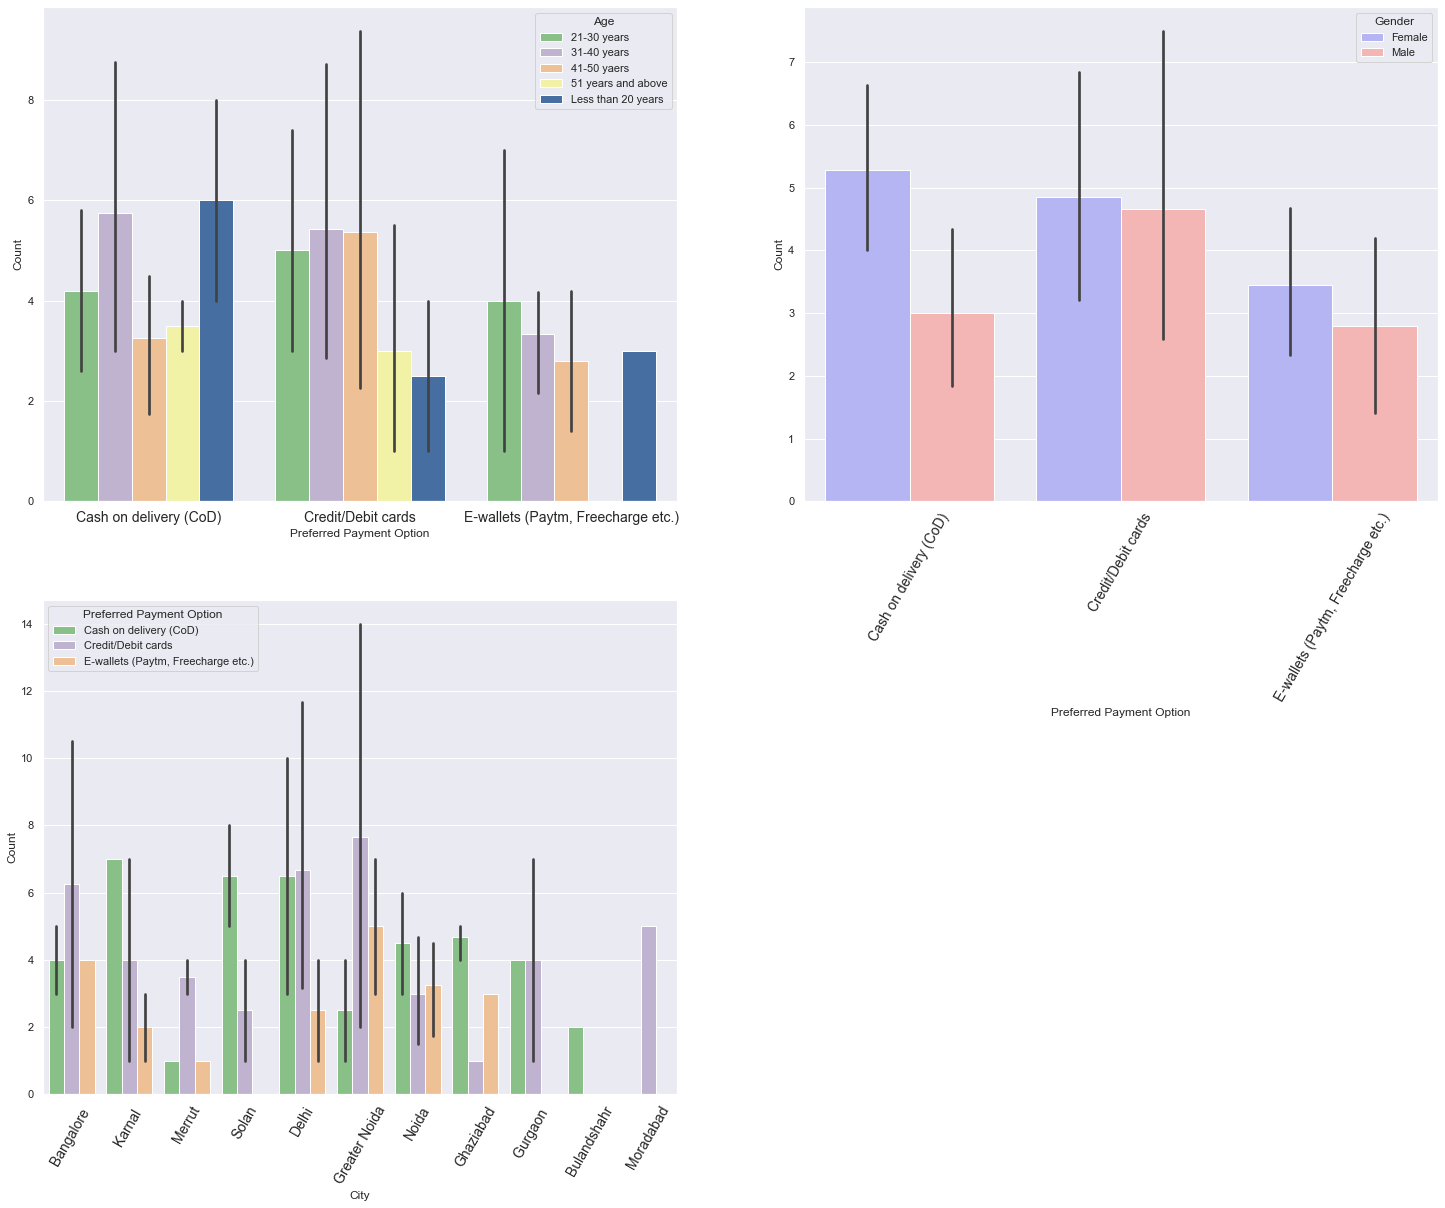

In [367]:
grouping8 = df.groupby(['Gender','Age','Preferred Payment Option','City']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(25,20)})
plt.subplot(221)
sns.barplot(x='Preferred Payment Option',y='Count',hue='Age',data=grouping8,palette='Accent')
plt.xticks(rotation=0, fontsize=14)
plt.subplot(222)
sns.barplot(x='Preferred Payment Option',y='Count',hue='Gender',data=grouping8,palette='bwr')
plt.xticks(rotation=60,fontsize=14)
plt.subplot(223)
sns.barplot(x='City',y='Count',hue='Preferred Payment Option',data=grouping8,palette='Accent')
plt.xticks(rotation=60,fontsize=14)

#### Observation:
    1. People greater than 51yrs do not use E-wallets.
    2. Females of age between 21-50 prefer to use Credit/Debit cards than their male counterparts
    3. People of age<20yrs tend to use CoD paymeny option more than other options
    4. Delhi has equal preference of card and CoD, while customers from Solan, Bulandshahr & Moradabad does not prefer E-wallets.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Direct URL'),
  Text(1, 0, 'E-mail'),
  Text(2, 0, 'Search Engine'),
  Text(3, 0, 'Social Media'),
  Text(4, 0, 'Via application')])

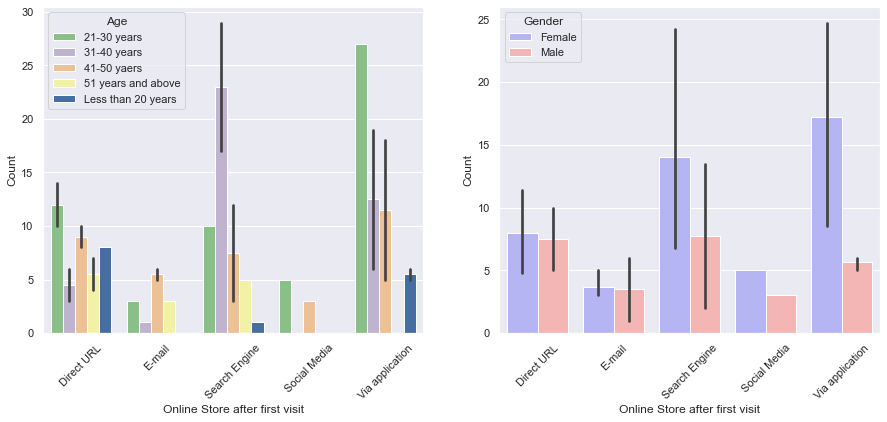

In [368]:
grouping9 = df.groupby(['Gender','Age','Online Store after first visit']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(15,6)})
plt.subplot(121)
sns.barplot(x='Online Store after first visit',y='Count',hue='Age',data=grouping9,palette='Accent')
plt.xticks(rotation=45)
plt.subplot(122)
sns.barplot(x='Online Store after first visit',y='Count',hue='Gender',data=grouping9,palette='bwr')
plt.xticks(rotation=45)

#### Observation:
    1. Social media & E-mail is least used medium to visit online store after first visit
    2. Application is mostly used to visit online store and majorly by age group of 21-30yrs.
    3. People of age group 31-40yrs mostly use search engine to visit online store.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Strongly disagree (1)'),
  Text(3, 0, 'Indifferent (3)')])

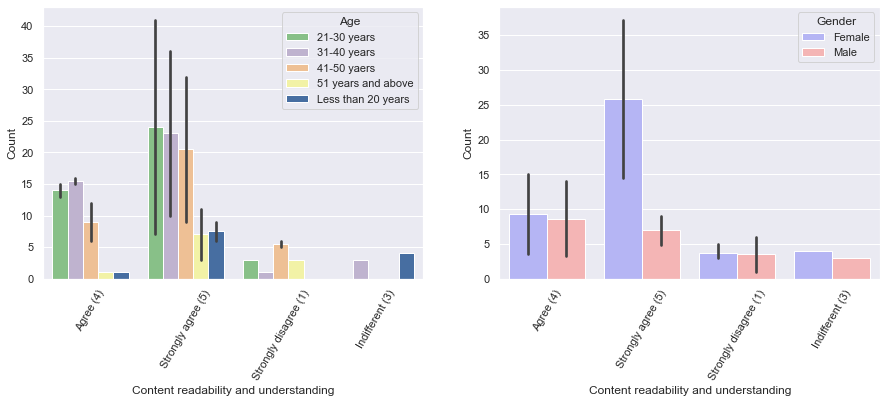

In [370]:
grouping13 = df.groupby(['Gender','Age','Content readability and understanding']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(121)
sns.barplot(x='Content readability and understanding',y='Count',hue='Age',data=grouping13,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(122)
sns.barplot(x='Content readability and understanding',y='Count',hue='Gender',data=grouping13,palette='bwr')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Better alternative offer'),
  Text(1, 0, 'Change in price'),
  Text(2, 0, 'Lack of trust'),
  Text(3, 0, 'No preferred mode of payment'),
  Text(4, 0, 'Promo code not applicable')])

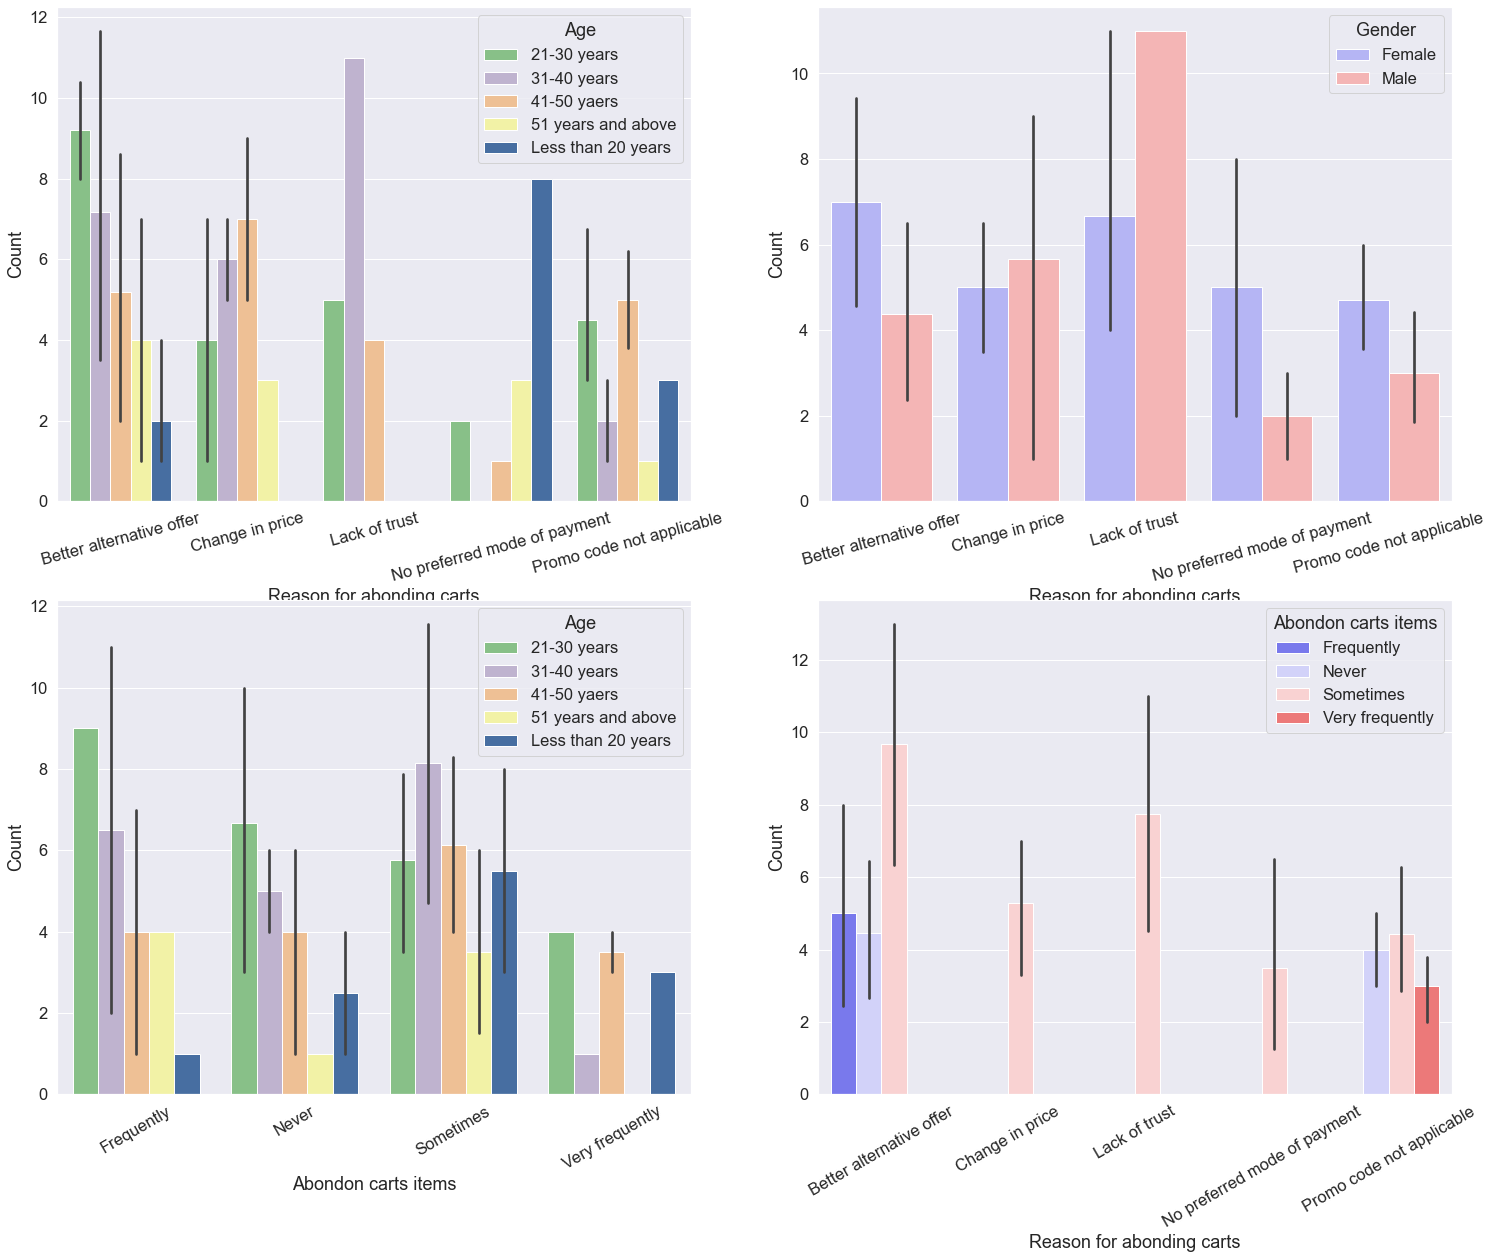

In [377]:
grouping14 = df.groupby(['Gender','Age','Reason for abonding carts','Abondon carts items']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(25,20)}, font_scale = 1.5)
plt.subplot(221)
sns.barplot(x='Reason for abonding carts',y='Count',hue='Age',data=grouping14,palette='Accent')
plt.xticks(rotation=15)
plt.subplot(222)
sns.barplot(x='Reason for abonding carts',y='Count',hue='Gender',data=grouping14,palette='bwr')
plt.xticks(rotation=15)
plt.subplot(223)
sns.barplot(x='Abondon carts items',y='Count',hue='Age',data=grouping14,palette='Accent')
plt.xticks(rotation=30)
plt.subplot(224)
sns.barplot(x='Reason for abonding carts',y='Count',hue='Abondon carts items',data=grouping14,palette='bwr')
plt.xticks(rotation=30)

#### Insights:
    1. Males of 31-40yrs are persist to abandon cart due to lack of trust, while males of age<20 & >51yrs dont believe so
    2. Having better alternative offer is also one of the reason to abdon cart
    3. There are also people of age<20yrs tend to abandon carts because there is no preferred mode of payment available.
    4. Customers of age 21-30yrs frequently abandon cart items

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Amazon.in, Flipkart.com'),
  Text(2, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(8, 0, 'Flipkart.com'),
  Text(9, 0, 'Flipkart.com, Snapdeal.com'),
  Text(10, 0, 'Snapdeal.com')])

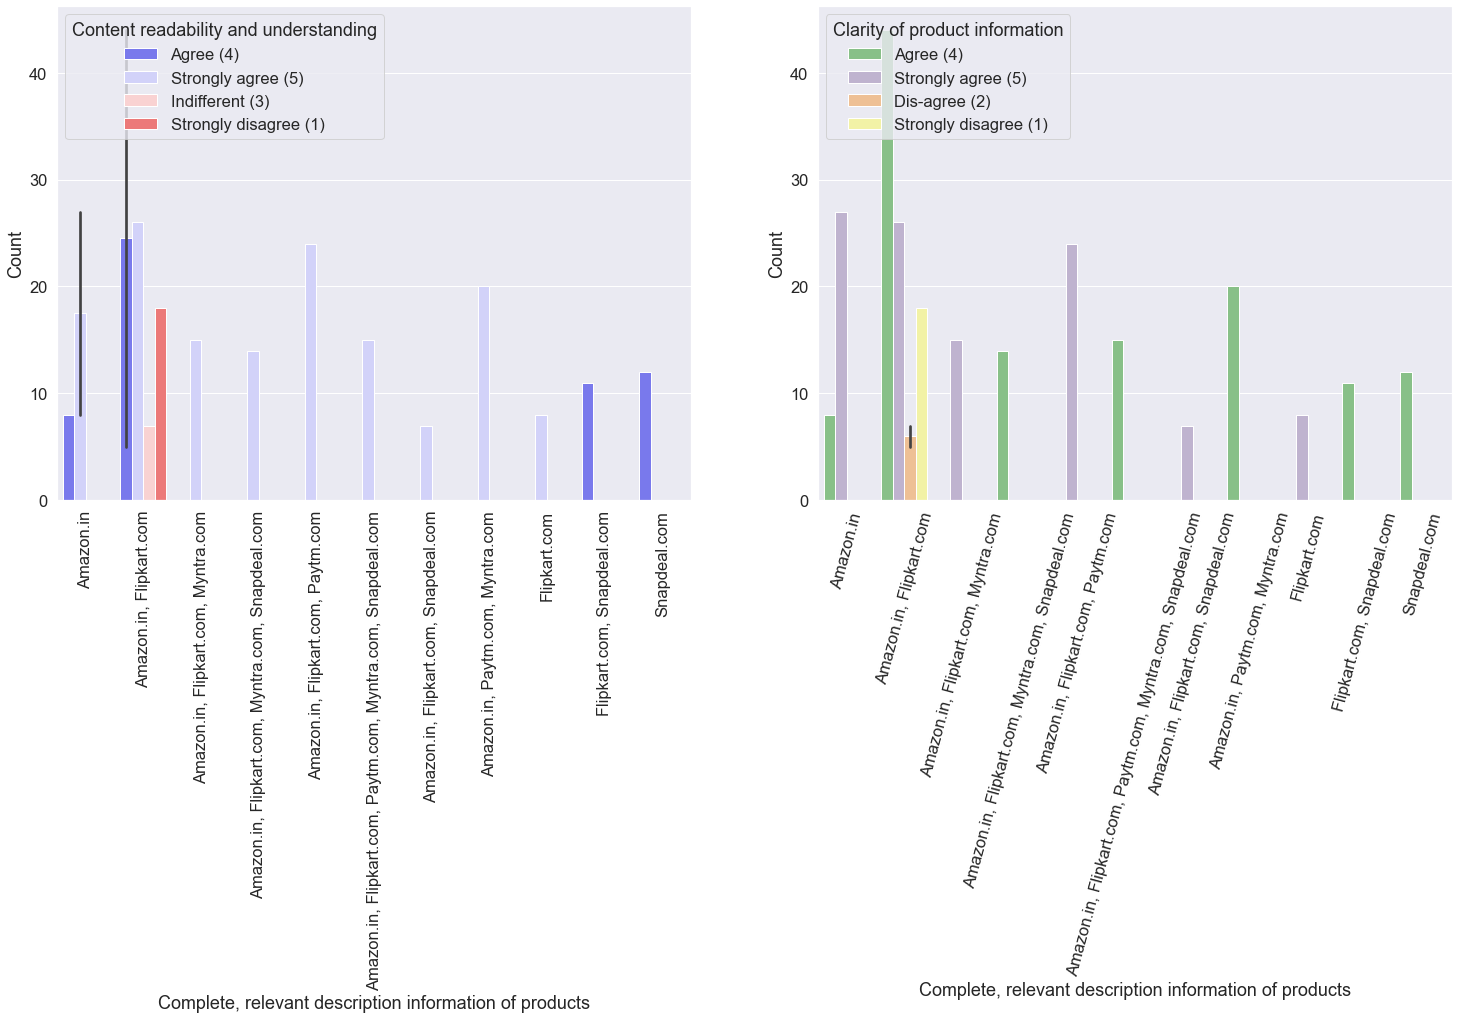

In [388]:
grouping15 = df.groupby(['Complete, relevant description information of products','Clarity of product information',
                         'Content readability and understanding']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(25,20)}, font_scale=1.5)
plt.subplot(221)
sns.barplot(x='Complete, relevant description information of products',y='Count',hue='Content readability and understanding',data=grouping15,palette='bwr')
plt.xticks(rotation=90)
plt.subplot(222)
sns.barplot(x='Complete, relevant description information of products',y='Count',hue='Clarity of product information',data=grouping15,palette='Accent')
plt.xticks(rotation=75)

### Insights:
    1. There are certain customer who strongly disagree that complete, relevant description of product in Amazon,Fipkart is displayed. Rest of them agrees that there is complete and relevant info of products.
    2. There are also certain people that tends to disagree on clarity on product info in amazon and flipkart

(array([0, 1, 2]),
 [Text(0, 0, 'Dis-agree (2)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)')])

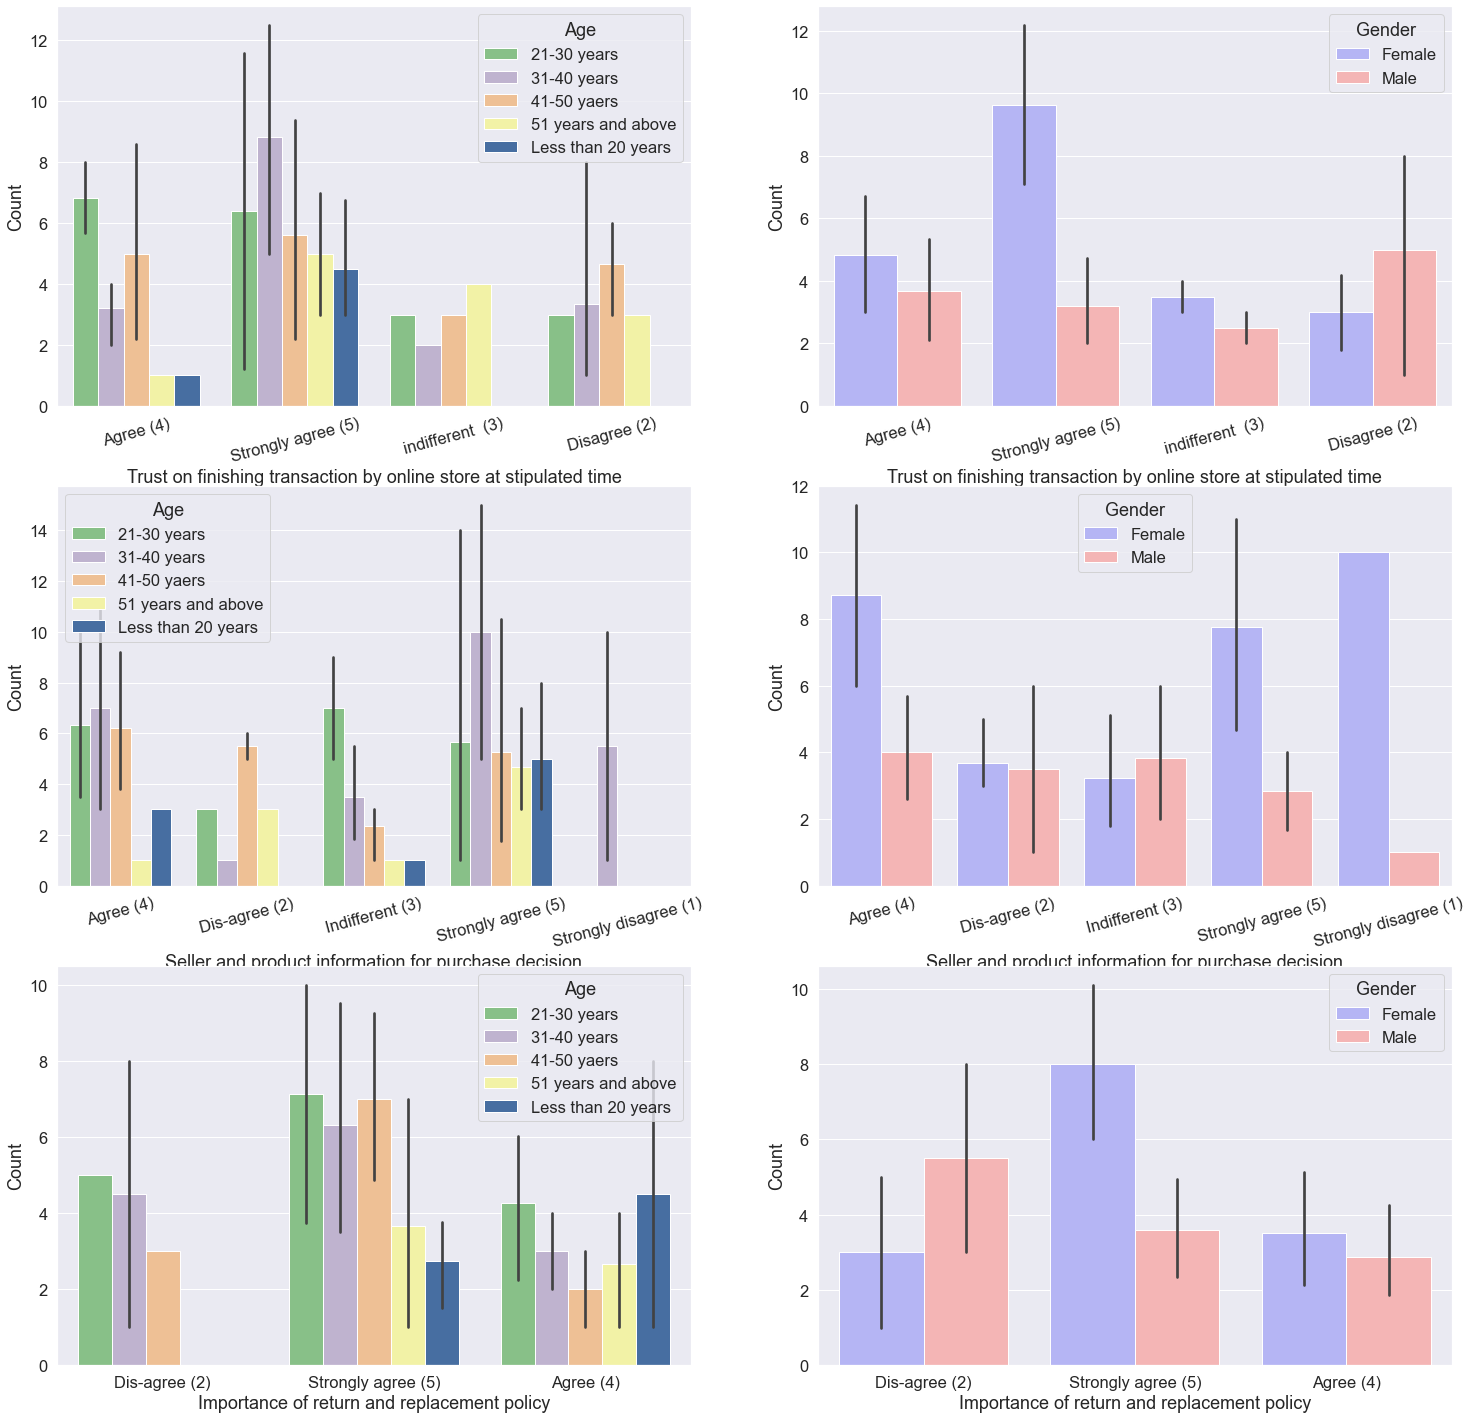

In [397]:
grouping17 = df.groupby(['Seller and product information for purchase decision','Age', 'Gender',
                         'Trust on finishing transaction by online store at stipulated time',
                         'Importance of return and replacement policy']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(25,25)}, font_scale=1.5)
plt.subplot(321)
sns.barplot(x='Trust on finishing transaction by online store at stipulated time',y='Count',hue='Age',data=grouping17,palette='Accent')
plt.xticks(rotation=15)
plt.subplot(322)
sns.barplot(x='Trust on finishing transaction by online store at stipulated time',y='Count',hue='Gender',data=grouping17,palette='bwr')
plt.xticks(rotation=15)
plt.subplot(323)
sns.barplot(x='Seller and product information for purchase decision',y='Count',hue='Age',data=grouping17,palette='Accent')
plt.xticks(rotation=15)
plt.subplot(324)
sns.barplot(x='Seller and product information for purchase decision',y='Count',hue='Gender',data=grouping17,palette='bwr')
plt.xticks(rotation=15)
plt.subplot(325)
sns.barplot(x='Importance of return and replacement policy',y='Count',hue='Age',data=grouping17,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(326)
sns.barplot(x='Importance of return and replacement policy',y='Count',hue='Gender',data=grouping17,palette='bwr')
plt.xticks(rotation=0)

#### Observation:
    1. More proportion of male disagree on putting their trust to finish transaction by online store in stipulated time. While females strongly agrees on putting trust to finish transaction by online store.
    2. Certain females of age group 31-40yrs disagree that sellers and product information for purchase decision is necessary.
    3. Most of the people agree that importance of return and replacement policy should exist. For disagreeing to this matter, male proportion is higher than their female counterparts

(array([0, 1, 2]),
 [Text(0, 0, 'Cash on delivery (CoD)'),
  Text(1, 0, 'Credit/Debit cards'),
  Text(2, 0, 'E-wallets (Paytm, Freecharge etc.)')])

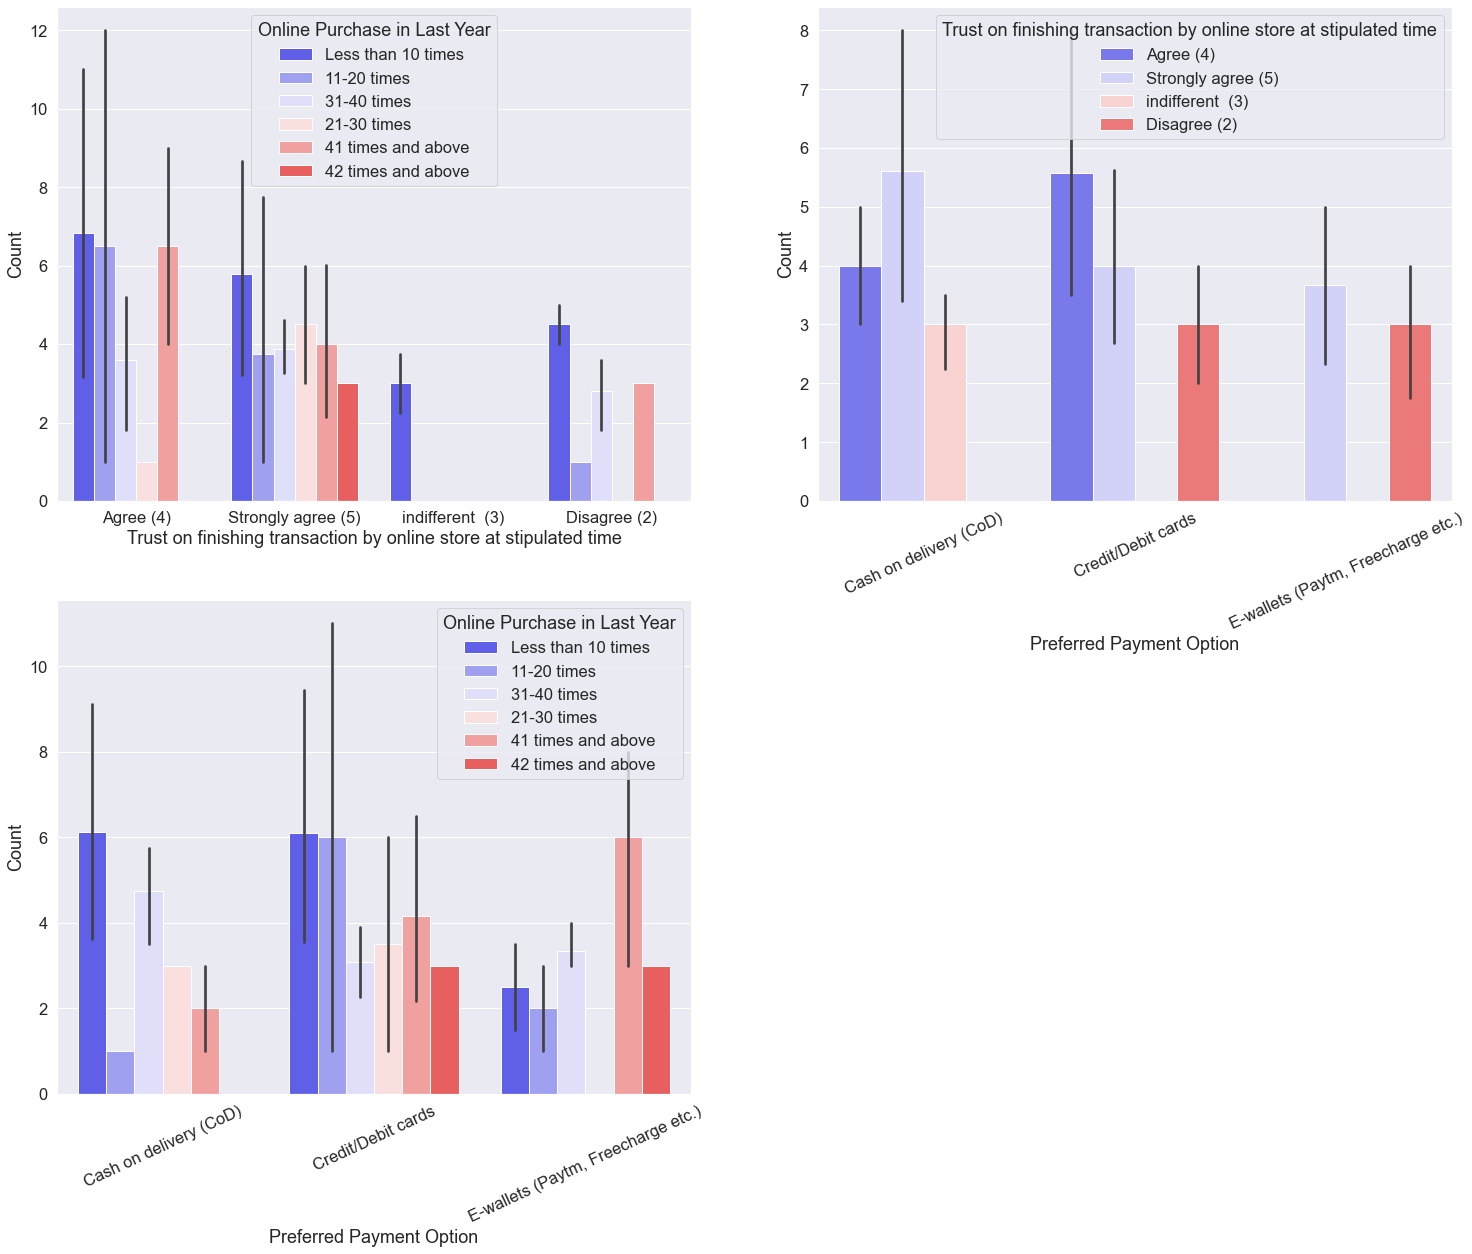

In [402]:
grouping18 = df.groupby(['Preferred Payment Option','Age',
                         'Trust on finishing transaction by online store at stipulated time',
                         'Online Purchase in Last Year']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(25,20)}, font_scale = 1.5)
plt.subplot(221)
sns.barplot(x='Trust on finishing transaction by online store at stipulated time',y='Count',hue='Online Purchase in Last Year',data=grouping18,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(222)
sns.barplot(x='Preferred Payment Option',y='Count',hue='Trust on finishing transaction by online store at stipulated time',data=grouping18,palette='bwr')
plt.xticks(rotation=25)
plt.subplot(223)
sns.barplot(x='Preferred Payment Option',y='Count',hue='Online Purchase in Last Year',data=grouping18,palette='bwr')
plt.xticks(rotation=25)

#### Observations:
    1. Even when some disagree on finishing transaction in time, they purchased more than 41times.
    2. There exist some people who disagree in finishing the transaction in time through Credit cards and E-wallets
    3. People using E-wallets have purchased more than 41times in last year compared to ones paying through CoD and cards.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Bangalore '),
  Text(1, 0, 'Bulandshahr'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Ghaziabad'),
  Text(4, 0, 'Greater Noida'),
  Text(5, 0, 'Gurgaon '),
  Text(6, 0, 'Karnal '),
  Text(7, 0, 'Merrut'),
  Text(8, 0, 'Moradabad'),
  Text(9, 0, 'Noida'),
  Text(10, 0, 'Solan')])

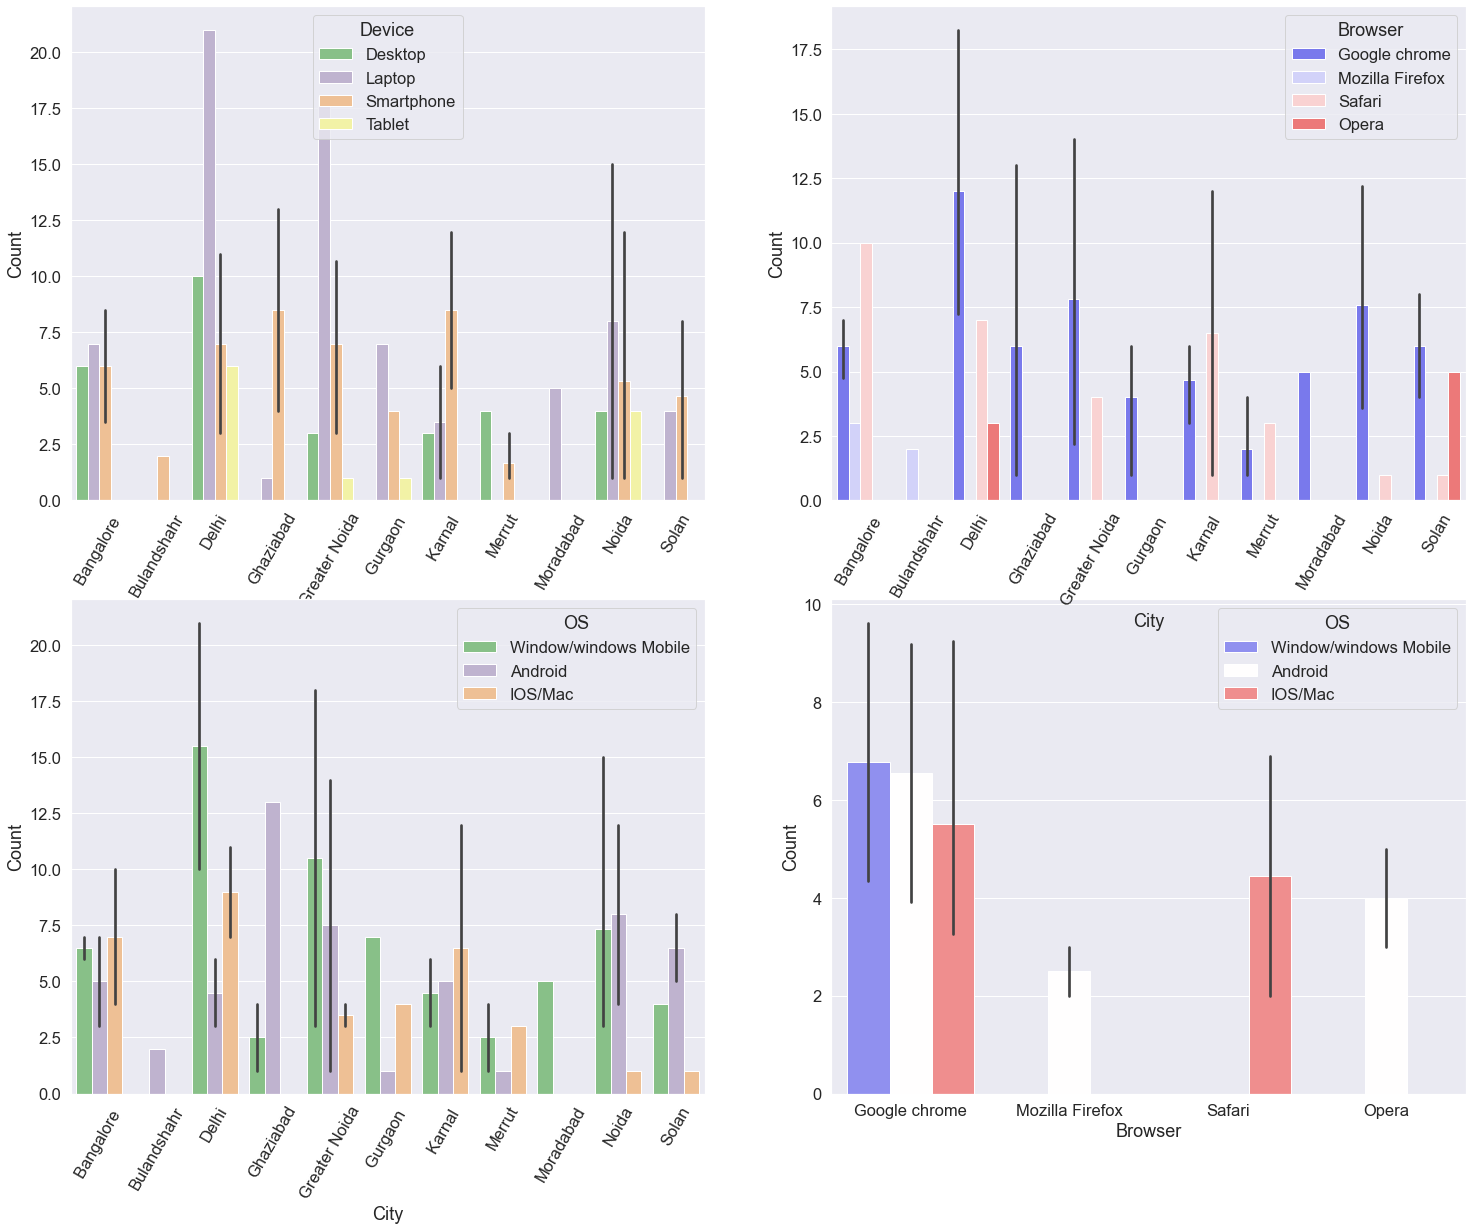

In [410]:
grouping19 = df.groupby(['City', 'Device','OS', 'Browser']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(25,20)}, font_scale = 1.5)
plt.subplot(221)
sns.barplot(x='City',y='Count',hue='Device',data=grouping19,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(224)
sns.barplot(x='Browser',y='Count',hue='OS',data=grouping19,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(223)
sns.barplot(x='City',y='Count',hue='OS',data=grouping19,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(222)
sns.barplot(x='City',y='Count',hue='Browser',data=grouping19,palette='bwr')
plt.xticks(rotation=60)

#### Observation:
    1. Delhi and Greater Noida residents have highest usage of Laptop and prefer to access internet through google chrome.
    2. Delhi,Banglore,Merrut has less user of Android compared to Windows and iOS/Mac
    3. Mac OS users doesnt use Firefox and opera
    4. Kamal,Banglore,Merrut has higher user of Mac OS than window and Android.
    5. Google chrome & Safari is almost used in every city except Bulandshahr.
    6. Opera is detected used in Delhi & Solan.
    7. The minor proportion of tablet user is observed in Delhi & Noida.


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Strongly disagree (1)'),
  Text(3, 0, 'indifferent (3)')])

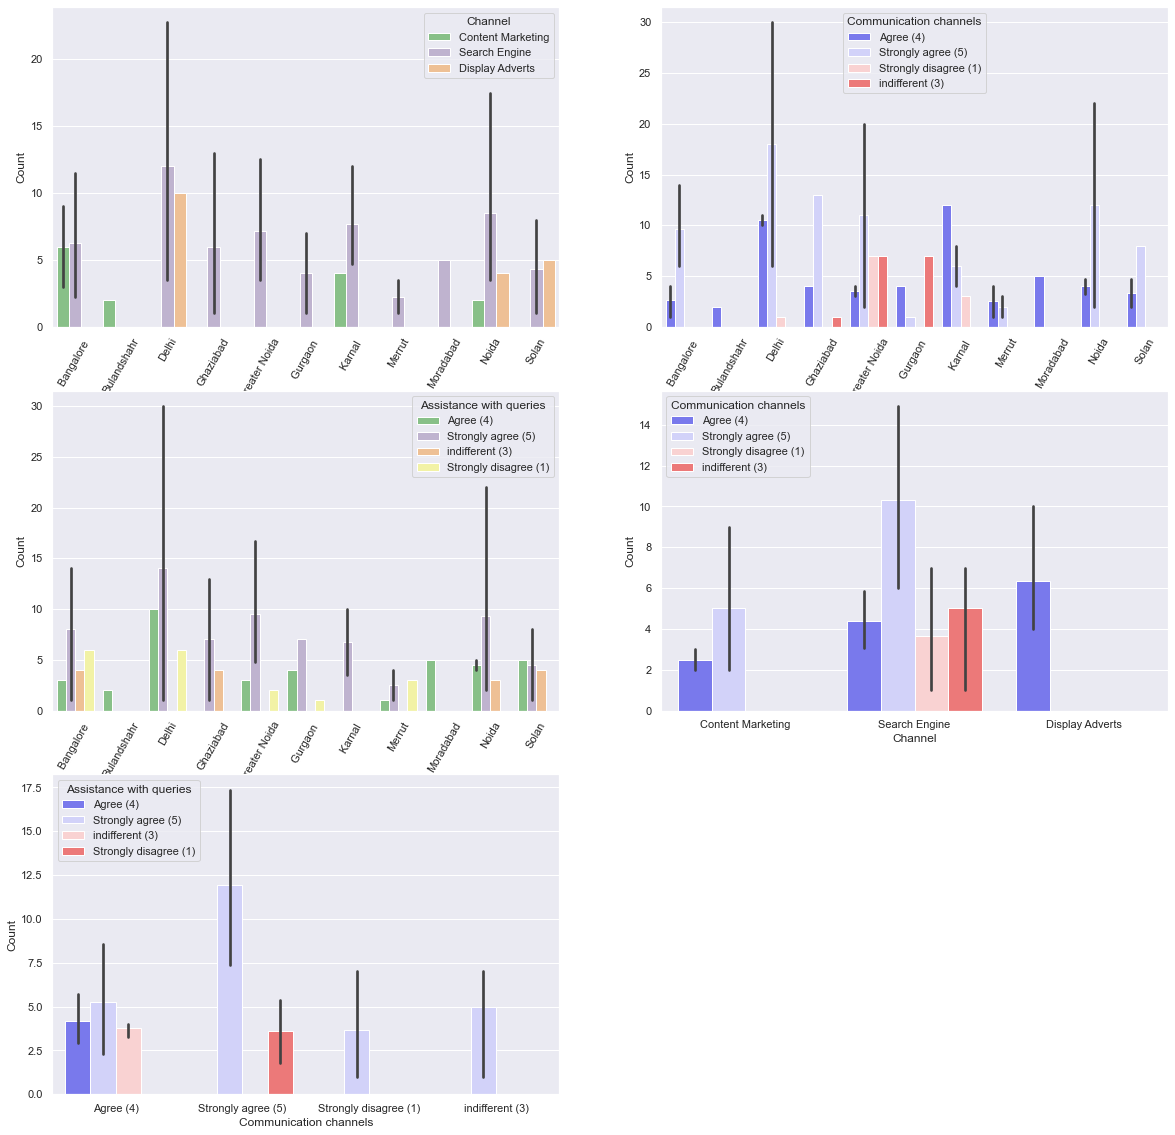

In [411]:
grouping20 = df.groupby(['City', 'Channel','Communication channels','Assistance with queries']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(20,20)})
plt.subplot(321)
sns.barplot(x='City',y='Count',hue='Channel',data=grouping20,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(322)
sns.barplot(x='City',y='Count',hue='Communication channels',data=grouping20,palette='bwr')
plt.xticks(rotation=60)
plt.subplot(323)
sns.barplot(x='City',y='Count',hue='Assistance with queries',data=grouping20,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(324)
sns.barplot(x='Channel',y='Count',hue='Communication channels',data=grouping20,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(325)
sns.barplot(x='Communication channels',y='Count',hue='Assistance with queries',data=grouping20,palette='bwr')
plt.xticks(rotation=0)

#### Observation:
    1. Resident of Banglore,Delhi and some amount of Merrut strongly disagree on the fact that they get aet assistance with the queries.
    2. There is considerable amount of people who disagree that search engine with communication channel is helpful.


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)'),
  Text(3, 0, 'Dis-agree (2)')])

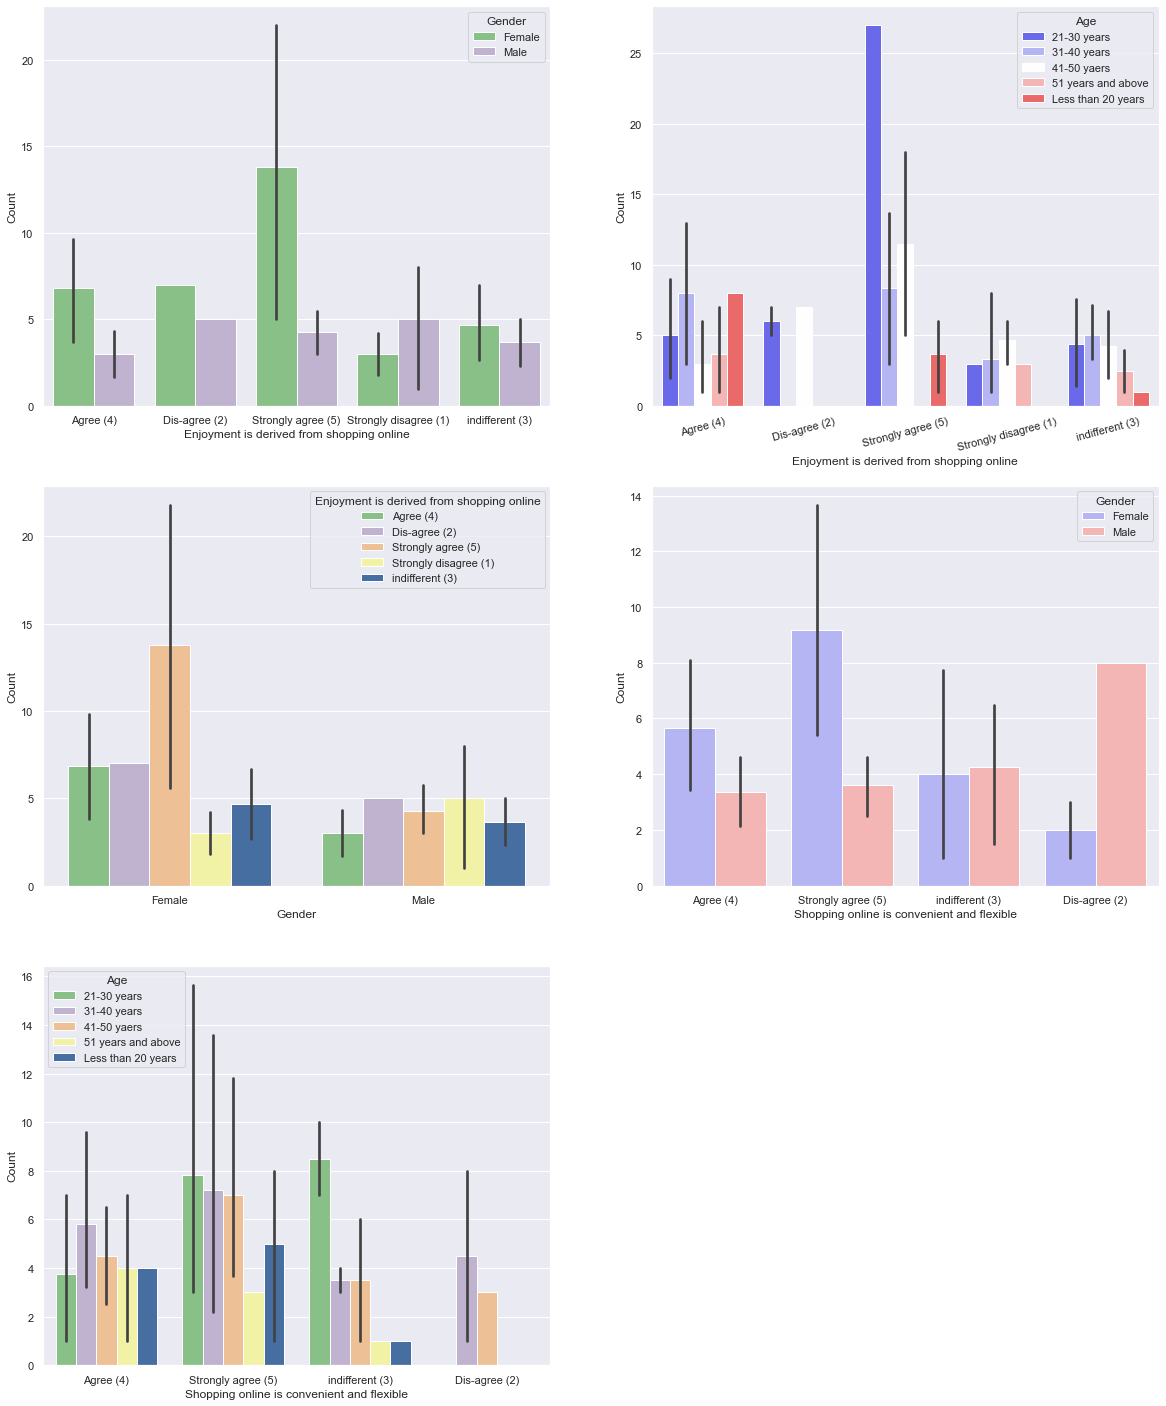

In [414]:
grouping21 = df.groupby(['Gender', 'Age','Enjoyment is derived from shopping online','Shopping online is convenient and flexible']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(20,25)})
plt.subplot(321)
sns.barplot(x='Enjoyment is derived from shopping online',y='Count',hue='Gender',data=grouping21,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(322)
sns.barplot(x='Enjoyment is derived from shopping online',y='Count',hue='Age',data=grouping21,palette='bwr')
plt.xticks(rotation=15)
plt.subplot(323)
sns.barplot(x='Gender',y='Count',hue='Enjoyment is derived from shopping online',data=grouping21,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(324)
sns.barplot(x='Shopping online is convenient and flexible',y='Count',hue='Gender',data=grouping21,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(325)
sns.barplot(x='Shopping online is convenient and flexible',y='Count',hue='Age',data=grouping21,palette='Accent')
plt.xticks(rotation=0)

#### Observation:
    1. Large proportion of female(21-30yrs) agree that enjoyment is derived from shopping online, while males tends to diasgree on the same.
    2. Females tends to also agree on the matter that shopping is convenient and flexible especially of age(21-50yrs) and males of age group (31-50yrs) largely disagree on that.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Amazon.in, Flipkart.com'),
  Text(1, 0, 'Amazon.in'),
  Text(2, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(8, 0, 'Flipkart.com'),
  Text(9, 0, 'Paytm.com')])

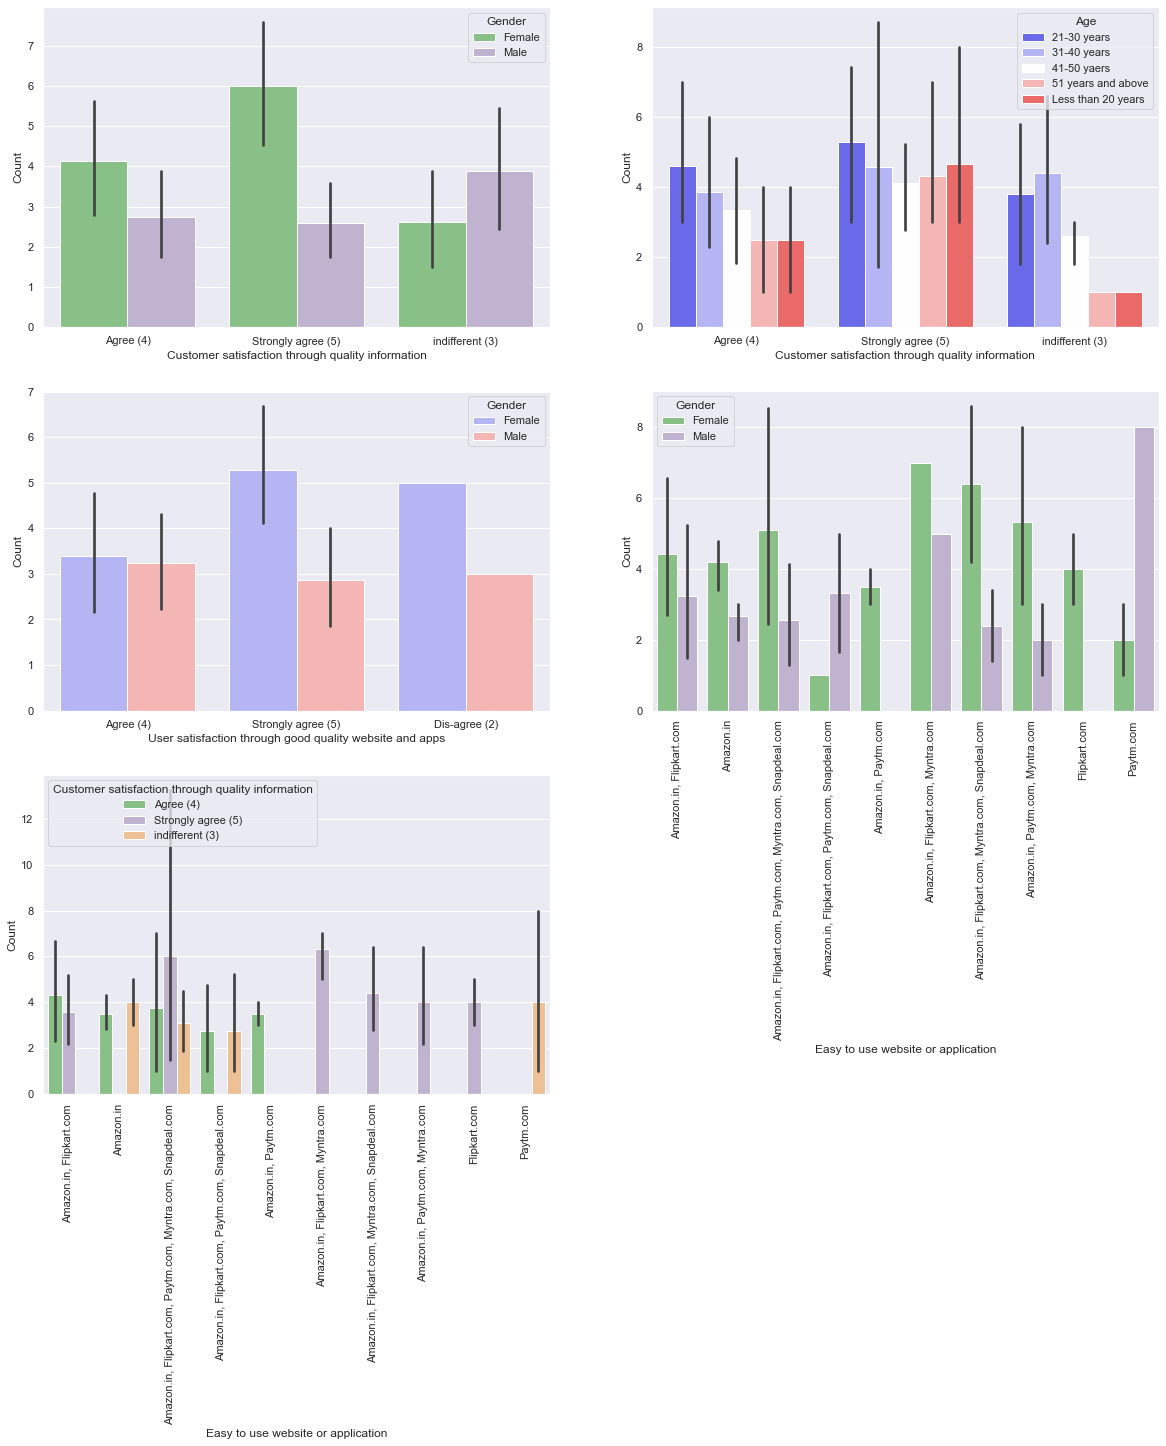

In [415]:
grouping23 = df.groupby(['Gender', 'Customer satisfaction through quality information', 'Age',
                         'User satisfaction through good quality website and apps',
                        'Easy to use website or application']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(20,20)})
plt.subplot(321)
sns.barplot(x='Customer satisfaction through quality information',y='Count',hue='Gender',data=grouping23,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(322)
sns.barplot(x='Customer satisfaction through quality information',y='Count',hue='Age',data=grouping23,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(323)
sns.barplot(x='User satisfaction through good quality website and apps',y='Count',hue='Gender',data=grouping23,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(324)
sns.barplot(x='Easy to use website or application',y='Count',hue='Gender',data=grouping23,palette='Accent')
plt.xticks(rotation=90)
plt.subplot(325)
sns.barplot(x='Easy to use website or application',y='Count',hue='Customer satisfaction through quality information',data=grouping23,palette='Accent')
plt.xticks(rotation=90)


#### Observation:
    1. Majority of the customer, disregard of gender agree that customer is satisfied through quality of information.
    2. When it comes to quality of website and application, considerable amount of people disagree that user is not satisfied with quality.
    3. Amazon and Paytm has higher number of customer having indifferent opinions with quality information.
    4. Male customers votes Paytm as website/app to have ease in its use case, while more Females have voted to Amazon,Flipkart, Myntra and Snapdeal.

(array([0, 1, 2]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'indifferent (3)'),
  Text(2, 0, 'Strongly agree (5)')])

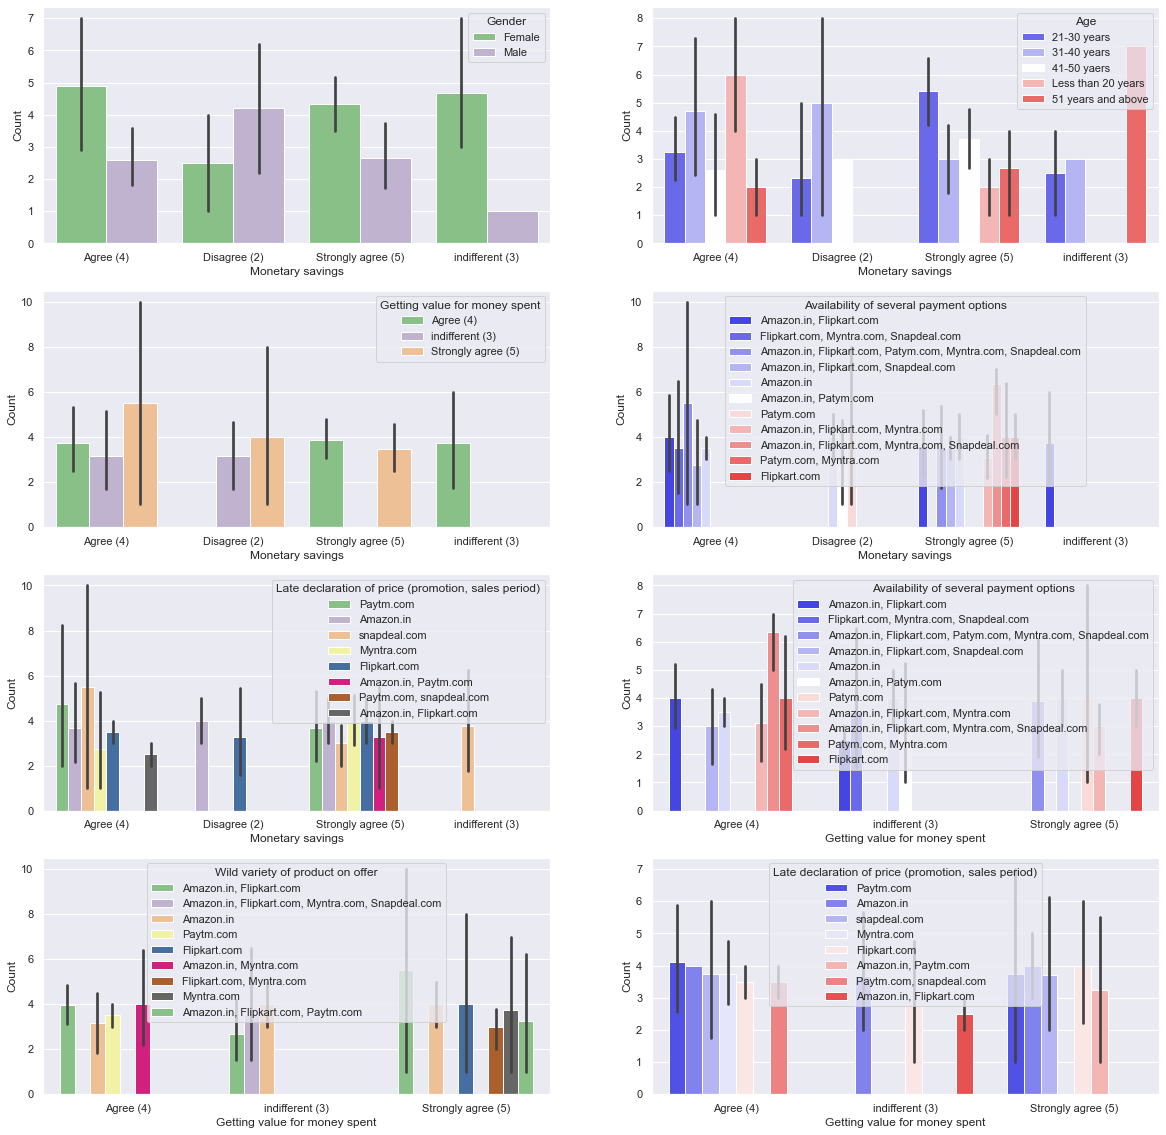

In [416]:
grouping24 = df.groupby(['Gender', 'Monetary savings', 'Age', 'Getting value for money spent',
                         'Wild variety of product on offer', 'Late declaration of price (promotion, sales period)',
                        'Availability of several payment options']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(20,20)})
plt.subplot(421)
sns.barplot(x='Monetary savings',y='Count',hue='Gender',data=grouping24,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(422)
sns.barplot(x='Monetary savings',y='Count',hue='Age',data=grouping24,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(423)
sns.barplot(x='Monetary savings',y='Count',hue='Getting value for money spent',data=grouping24,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(424)
sns.barplot(x='Monetary savings',y='Count',hue='Availability of several payment options',data=grouping24,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(425)
sns.barplot(x='Monetary savings',y='Count',hue='Late declaration of price (promotion, sales period)',data=grouping24,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(426)
sns.barplot(x='Getting value for money spent',y='Count',hue='Availability of several payment options',data=grouping24,palette='bwr')
plt.xticks(rotation=0)
plt.subplot(427)
sns.barplot(x='Getting value for money spent',y='Count',hue='Wild variety of product on offer',data=grouping24,palette='Accent')
plt.xticks(rotation=0)
plt.subplot(428)
sns.barplot(x='Getting value for money spent',y='Count',hue='Late declaration of price (promotion, sales period)',data=grouping24,palette='bwr')
plt.xticks(rotation=0)

#### Observation:
    1. Males(31-40yrs) are likely to lean towards the fact that they disagree on Monetary savings through online shopping.
    2. Customers agreeing on monetary savings due to late declaration of price is observed on snapdeal, myntra and flipkart
    3. Getting value for money spent due to different payment option is seen highly on Paytm, amazon, flipkart, myntra, snapdeal
    4. Getting value for money spent due to wide offer on variety of product is agreed majorly in Amazon & Flipkart.
    5. Getting value for money spent due to late declaration of price is seen majorly on Paytm, Amazon, snapdeal & Flipkart

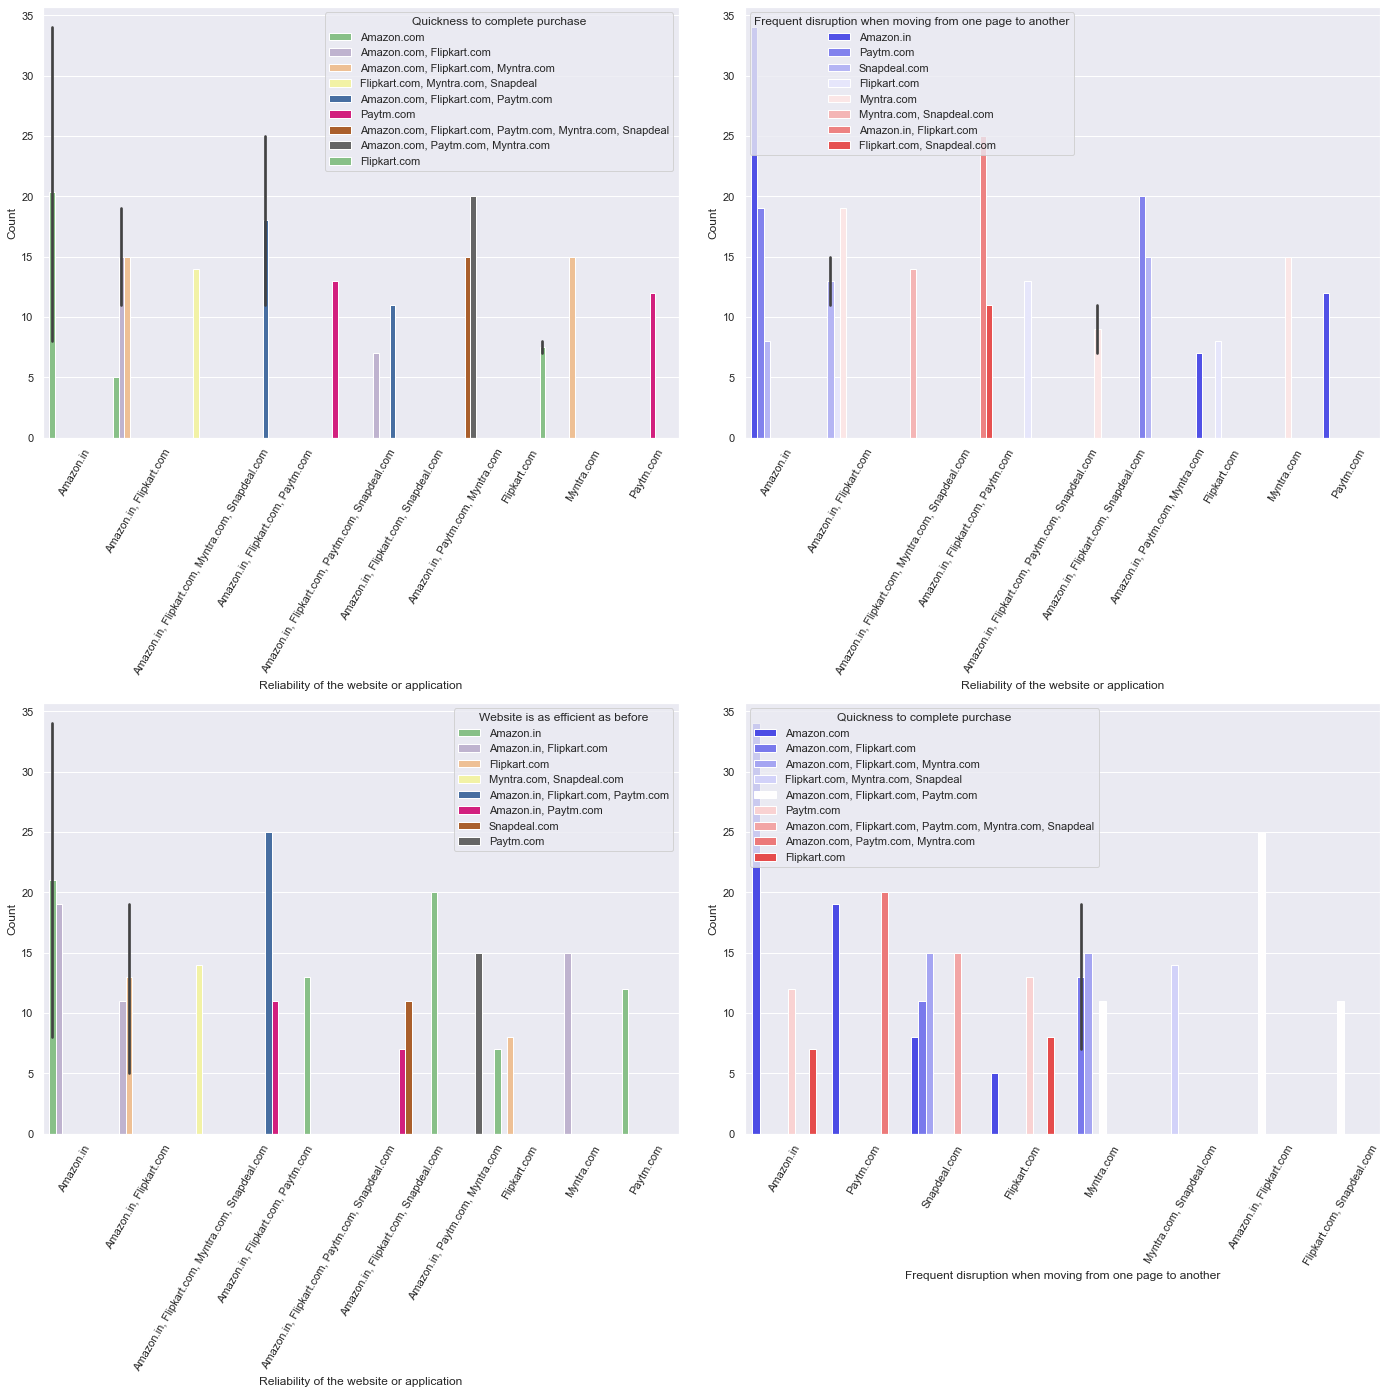

In [417]:
grouping25 = df.groupby(['Reliability of the website or application',
                         'Quickness to complete purchase',
                         'Frequent disruption when moving from one page to another',
                         'Website is as efficient as before']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(20,20)})
plt.subplot(221)
sns.barplot(x='Reliability of the website or application',y='Count',hue='Quickness to complete purchase',data=grouping25,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(222)
sns.barplot(x='Reliability of the website or application',y='Count',hue='Frequent disruption when moving from one page to another',data=grouping25,palette='bwr')
plt.xticks(rotation=60)
plt.subplot(223)
sns.barplot(x='Reliability of the website or application',y='Count',hue='Website is as efficient as before',data=grouping25,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(224)
sns.barplot(x='Frequent disruption when moving from one page to another',y='Count',hue='Quickness to complete purchase',data=grouping25,palette='bwr')
plt.xticks(rotation=60)
plt.tight_layout(pad=2.5, h_pad=1.0)

#### Observation:
    1. When it comes to reliability and quickness to complete purchase, amazon top the chart.
    2. Disruption in moving from one page to another is observed more in Amazon, Paytm, Flipkart.
    3. Reliability and efficiency is intact for Amazon and Flipkart.
    4. While moving to complete purchase, disruption is observed in Amazon more than any other website.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Amazon.in, Myntra.com'),
  Text(2, 0, 'Amazon.in, Flipkart.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(6, 0, 'Flipkart.com'),
  Text(7, 0, 'Myntra.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com')])

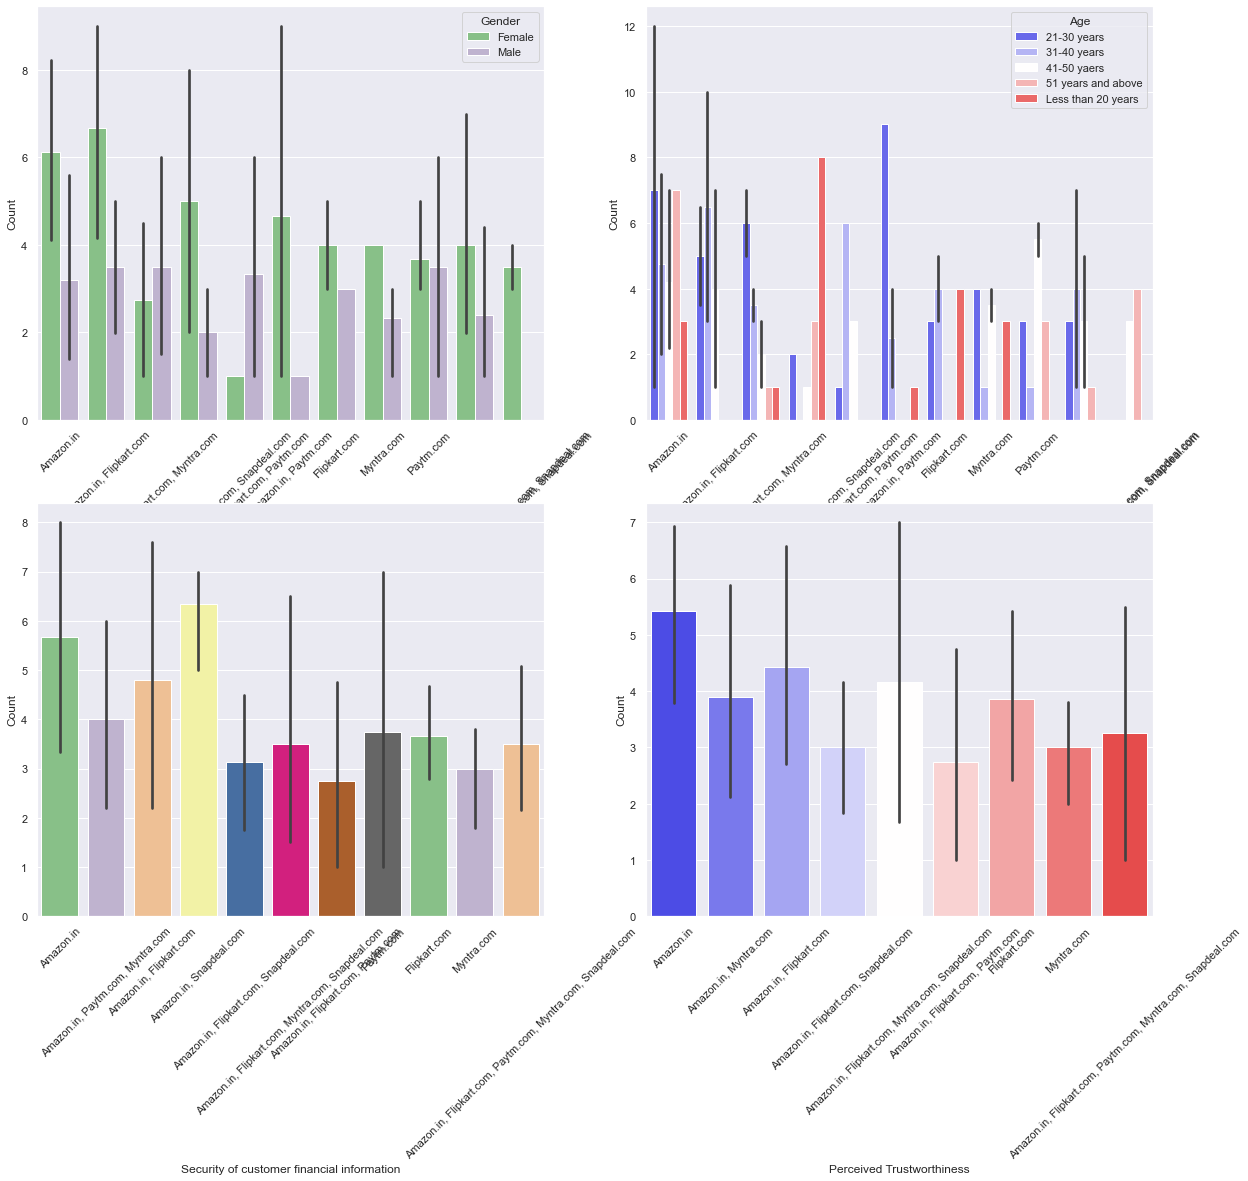

In [422]:
grouping26 = df.groupby(['Gender', 'Age', 'Privacy of customers information',
                         'Security of customer financial information',
                         'Perceived Trustworthiness']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(20,35)})
plt.subplot(421)
sns.barplot(x='Privacy of customers information',y='Count',hue='Gender',data=grouping26,palette='Accent')
plt.xticks(rotation=45)
plt.subplot(422)
sns.barplot(x='Privacy of customers information',y='Count',hue='Age',data=grouping26,palette='bwr')
plt.xticks(rotation=45)
plt.subplot(423)
sns.barplot(x='Security of customer financial information',y='Count',data=grouping26,palette='Accent')
plt.xticks(rotation=45)
plt.subplot(424)
sns.barplot(x='Perceived Trustworthiness',y='Count',data=grouping26,palette='bwr')
plt.xticks(rotation=45)

#### Observation:
    1. Amazon has gathered more customers across all age groups in terms of privacy compared to other website.
    2. Customer of age group(21-40yrs) believes that their privacy is secured across all online store.
    3. Customers believes that Amazon and Flipkart secure the financial information of customer.
    4. Amazon, Flipkart, Snapdeal has highest trustworthiness percieved among customers.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Amazon.in, Flipkart.com'),
  Text(2, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Myntra.com'),
  Text(4, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(5, 0, 'Flipkart.com'),
  Text(6, 0, 'Amazon.in, Paytm.com'),
  Text(7, 0, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com')])

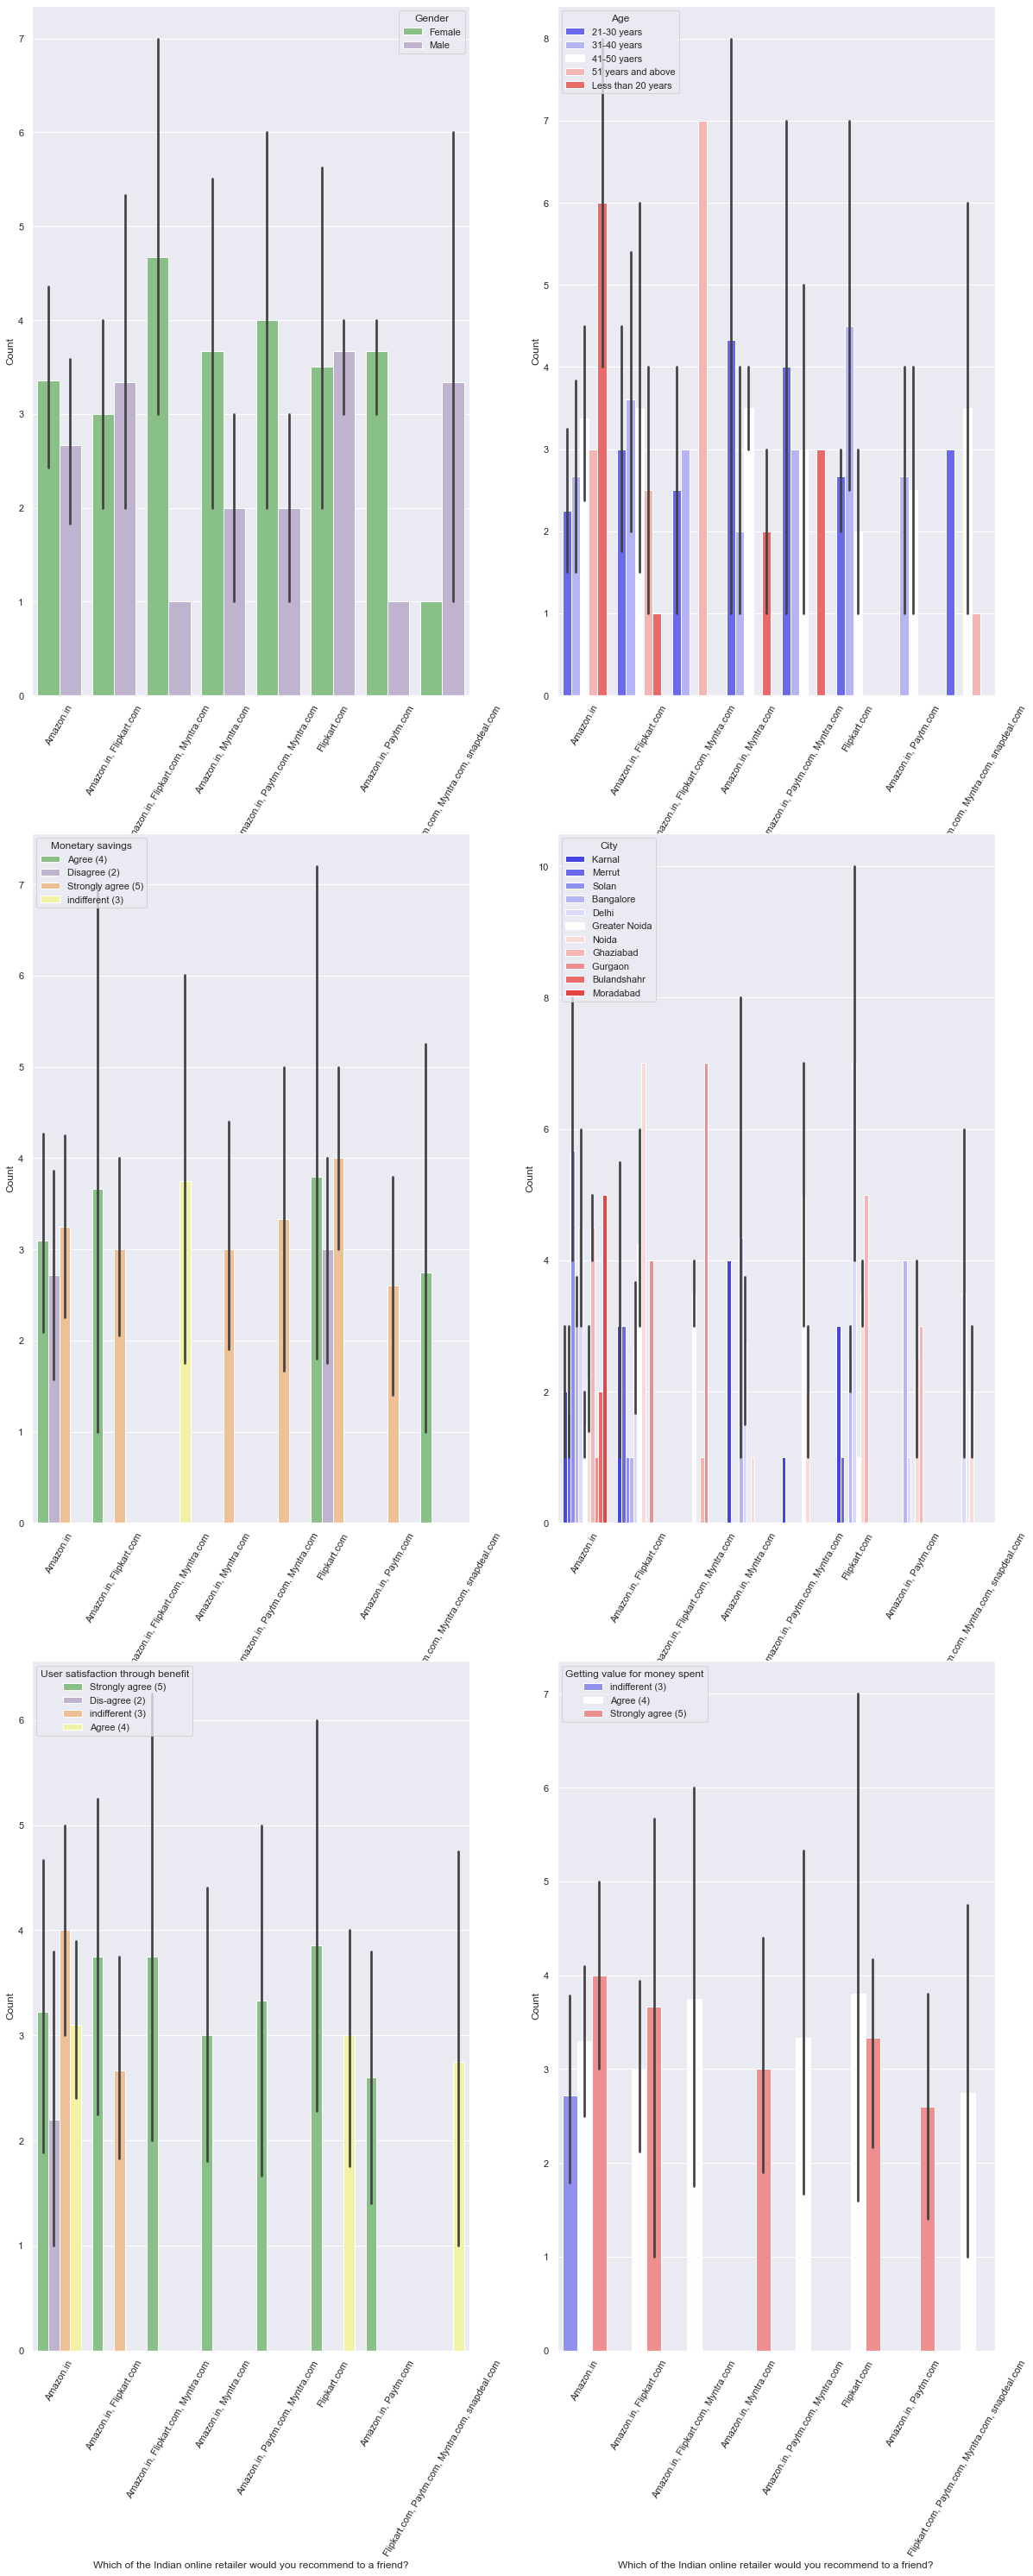

In [423]:
grouping27 = df.groupby(['Gender', 'Age', 'Which of the Indian online retailer would you recommend to a friend?',
                         'Monetary savings','City', 'Getting value for money spent', 
                         'User satisfaction through benefit']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize':(20,50)})
plt.subplot(321)
sns.barplot(x='Which of the Indian online retailer would you recommend to a friend?',y='Count',hue='Gender',data=grouping27,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(322)
sns.barplot(x='Which of the Indian online retailer would you recommend to a friend?',y='Count',hue='Age',data=grouping27,palette='bwr')
plt.xticks(rotation=60)
plt.subplot(323)
sns.barplot(x='Which of the Indian online retailer would you recommend to a friend?',y='Count',hue='Monetary savings',data=grouping27,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(324)
sns.barplot(x='Which of the Indian online retailer would you recommend to a friend?',y='Count',hue='City',data=grouping27,palette='bwr')
plt.xticks(rotation=60)
plt.subplot(325)
sns.barplot(x='Which of the Indian online retailer would you recommend to a friend?',y='Count',hue='User satisfaction through benefit',data=grouping27,palette='Accent')
plt.xticks(rotation=60)
plt.subplot(326)
sns.barplot(x='Which of the Indian online retailer would you recommend to a friend?',y='Count',hue='Getting value for money spent',data=grouping27,palette='bwr')
plt.xticks(rotation=60)


#### Observation:
    1. More males of age group>41yrs would recommend flipkart, paytm, myntra and snapldeal to a friend than females. Females would likely to recommend Amazon, Flipkart.
    2. There are several people who are not satisfied with benefit from amazon yet will recommend that website to a friend.
    3. Amazon is recommended in all the listed cities.
    4. All website has to offer value for money spent and people tend to agree. We can notice some exception in Amazon where people have indifferent opinion.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

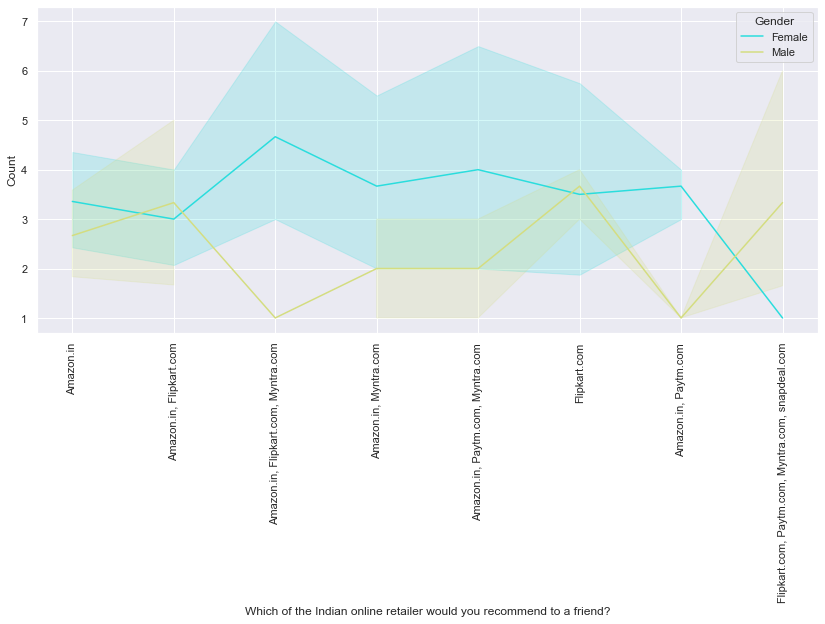

In [431]:
#just for the visual purpose
plt.figure(figsize=(14,6))
sns.lineplot(x = 'Which of the Indian online retailer would you recommend to a friend?', y = 'Count', data = grouping27, hue= 'Gender', palette = 'rainbow')
plt.xticks(rotation=90)